# `Zomato Bangalore Restaurants: 03 - Exploratory Data Analysis`

**Author:** Puneet Kumar Mishra
**Date:** 30-08-2025

## 1. Objective

This notebook serves as a deep dive into the cleaned and prepared Zomato dataset. The primary goal is to move beyond data cleaning and into the realm of **data exploration and insight discovery**. We will use a combination of statistical analysis and advanced visualizations to achieve the following:

1.  **Understand Feature Distributions:** Analyze the shape, center, and spread of key numerical and categorical features.
2.  **Uncover Bivariate Relationships:** Investigate how individual features (e.g., `cost_for_two`, `location`, `online_order`) relate to our target variable, `rate`.
3.  **Explore Multivariate Interactions:** Examine the correlations between features to understand complex interactions and identify potential multicollinearity.
4.  **Form Data-Driven Hypotheses:** Generate and validate hypotheses about what drives restaurant ratings, which will be crucial for the subsequent feature engineering phase.
5.  **Identify Key Predictive Features:** Perform a preliminary feature importance analysis to get an early indication of the most powerful signals in the data.

The insights gathered in this notebook will be the strategic foundation for building a high-performing predictive model.

---

### **Methodology**

The analysis will be structured as follows:
- **Univariate Analysis:** Examining each feature in isolation.
- **Bivariate Analysis:** Studying the relationship between each predictor and the `rate`.
- **Multivariate Analysis:** Looking at the interplay between multiple features simultaneously.

---
## The Grand Plan for Your EDA Notebook

We will structure this new notebook from the very beginning with clear markdown and documentation, just like you said. We'll adapt the best ideas from your airline project and apply them to the Zomato data.

Here is the blueprint for our `03_EDA.ipynb`:

---

**`## 1. Setup and Data Loading`**
*   **Markdown:** We'll start with a clear objective for this notebook: "To explore the cleaned Zomato dataset, understand the distributions of key features, uncover relationships between variables, and form data-driven hypotheses that will guide our feature engineering and modeling strategies."
*   **Code:** Import libraries and load our `zomato_processed.parquet` file.

**`## 2. Univariate Analysis: Understanding Individual Features`**
*   **Goal:** Look at each key feature one by one.
*   **Numerical Features (`rate`, `cost_log`, `votes_log`):** We will reuse your **`analyze_numerical_feature`** "god-level" function to get a complete diagnostic report on our target variable and key numeric predictors.
*   **Categorical Features (`location`, `rest_type`, `online_order`, etc.):** We'll create simple count plots to see the most frequent categories.

**`## 3. Bivariate Analysis: Features vs. The Target (`rate`)`**
*   **Goal:** This is the most important part. We need to see which features have the strongest relationship with the restaurant rating. This is where we will replicate the best charts from your airline project.
*   **Categorical vs. `rate`:** We will build a new "god-level" function, inspired by your airline plots, that does the following for each categorical feature:
    1.  Shows the overall distribution on the left.
    2.  Shows a breakdown of the *average rating* for each category on the right.
    3.  Performs a statistical test (like ANOVA) to see if the differences in ratings are statistically significant.
*   **Numerical vs. `rate`:** We'll create scatter plots (e.g., `votes_log` vs. `rate`) to see if there are clear trends.

**`## 4. Multivariate Analysis: How Features Interact`**
*   **Goal:** To see the bigger picture.
*   **Correlation Heatmap:** Just like in the airline project, we'll create a correlation matrix for all our numerical features to spot multicollinearity.
*   **Preliminary Feature Importance:** We'll replicate the brilliant idea from your reference project: train a quick baseline `RandomForestRegressor` and plot the feature importances. This gives us an early, powerful hint about which features our model is likely to care about the most.

**`## 5. Summary of Findings & Hypotheses`**
*   **Markdown:** We'll end the notebook with a summary of our key insights and a list of clear hypotheses to test in the feature engineering and modeling stages. For example:
    *   *"Hypothesis 1: The number of cuisines offered has a positive correlation with the number of votes but a weak correlation with the rating itself."*
    *   *"Hypothesis 2: `online_order` availability is one of the strongest predictors of a higher rating."*

---

## Initialization and Import Cell

In [2]:
# --- 1. CORE LIBRARIES ---
import os
import sys
import warnings

# --- 3. VISUALIZATION ---
import matplotlib.pyplot as plt
import numpy as np

# --- 2. DATA HANDLING & ANALYSIS ---
import pandas as pd
import seaborn as sns
from IPython.display import display

# --- 8. UTILITIES ---
from loguru import logger
from scipy import stats
from tqdm.auto import tqdm

# ===================================================================
#                      CONFIGURATION
# ===================================================================

# --- 1. PANDAS SETTINGS ---
# Makes DataFrame outputs look professional
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", 1000)
# Formats floats to 2 decimal places with comma separators (e.g., 1,234.56)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# --- 2. PLOTTING STYLE ---
# Sets a modern, clean style for all matplotlib and seaborn plots
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 100  # Makes plots sharper

# --- 3. LOGURU CONFIGURATION ---
# The "beautiful" and "advanced" logger you wanted
logger.remove()  # Remove the default handler
logger.add(
    sys.stdout,
    colorize=True,
    format=(
        "<green>{time:YYYY-MM-DD HH:mm:ss}</green> | "
        "<level>{level: <8}</level> | "
        "<cyan>{name}</cyan>:<cyan>{function}</cyan>:<cyan>{line}</cyan> - "
        "<level>{message}</level>"
    ),
)
logger.info("✅ All libraries imported and configurations set successfully!")

2025-09-19 11:28:05 | INFO     | __main__:<module>:51 - ✅ All libraries imported and configurations set successfully!


In [3]:
# Load the clean, processed dataset from the previous notebook
DATA_PATH = "../data/processed/zomato_eda_tabular.parquet"

try:
    df = pd.read_parquet(DATA_PATH)
    logger.success(f"Successfully loaded the dataset from '{DATA_PATH}'.")
    logger.info(f"DataFrame shape: {df.shape}")
except FileNotFoundError:
    logger.error(
        f"FATAL: The file was not found at '{DATA_PATH}'. Please ensure the path is correct and the previous notebook was run."
    )

# Display the first few rows to get a feel for the data
df.head()

2025-09-19 11:28:13 | SUCCESS  | __main__:<module>:6 - Successfully loaded the dataset from '../data/processed/zomato_eda_tabular.parquet'.
2025-09-19 11:28:13 | INFO     | __main__:<module>:7 - DataFrame shape: (45187, 15)


name                                            address  online_order  book_table  rate  votes      location              rest_type                                         dish_liked                          cuisines listed_in_type listed_in_city  cost_for_two  cost_log  votes_log
0                  Jalsa  942, 21st Main Road, 2nd Stage, Banashankari, ...             1           1  4.10    775  Banashankari        [Casual Dining]  [Dum Biryani, Lunch Buffet, Masala Papad, Pane...  [Chinese, Mughlai, North Indian]         Buffet   Banashankari        800.00      6.69       6.65
1         Spice Elephant  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...             1           0  4.10    787  Banashankari        [Casual Dining]  [Chicken Biryani, Chocolate Nirvana, Dum Birya...     [Chinese, North Indian, Thai]         Buffet   Banashankari        800.00      6.69       6.67
2        San Churro Cafe  1112, Next to KIMS Medical College, 17th Cross...             1           0  3.80    918  Banashankari  [Cafe, Casual Dining]  [Cannelloni, Churros, Hot Chocolate, Minestron...          [Cafe, Italian, Mexican]         Buffet   Banashankari        800.00      6.69       6.82
3  Addhuri Udupi Bhojana  1st Floor, Annakuteera, 3rd Stage, Banashankar...             0           0  3.70     88  Banashankari          [Quick Bites]                                      [Masala Dosa]      [North Indian, South Indian]         Buffet   Banashankari        300.00      5.71       4.49
4          Grand Village  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...             0           0  3.80    166  Basavanagudi        [Casual Dining]                              [Gol Gappe, Panipuri]        [North Indian, Rajasthani]         Buffet   Banashankari        600.00      6.40       5.12

In [17]:
from loguru import logger
from itertools import chain
import pandas as pd
import numpy as np

# Let's assume df_processed has the 'rest_type' column with numpy arrays of strings.

logger.info("--- Analyzing the Cardinality of the 'rest_type' Column (Corrected for NumPy Arrays) ---")

# --- Step 1: Flatten the lists/arrays of strings into a single list ---
# We'll add a check to make sure each element is an iterable before trying to flatten.
all_rest_types = []
for item_list in df['rest_type']:
    # Check if the item is iterable (works for lists and numpy arrays) and not a string itself
    if hasattr(item_list, '__iter__') and not isinstance(item_list, str):
        all_rest_types.extend(item_list)

# --- Step 2: Get the unique set and count them ---
unique_rest_types = set(all_rest_types)
num_unique = len(unique_rest_types)

logger.success(f"Found a total of {num_unique} unique restaurant types.")

# --- The Verdict ---
if num_unique < 30: # Let's use a slightly higher threshold
    logger.success(f"The cardinality is LOW ({num_unique}). One-Hot Encoding (MultiLabelBinarizer) is the RECOMMENDED strategy.")
else:
    logger.warning(f"The cardinality is HIGH ({num_unique}). Word Embedding is a better strategy to avoid creating too many columns.")

# --- Display the results for manual inspection ---
print("\n--- The Unique Restaurant Types Found ---")
# We'll sort them alphabetically for readability
print(sorted(list(unique_rest_types)))

2025-09-19 11:37:50 | INFO     | __main__:<module>:8 - --- Analyzing the Cardinality of the 'rest_type' Column (Corrected for NumPy Arrays) ---
2025-09-19 11:37:50 | SUCCESS  | __main__:<module>:22 - Found a total of 24 unique restaurant types.
2025-09-19 11:37:50 | SUCCESS  | __main__:<module>:26 - The cardinality is LOW (24). One-Hot Encoding (MultiLabelBinarizer) is the RECOMMENDED strategy.

--- The Unique Restaurant Types Found ---
['Bakery', 'Bar', 'Beverage Shop', 'Bhojanalya', 'Cafe', 'Casual Dining', 'Club', 'Confectionery', 'Delivery', 'Dessert Parlor', 'Dhaba', 'Fine Dining', 'Food Court', 'Food Truck', 'Irani Cafee', 'Kiosk', 'Lounge', 'Meat Shop', 'Mess', 'Microbrewery', 'Pub', 'Quick Bites', 'Sweet Shop', 'Takeaway']


## 3. Initial Data Overview

With the dataset loaded, our first step is to re-acquaint ourselves with its structure and summary statistics. This ensures that the data has been loaded correctly and gives us a final, high-level snapshot before we begin the deep-dive analysis.

We will perform three key checks:
1.  **`.info()`:** To verify the data types, column names, and non-null counts. We expect zero missing values and correct data types thanks to the Parquet format.
2.  **`.describe()`:** To get a statistical summary of the numerical columns. This is our first look at the central tendency and spread of the clean data.
3.  **Separating Feature Types:** As planned, we will programmatically separate the columns into `numerical` and `categorical` lists. This is a crucial organizational step that will streamline all subsequent analysis.

In [3]:
logger.info("Verifying DataFrame structure with .info()")
df.info()

logger.info("Displaying statistical summary for numerical columns with .describe()")
display(df.describe())

logger.info(
    "Separating columns into numerical and categorical types for focused analysis..."
)

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Categorical columns will include objects and any columns we explicitly defined as a list
# This is a robust way to also catch our list-based columns
categorical_cols = [col for col in df.columns if col not in numerical_cols]

logger.success("Separation complete.")
logger.info(f"Found {len(numerical_cols)} numerical columns: {numerical_cols}")
logger.info(f"Found {len(categorical_cols)} categorical columns: {categorical_cols}")

2025-09-10 15:21:21 | INFO     | __main__:<module>:1 - Verifying DataFrame structure with .info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45187 entries, 0 to 45186
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            45187 non-null  object 
 1   address         45187 non-null  object 
 2   online_order    45187 non-null  int64  
 3   book_table      45187 non-null  int64  
 4   rate            45187 non-null  float64
 5   votes           45187 non-null  int64  
 6   location        45187 non-null  object 
 7   rest_type       45187 non-null  object 
 8   dish_liked      45187 non-null  object 
 9   cuisines        45187 non-null  object 
 10  listed_in_type  45187 non-null  object 
 11  listed_in_city  45187 non-null  object 
 12  cost_for_two    45187 non-null  float64
 13  cost_log        45187 non-null  float64
 14  votes_log       45187 non-null  float64
dtypes: float64(4), int64(3)

online_order  book_table      rate     votes  cost_for_two  cost_log  votes_log
count     45,187.00   45,187.00 45,187.00 45,187.00     45,187.00 45,187.00  45,187.00
mean           0.64        0.14      3.69    323.88        586.46      6.15       4.08
std            0.48        0.35      0.57    851.16        454.82      0.66       2.01
min            0.00        0.00      1.00      0.00         40.00      3.71       0.00
25%            0.00        0.00      3.40     15.00        300.00      5.71       2.77
50%            1.00        0.00      3.70     59.00        450.00      6.11       4.09
75%            1.00        0.00      4.00    241.00        700.00      6.55       5.49
max            1.00        1.00      5.00 16,832.00      6,000.00      8.70       9.73

2025-09-10 15:21:21 | INFO     | __main__:<module>:7 - Separating columns into numerical and categorical types for focused analysis...
2025-09-10 15:21:21 | SUCCESS  | __main__:<module>:17 - Separation complete.
2025-09-10 15:21:21 | INFO     | __main__:<module>:18 - Found 7 numerical columns: ['online_order', 'book_table', 'rate', 'votes', 'cost_for_two', 'cost_log', 'votes_log']
2025-09-10 15:21:21 | INFO     | __main__:<module>:19 - Found 8 categorical columns: ['name', 'address', 'location', 'rest_type', 'dish_liked', 'cuisines', 'listed_in_type', 'listed_in_city']


## 4. Numerical Feature Analysis

Now that we have separated our features, we will conduct a deep-dive analysis into the numerical columns. This analysis is crucial for understanding the underlying patterns, distributions, and potential issues like skewness that could impact model performance.

Our analysis will follow a structured approach:
1.  **Univariate Analysis:** Examining each numerical feature in isolation to understand its individual characteristics.
2.  **Bivariate Analysis:** Investigating the relationship between each numerical feature and our target variable, `rate`.
3.  **Multivariate Analysis:** Exploring the correlations between all numerical features to detect multicollinearity.

### 4.1. Univariate Analysis: A Deep Dive into Distributions

For our univariate analysis, we will deploy the "Ultimate Numerical Distribution Analyzer," a powerful custom function designed to provide a comprehensive, multi-faceted diagnostic report for any numerical feature.

For each column, this function will generate:
-   **A Statistical Dossier:** Including measures of central tendency (mean, median), dispersion (std dev, IQR), and distribution shape (skewness, kurtosis).
-   **An Original Distribution Plot:** A histogram overlaid with a Kernel Density Estimate (KDE) and a theoretical normal distribution for comparison.
-   **A Q-Q Plot:** To visually assess how the data's quantiles align with a normal distribution.
-   **A Transformation Suite:** Automatically applies several common transformations (Log, Square Root, Box-Cox) and reports which one is most effective at reducing skewness.

This automated, in-depth analysis will allow us to quickly and accurately assess the health of each feature and decide on the best preprocessing strategy for our models. Let's begin with our key numerical predictors.

In [4]:
# =================================================================================
# ULTIMATE NUMERICAL DISTRIBUTION ANALYZER v5.1 (Self-Contained & Corrected)
# =================================================================================


def _get_stat_color(value, stat_type):
    if stat_type == "skew":
        if abs(value) < 0.5:
            return "#2ecc71"
        if abs(value) < 1.0:
            return "#f39c12"
        return "#e74c3c"
    elif stat_type == "kurt":
        if abs(value) < 1.0:
            return "#2ecc71"
        return "#f39c12"
    return "black"


def _draw_placeholder(ax, text, initials="PKM"):
    ax.clear()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor("#f0f0f0")
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.text(
        0.5,
        0.6,
        text,
        ha="center",
        va="center",
        fontsize=12,
        color="gray",
        style="italic",
    )
    ax.text(
        0.5,
        0.4,
        initials,
        ha="center",
        va="center",
        fontsize=60,
        color="lightgray",
        fontweight="bold",
        alpha=0.5,
    )


# --- 2. The Main Plotting Function (Upgraded) ---
def plot_advanced_distributions_v6(
    df: pd.DataFrame,
    numerical_cols: list,
    palette: str = "crest",
    initials: str = "PKM",
):
    """
    Generates a definitive, multi-panel plot for each numerical column, now using the
    more robust Yeo-Johnson transformation.
    """
    logger.info(
        f"Generating advanced distribution plots for {len(numerical_cols)} columns..."
    )
    sns.set_style("whitegrid")

    # <<-- THE UPGRADE: We replace Box-Cox with Yeo-Johnson -->>
    transformations = {
        "Log (log1p)": (lambda x: np.log1p(x), "x >= 0"),
        "Square Root": (lambda x: np.sqrt(x) if x.min() >= 0 else None, "x >= 0"),
        "Yeo-Johnson": (
            lambda x: stats.yeojohnson(x)[0],
            "all real numbers",
        ),  # <-- NEW & IMPROVED
        "Cube Root": (lambda x: np.cbrt(x), "all real numbers"),
    }

    for col in tqdm(
        numerical_cols,
        desc="Analyzing Numerical Columns",
        bar_format="{l_bar}{bar:20}{r_bar}",
    ):

        data = df[col].dropna()
        if data.empty or data.nunique() < 2:
            logger.warning(f"Skipping '{col}' as it has no valid or non-constant data.")
            continue

        fig, axes = plt.subplots(3, 2, figsize=(20, 18), squeeze=False)
        axes = axes.flatten()
        fig.suptitle(
            f'Advanced Distribution Analysis for "{col}"',
            fontsize=24,
            fontweight="bold",
            y=1.0,
        )

        # Plot 1: Original Distribution
        ax1 = axes[0]
        skew_orig, kurt_orig = data.skew(), data.kurtosis()
        best_skew, best_transform_name = skew_orig, "Original"
        sns.histplot(
            data, kde=True, ax=ax1, color=sns.color_palette(palette)[0], stat="density"
        )
        mu, std = data.mean(), data.std()
        try:
            x_norm = np.linspace(*ax1.get_xlim(), 100)
            ax1.plot(
                x_norm,
                stats.norm.pdf(x_norm, mu, std),
                "k--",
                lw=2,
                label="Normal Dist.",
            )
        except Exception:
            pass
        stats_text = (
            f"Mean: {mu:,.2f} | Std Dev: {std:,.2f}\n"
            f"Skewness: {skew_orig:.2f}\n"
            f"Kurtosis: {kurt_orig:.2f}"
        )
        ax1.text(
            0.97,
            0.97,
            stats_text,
            transform=ax1.transAxes,
            ha="right",
            va="top",
            fontsize=14,
            bbox=dict(boxstyle="round,pad=0.5", fc="aliceblue", alpha=0.8, ec="gray"),
        )
        ax1.set_title(
            "Original Distribution",
            fontweight="bold",
            color=_get_stat_color(skew_orig, "skew"),
        )
        ax1.legend(loc="upper left")

        # Plot 2: Q-Q Plot
        ax2 = axes[1]
        stats.probplot(data, dist="norm", plot=ax2)
        ax2.get_lines()[0].set_markerfacecolor(sns.color_palette(palette)[1])
        ax2.get_lines()[1].set_color("red")
        ax2.set_title("Q-Q Plot vs. Normal", fontweight="bold")
        guide_text = "Skew: >0.5 Right | < -0.5 Left\nKurtosis: >1 Heavy | < -1 Light"
        ax2.text(
            0.03,
            0.97,
            guide_text,
            transform=ax2.transAxes,
            ha="left",
            va="top",
            fontsize=14,
            bbox=dict(boxstyle="round,pad=0.3", fc="beige", alpha=0.7),
        )

        # Transformation Plots
        ax_idx = 2
        for name, (func, req) in transformations.items():
            ax = axes[ax_idx]
            try:
                transformed_data = pd.Series(func(data)).dropna()
                if transformed_data.empty or transformed_data.nunique() < 2:
                    raise ValueError(f"Requires {req}")
                skew_new, kurt_new = (
                    transformed_data.skew(),
                    transformed_data.kurtosis(),
                )
                if abs(skew_new) < abs(best_skew):
                    best_skew, best_transform_name = skew_new, name

                title = f"{name} Transform"
                if name == "Yeo-Johnson":  # <-- UPDATED CHECK
                    _, lmbda = stats.yeojohnson(data)  # <-- UPDATED CALL
                    title += f" (λ={lmbda:.2f})"

                sns.histplot(
                    transformed_data,
                    kde=True,
                    ax=ax,
                    color=sns.color_palette(palette)[ax_idx],
                    stat="density",
                )
                stats_text_trans = f"Skew: {skew_new:.2f}\nKurtosis: {kurt_new:.2f}"
                ax.text(
                    0.97,
                    0.97,
                    stats_text_trans,
                    transform=ax.transAxes,
                    ha="right",
                    va="top",
                    fontsize=14,
                    bbox=dict(boxstyle="round,pad=0.3", fc="aliceblue", alpha=0.7),
                )
                ax.set_title(
                    title,
                    fontsize=18,
                    fontweight="bold",
                    color=_get_stat_color(skew_new, "skew"),
                )
            except Exception as e:
                _draw_placeholder(
                    ax, f"'{name}' Transform\nNot Applicable ({e})", initials
                )
            ax_idx += 1

        interpretation = f"For '{col}', the original distribution is "
        if abs(skew_orig) < 0.5:
            interpretation += "nearly symmetrical."
        elif abs(skew_orig) < 1.0:
            interpretation += "moderately skewed."
        else:
            interpretation += "highly skewed."
        interpretation += f" The '{best_transform_name}' transform is most effective, reducing skewness from {skew_orig:.2f} to {best_skew:.2f}."

        logger.success(interpretation)
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

2025-09-10 15:21:21 | INFO     | __main__:plot_advanced_distributions_v6:61 - Generating advanced distribution plots for 7 columns...


Analyzing Numerical Columns:   0%|                    | 0/7 [00:00<?, ?it/s]

2025-09-10 15:21:22 | SUCCESS  | __main__:plot_advanced_distributions_v6:215 - For 'online_order', the original distribution is moderately skewed. The 'Original' transform is most effective, reducing skewness from -0.58 to -0.58.


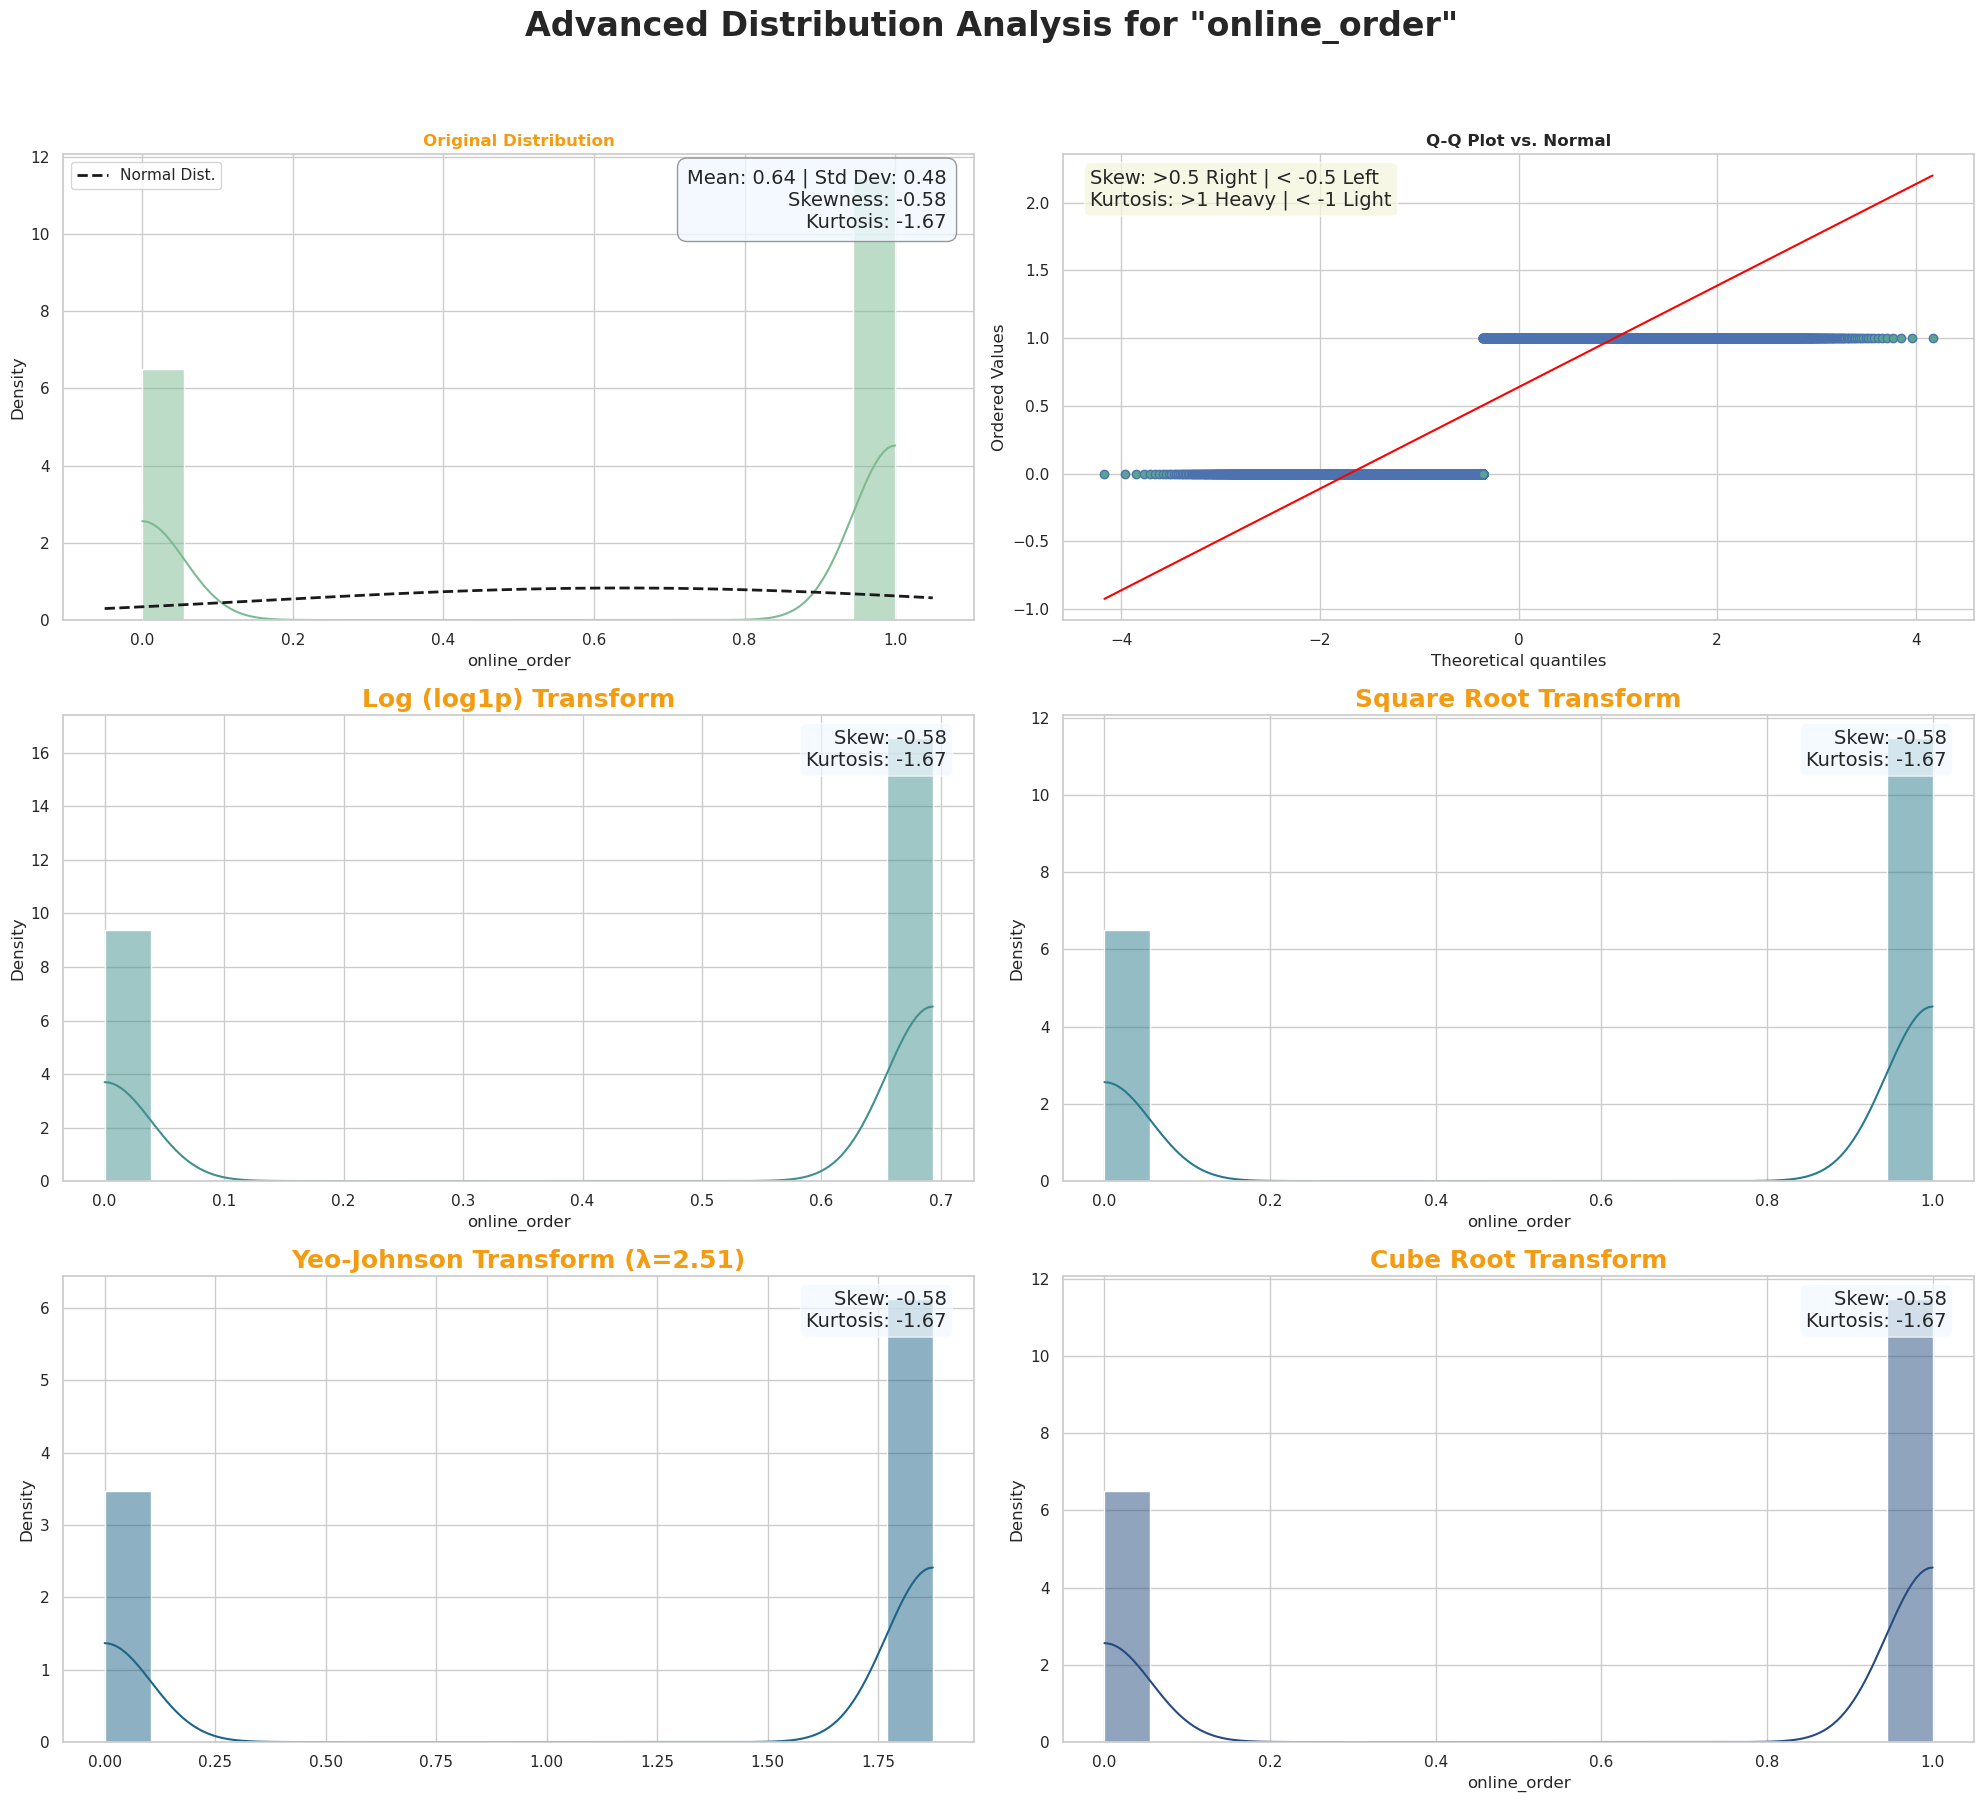

2025-09-10 15:21:23 | SUCCESS  | __main__:plot_advanced_distributions_v6:215 - For 'book_table', the original distribution is highly skewed. The 'Yeo-Johnson' transform is most effective, reducing skewness from 2.05 to 2.05.


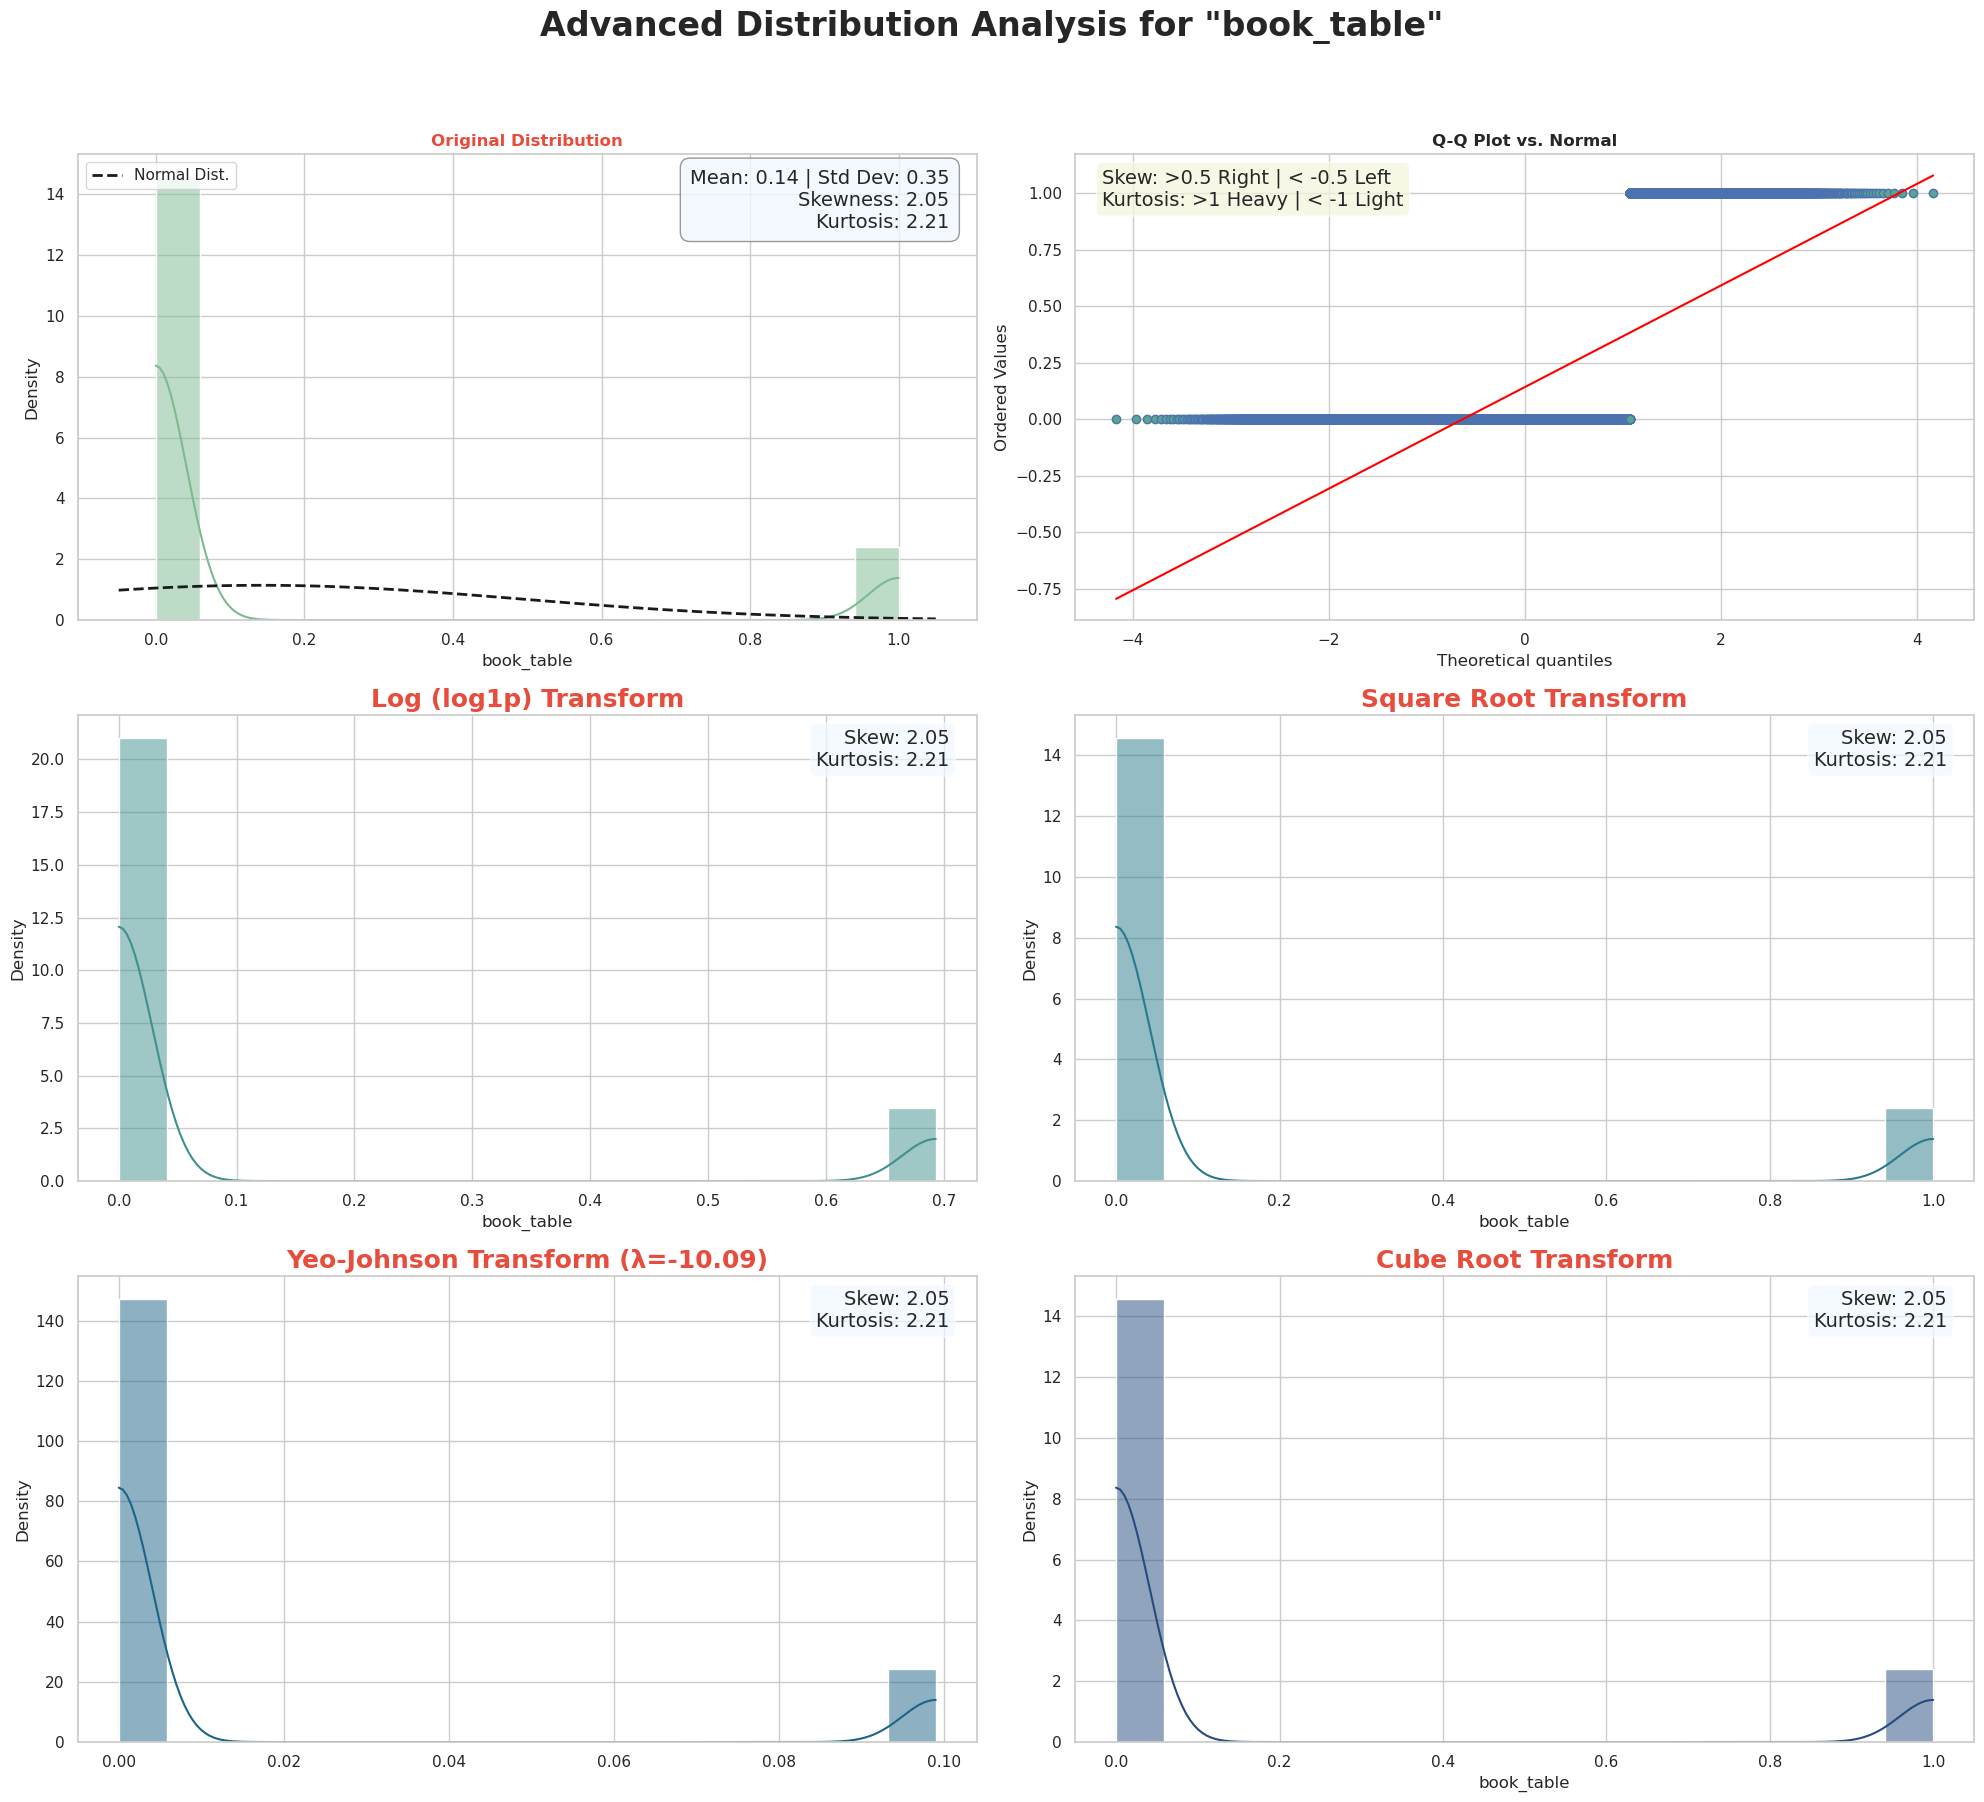

2025-09-10 15:21:25 | SUCCESS  | __main__:plot_advanced_distributions_v6:215 - For 'rate', the original distribution is highly skewed. The 'Yeo-Johnson' transform is most effective, reducing skewness from -1.12 to 0.13.


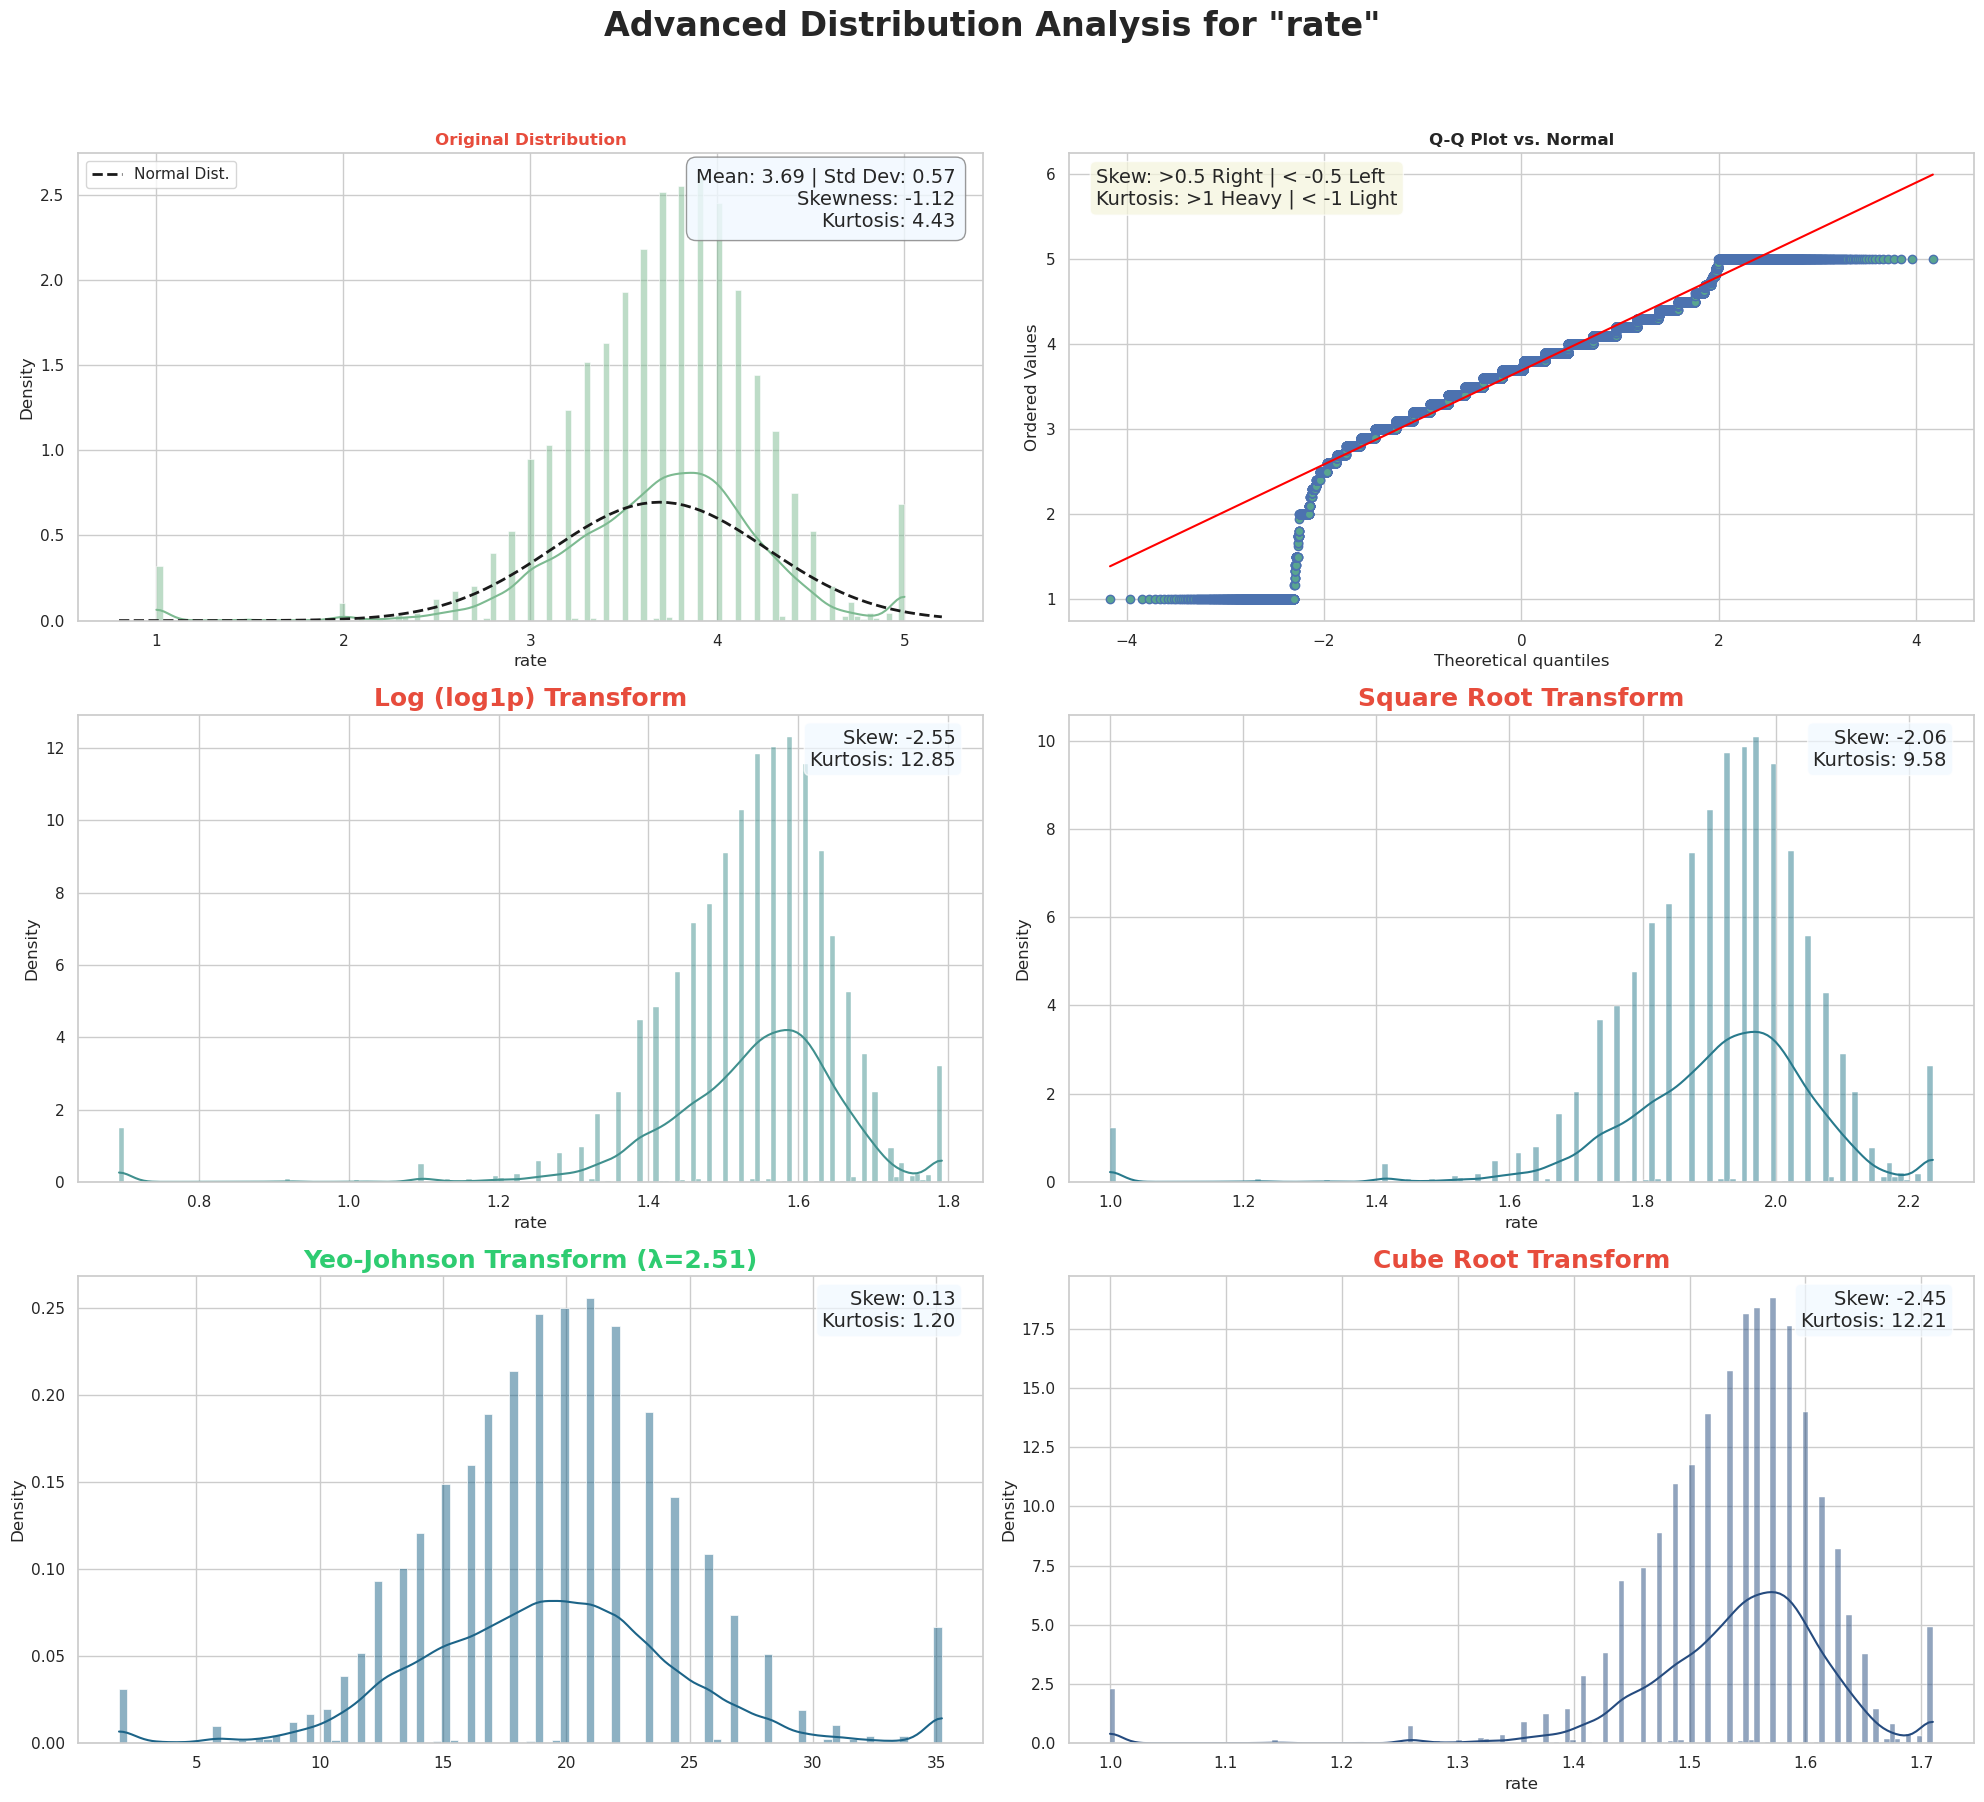

2025-09-10 15:21:27 | SUCCESS  | __main__:plot_advanced_distributions_v6:215 - For 'votes', the original distribution is highly skewed. The 'Yeo-Johnson' transform is most effective, reducing skewness from 7.13 to -0.01.


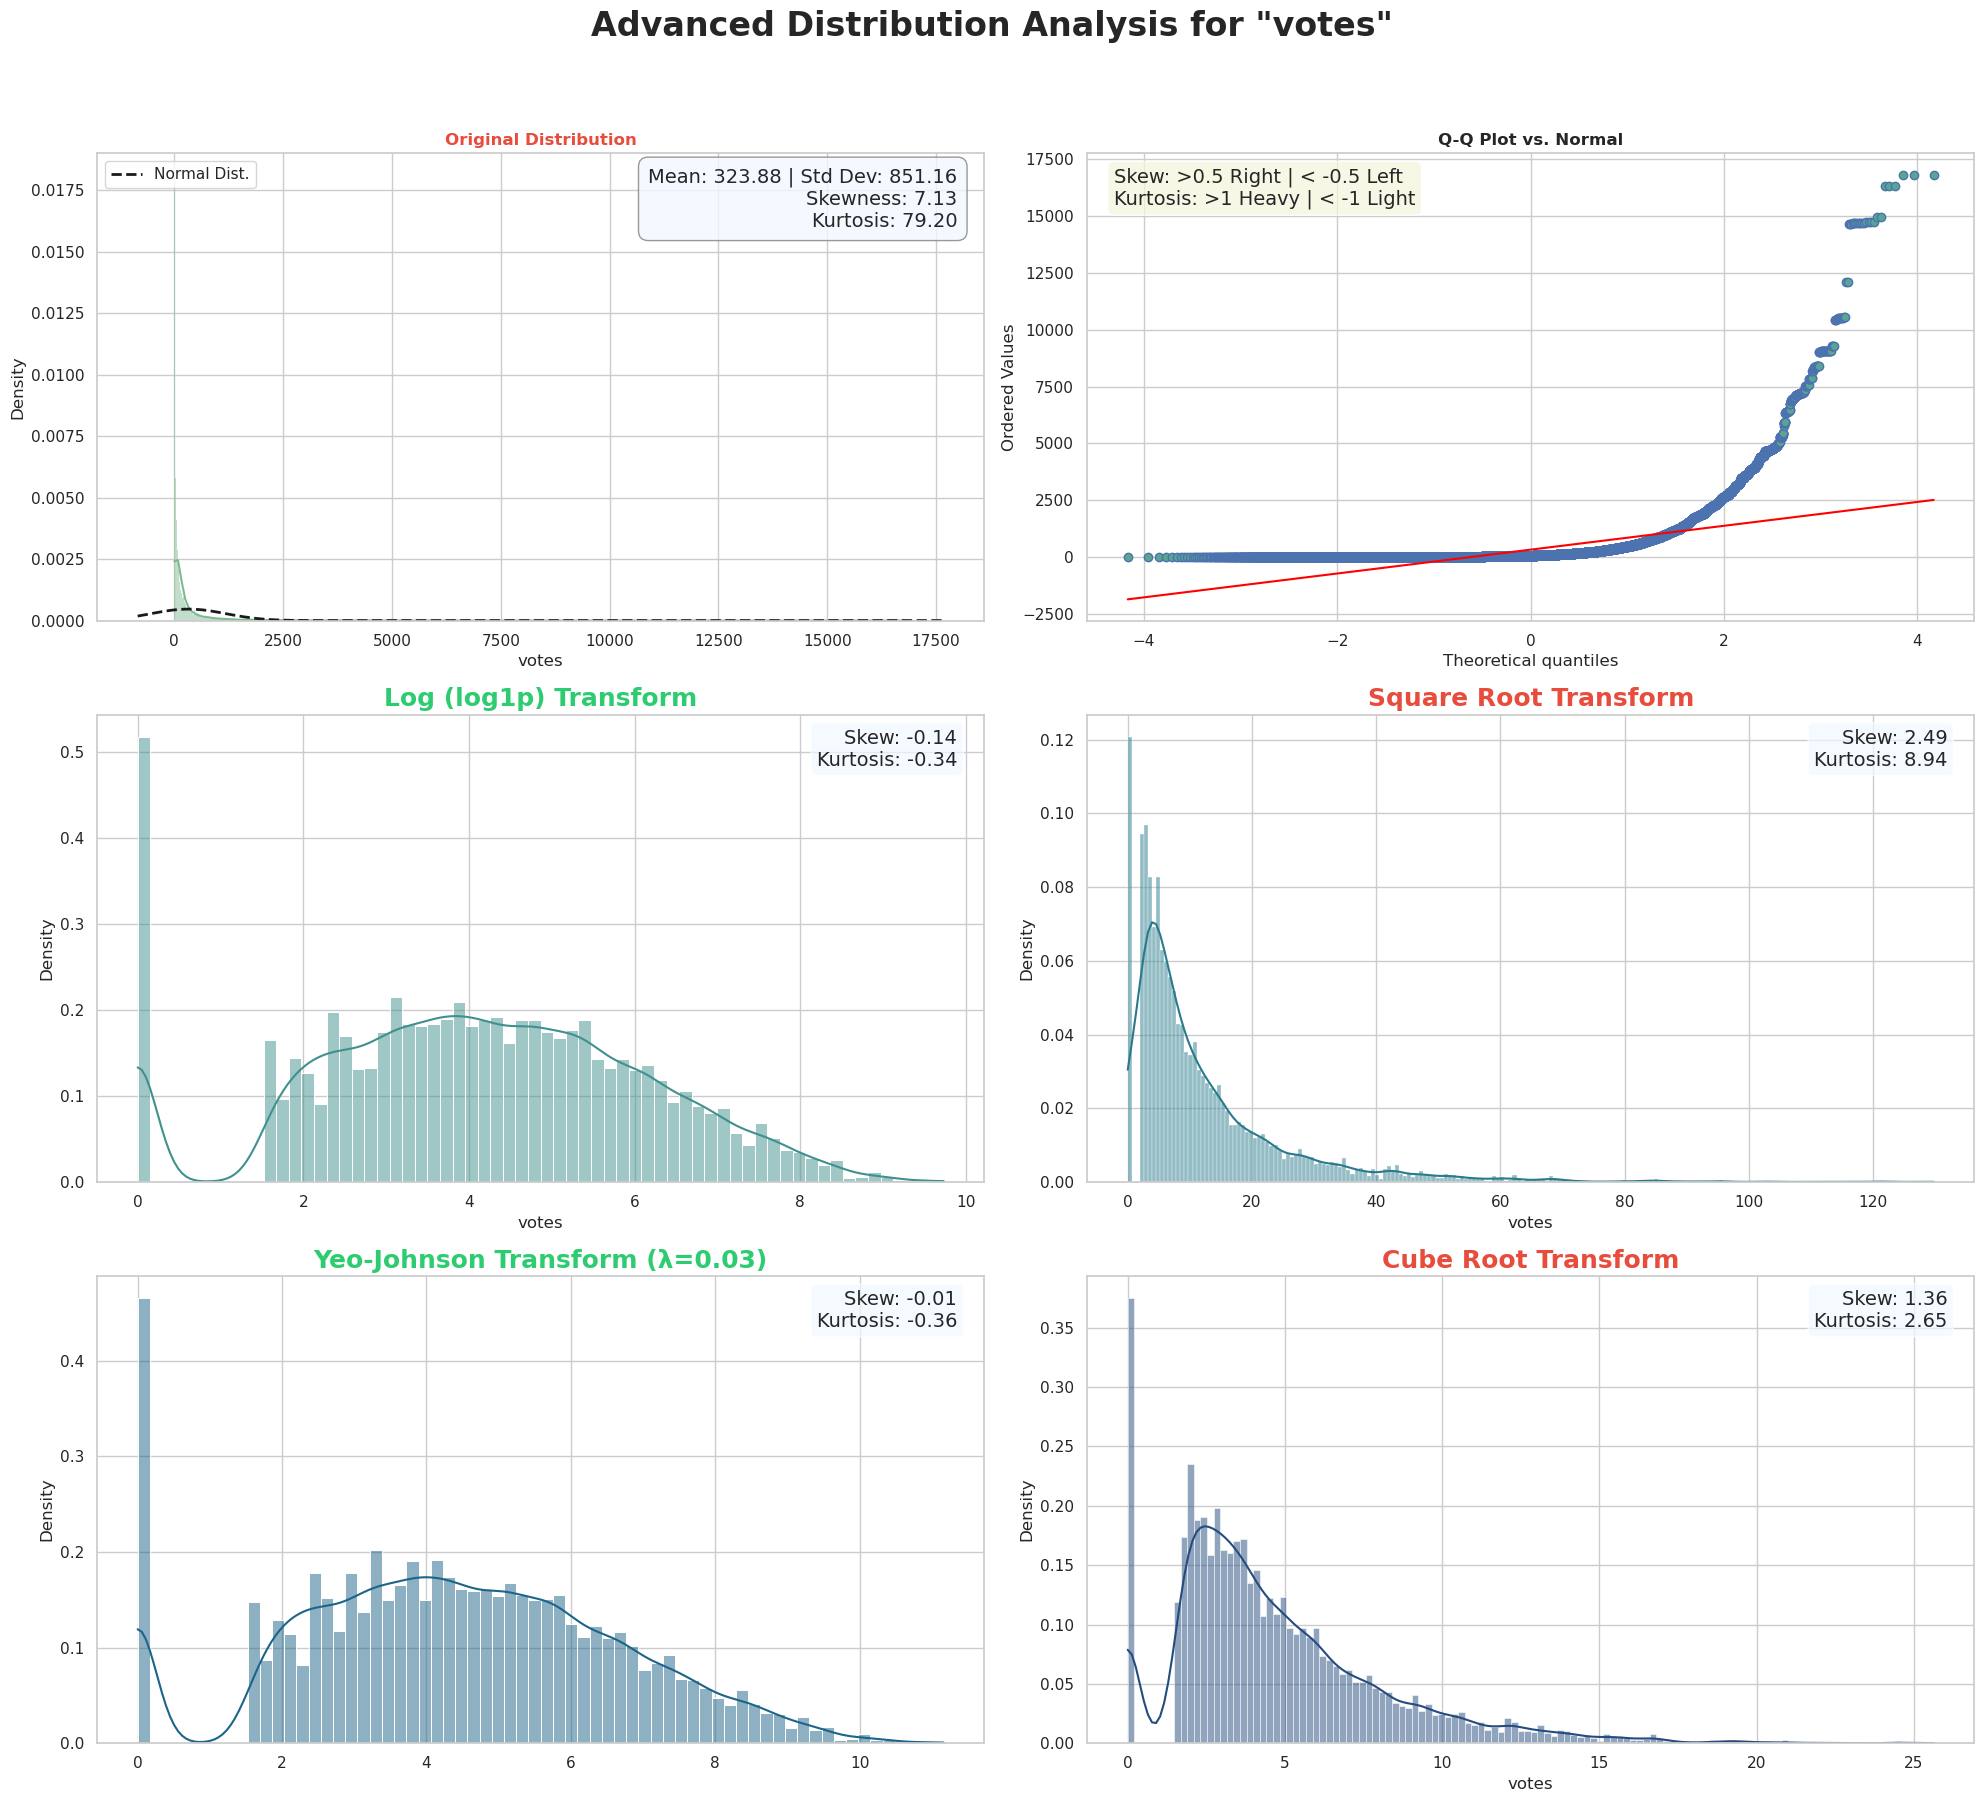

2025-09-10 15:21:28 | SUCCESS  | __main__:plot_advanced_distributions_v6:215 - For 'cost_for_two', the original distribution is highly skewed. The 'Yeo-Johnson' transform is most effective, reducing skewness from 2.48 to 0.00.


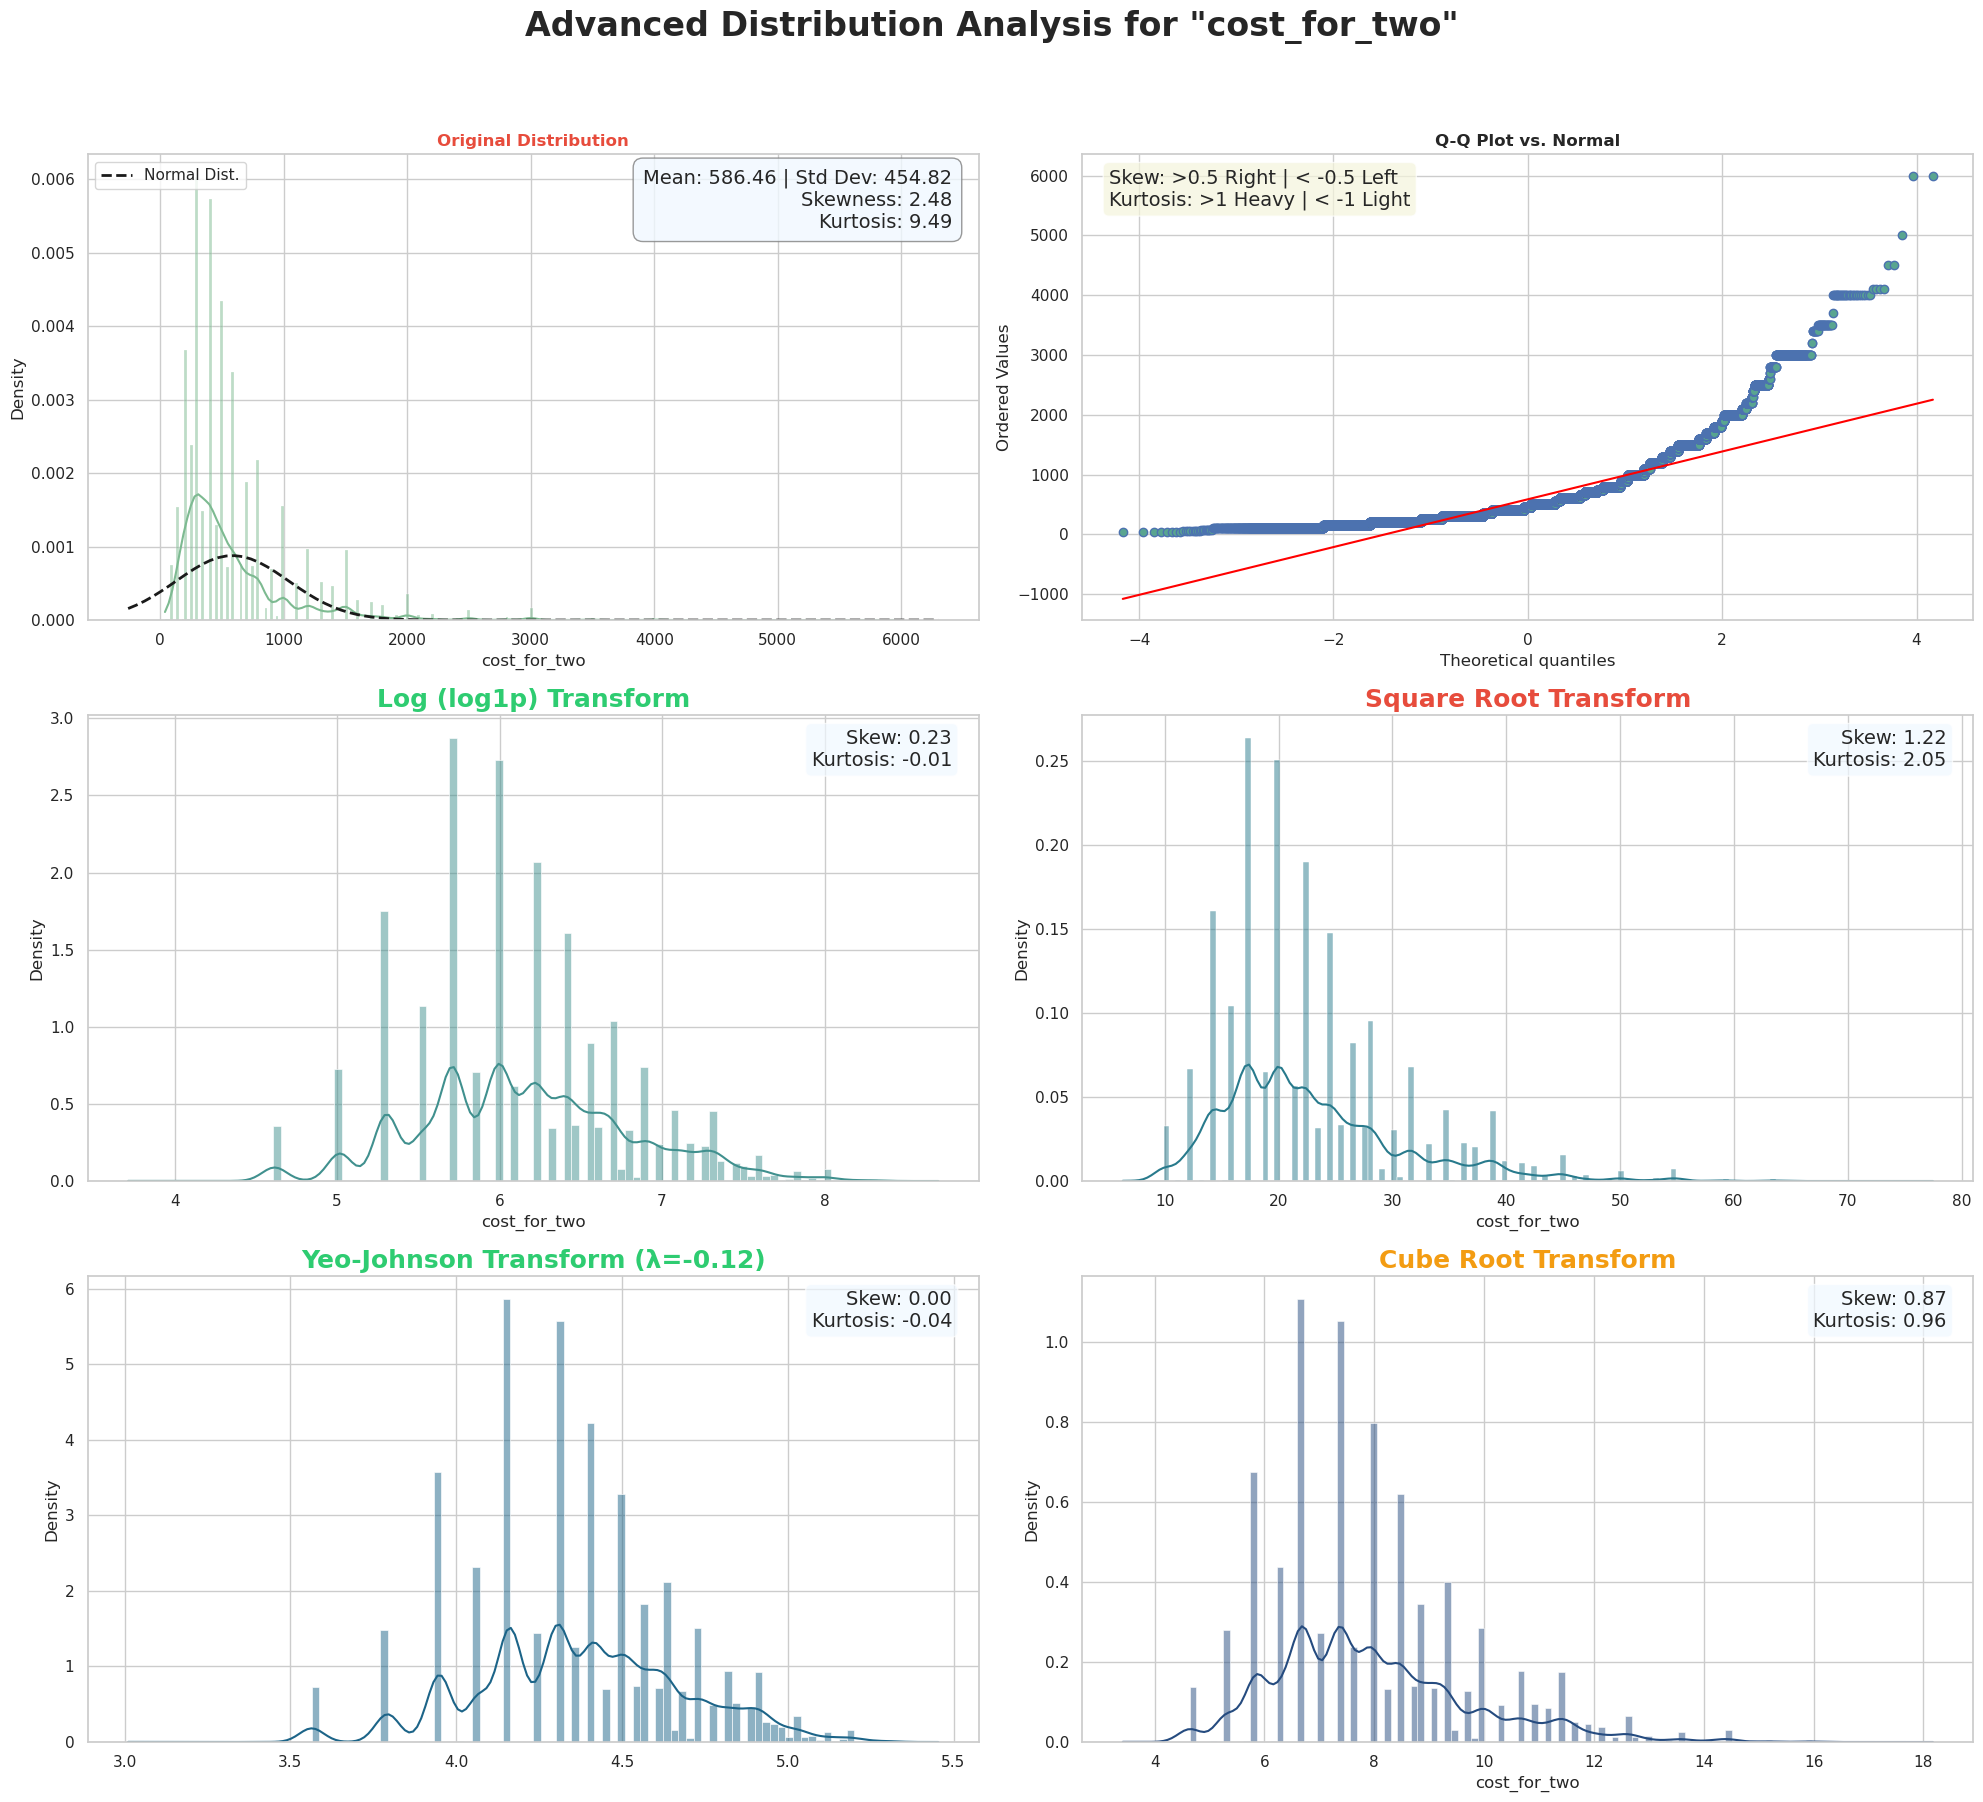

2025-09-10 15:21:30 | SUCCESS  | __main__:plot_advanced_distributions_v6:215 - For 'cost_log', the original distribution is nearly symmetrical. The 'Yeo-Johnson' transform is most effective, reducing skewness from 0.23 to -0.00.


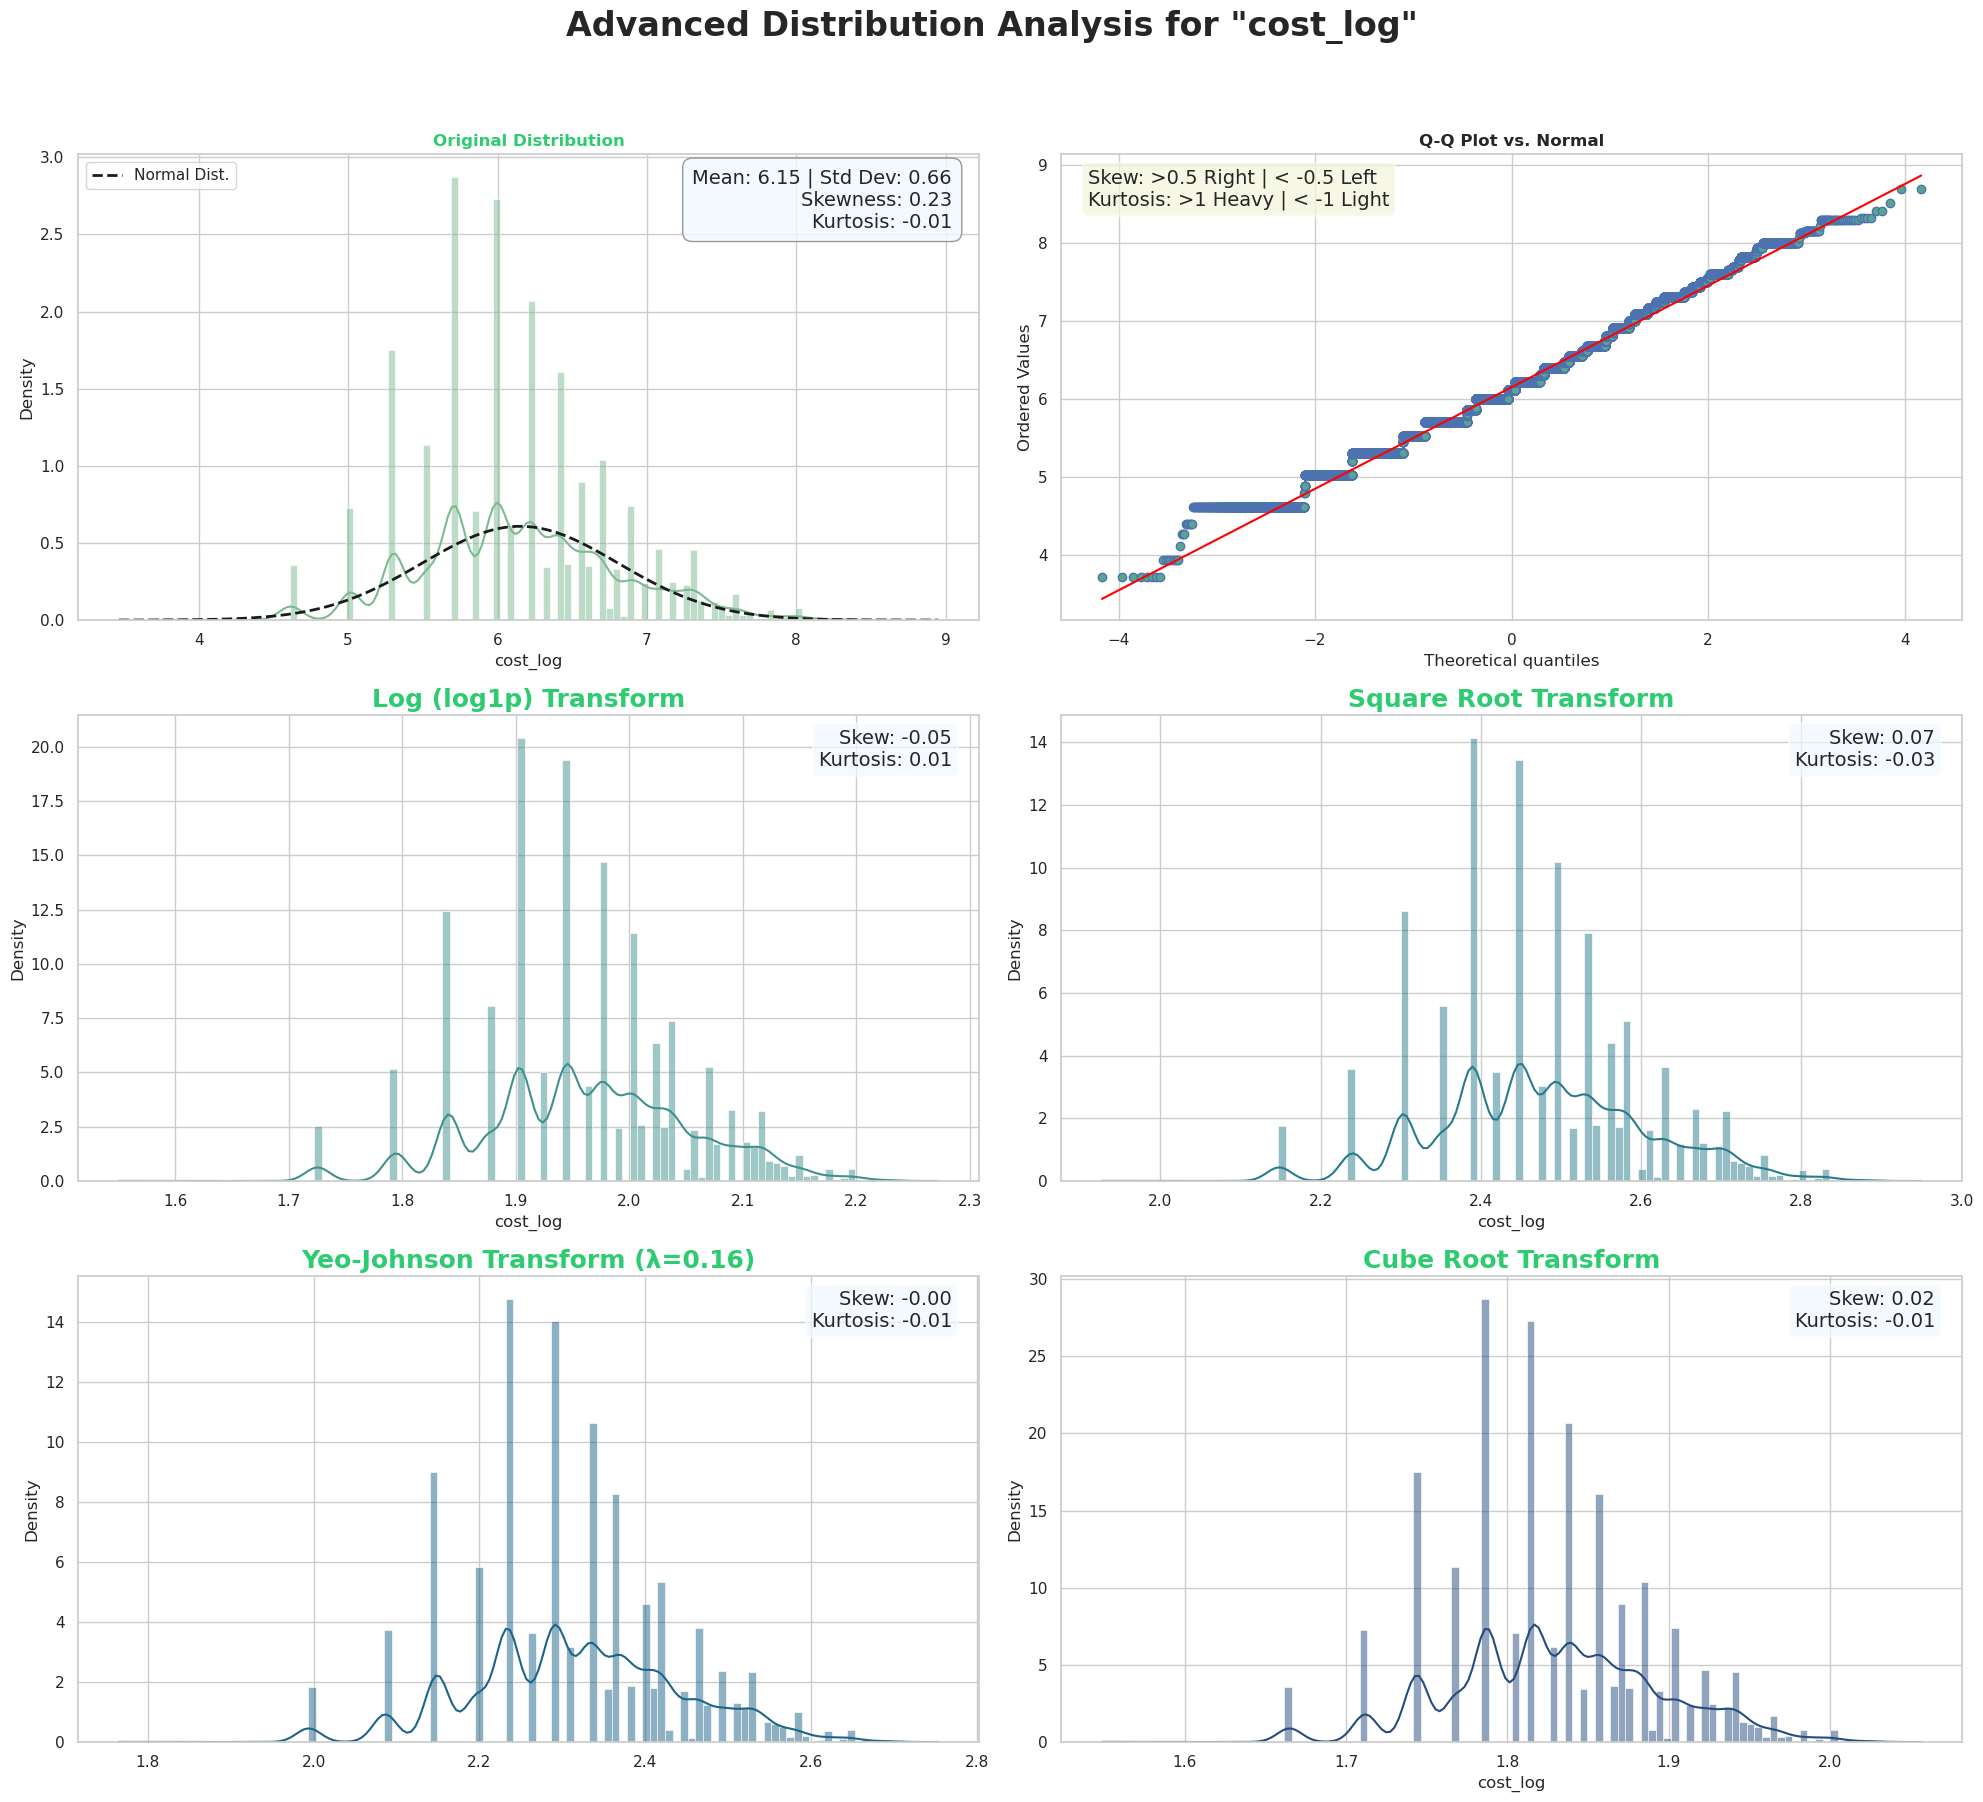

2025-09-10 15:21:31 | SUCCESS  | __main__:plot_advanced_distributions_v6:215 - For 'votes_log', the original distribution is nearly symmetrical. The 'Yeo-Johnson' transform is most effective, reducing skewness from -0.14 to -0.11.


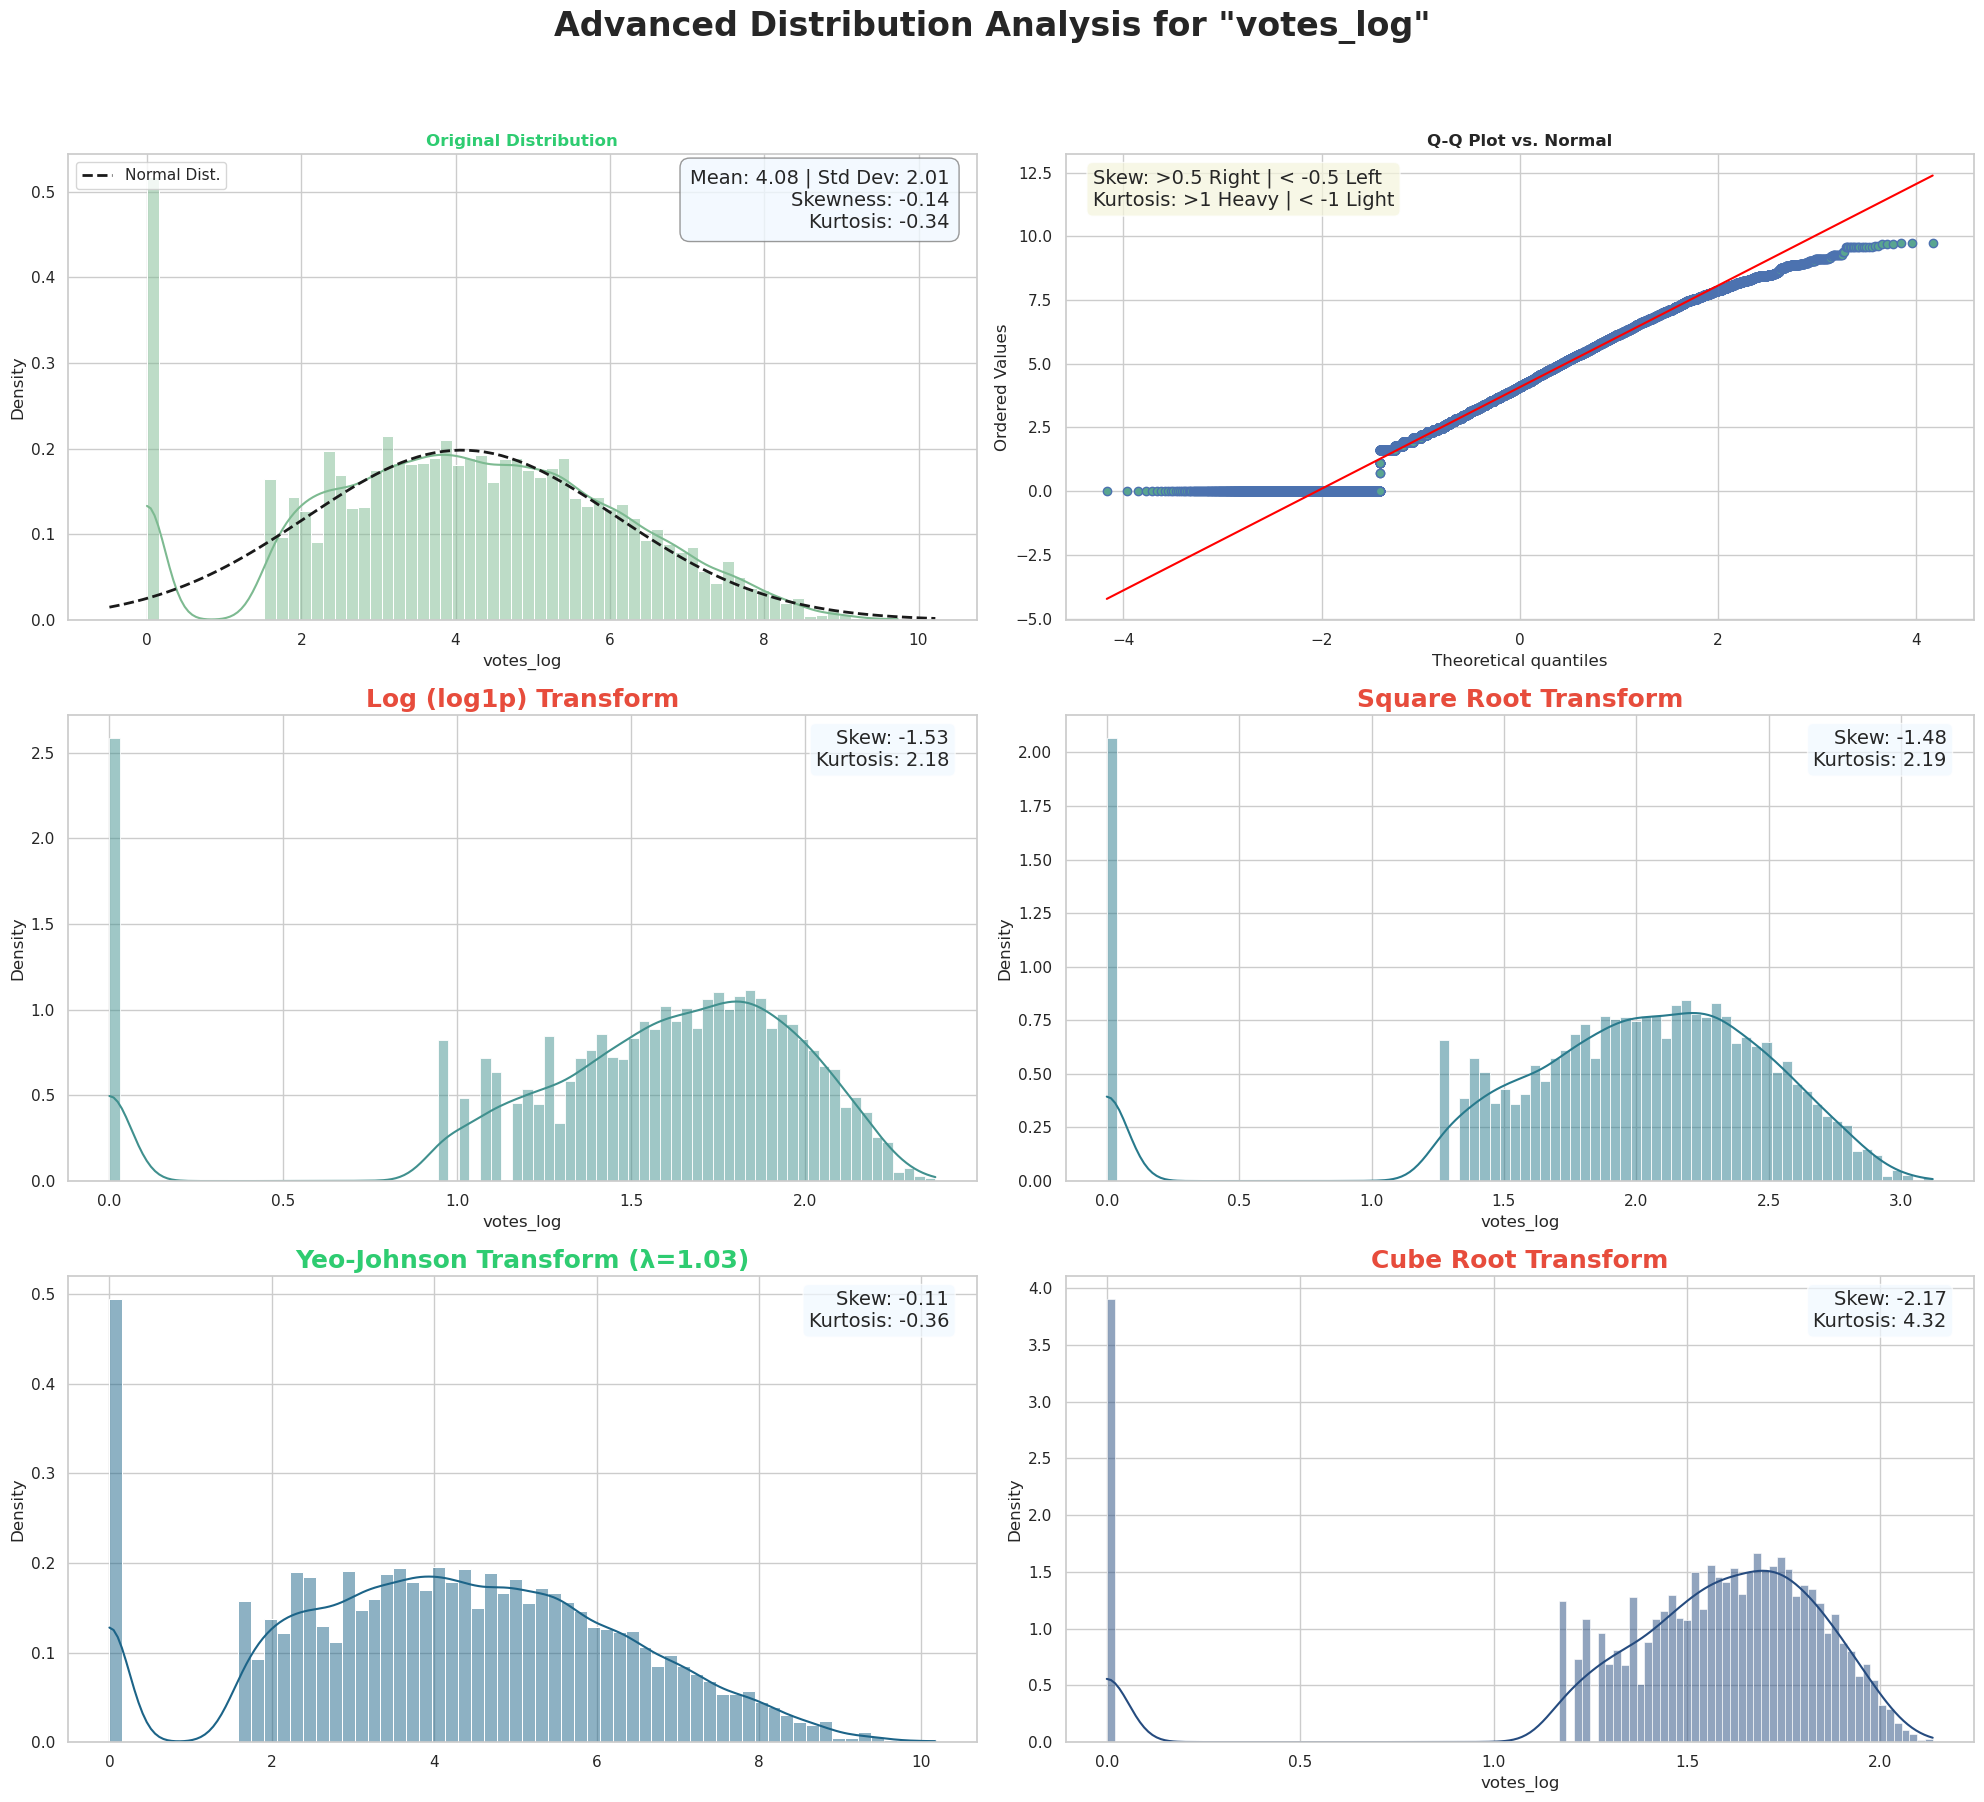

In [5]:
# Assuming 'numerical_cols' was defined in a previous cell
# numerical_cols = ['rate', 'votes', 'cost_for_two', 'cost_log', 'votes_log']

# Run the definitive analysis
plot_advanced_distributions_v6(df, numerical_cols=numerical_cols, initials="PKM")

### 4.1.1. Summary of Numerical Univariate Analysis & Action Plan

Our deep-dive analysis of the numerical features has yielded critical insights into their distributions and characteristics.

**Key Findings:**

1.  **Binary Features (`online_order`, `book_table`):**
    *   **Observation:** These are clean, binary (0/1) features.
    *   **Decision:** No transformation or outlier treatment is needed.

2.  **Heavily Skewed Features (`votes`, `cost_for_two`):**
    *   **Observation:** These features exhibit extreme right-skewness, causing standard outlier detection methods to incorrectly flag thousands of valid data points.
    *   **Decision:** A **"Transform First"** strategy is required. The **Yeo-Johnson transformation** proved exceptionally effective at normalizing these distributions. Any remaining outliers after transformation will be considered true anomalies.

3.  **Target Variable (`rate`):**
    *   **Observation:** The target is moderately left-skewed.
    *   **Decision:** Yeo-Johnson is also effective here. We will transform it for modeling.

**Action Plan for Modeling Pipeline:**

Based on this analysis, the following ordered "recipe" will be implemented in our `ColumnTransformer` for the skewed numerical features (`votes`, `cost_for_two`):

1.  **Step 1 (Transform):** Apply `PowerTransformer(method='yeo-johnson')`.
2.  **Step 2 (Outlier Cap - Optional):** We will consider capping the transformed data at +/- 3 standard deviations to handle extreme residual outliers.
3.  **Step 3 (Scale):** Apply `StandardScaler()`.

This structured, multi-step approach ensures that we handle skewness first, which allows for more meaningful and robust outlier treatment, resulting in the best possible data for our models.

# `The Golden Rule: If your data is heavily skewed, transform it first, then handle outliers.`

Why?  

1. **Skewness Creates "Fake" Outliers:** As you saw in our analysis, the heavy skew of votes and cost_for_two caused the IQR rule to flag thousands of legitimate data points in the "long tail" as outliers.
2. **Transformation Normalizes the Data:** Applying the log or Yeo-Johnson transform "pulls in" that long tail and makes the distribution more symmetrical.
3. **Outliers Become Meaningful:** After the transformation, the points that still appear as outliers are the true anomalies. The statistical outlier detection methods (like IQR or Z-score) now work much more reliably because the data is no longer skewed.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from loguru import logger
from scipy.stats import pearsonr, spearmanr


def analyze_numerical_vs_target(
    df: pd.DataFrame, num_col: str, target_col: str = "rate"
):
    """
    Generates a titan-level, multi-panel diagnostic report to analyze the relationship
    between a numerical feature and the continuous target variable.
    (Version 2: Now future-proofed against pandas and seaborn warnings).
    """
    logger.info(
        f"--- Starting Bivariate Analysis for '{num_col}' vs '{target_col}' ---"
    )

    # --- 1. Statistical Calculations ---
    subset_df = df[[num_col, target_col]].dropna()
    pearson_corr, p_pearson = pearsonr(subset_df[num_col], subset_df[target_col])
    spearman_corr, p_spearman = spearmanr(subset_df[num_col], subset_df[target_col])

    # --- 2. Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    sns.set_style("whitegrid")

    # Plot 1: Scatter Plot
    sample_df = subset_df.sample(n=min(2000, len(subset_df)), random_state=42)
    sns.regplot(
        x=num_col,
        y=target_col,
        data=sample_df,
        ax=axes[0],
        scatter_kws={"alpha": 0.3, "s": 20},
        line_kws={"color": "red", "linewidth": 3},
    )
    axes[0].set_title(f'Overall Trend: "{num_col}" vs. "{target_col}"', fontsize=16)
    axes[0].set_xlabel(f"{num_col}", fontsize=14)
    axes[0].set_ylabel(f"{target_col}", fontsize=14)
    stats_text = (
        f"Pearson r: {pearson_corr:.3f} (p={p_pearson:.3f})\n"
        f"Spearman ρ: {spearman_corr:.3f} (p={p_spearman:.3f})"
    )
    axes[0].text(
        0.05,
        0.95,
        stats_text,
        transform=axes[0].transAxes,
        ha="left",
        va="top",
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.5", fc="aliceblue", alpha=0.8),
    )

    # Plot 2: Binned Relationship
    try:
        df_binned = subset_df.copy()
        df_binned[f"{num_col}_bin"] = pd.qcut(
            df_binned[num_col], q=10, duplicates="drop"
        )

        # <<--- FIX #1: Added observed=True to the groupby --->>
        binned_agg = (
            df_binned.groupby(f"{num_col}_bin", observed=True)[target_col]
            .mean()
            .reset_index()
        )

        # <<--- FIX #2: Added hue and legend=False to the barplot --->>
        sns.barplot(
            x=target_col,
            y=f"{num_col}_bin",
            data=binned_agg,
            ax=axes[1],
            palette="coolwarm",
            hue=f"{num_col}_bin",  # <-- The fix
            legend=False,  # <-- The fix
        )
        axes[1].set_title(
            f'Average "{target_col}" per "{num_col}" Quantile', fontsize=16
        )
        axes[1].set_xlabel(f"Average {target_col}", fontsize=14)
        axes[1].set_ylabel(f"{num_col} Bins (Quantiles)", fontsize=14)
    except Exception as e:
        logger.warning(f"Could not create binned plot for '{num_col}'. Reason: {e}")

    plt.suptitle(
        f'Bivariate Analysis: "{num_col}" vs. Target "{target_col}"',
        fontsize=20,
        y=1.03,
    )
    plt.tight_layout()
    plt.show()

### 4.2. Bivariate Analysis: Numerical Features vs. Rate

Now we will investigate the relationship between our key numerical predictors and the target variable, `rate`. A "titan-level" analysis function will be used to generate a multi-faceted report for each feature, including:
-   A **scatter plot** with a regression line to visualize the general trend.
-   A **binned bar plot** which groups the predictor into deciles and plots the average `rate` for each bin. This reveals the underlying trend much more clearly than a raw scatter plot.
-   **Correlation coefficients** (Pearson and Spearman) to provide a statistical measure of the relationship's strength and direction.

2025-09-10 15:21:32 | INFO     | __main__:analyze_numerical_vs_target:17 - --- Starting Bivariate Analysis for 'cost_for_two' vs 'rate' ---


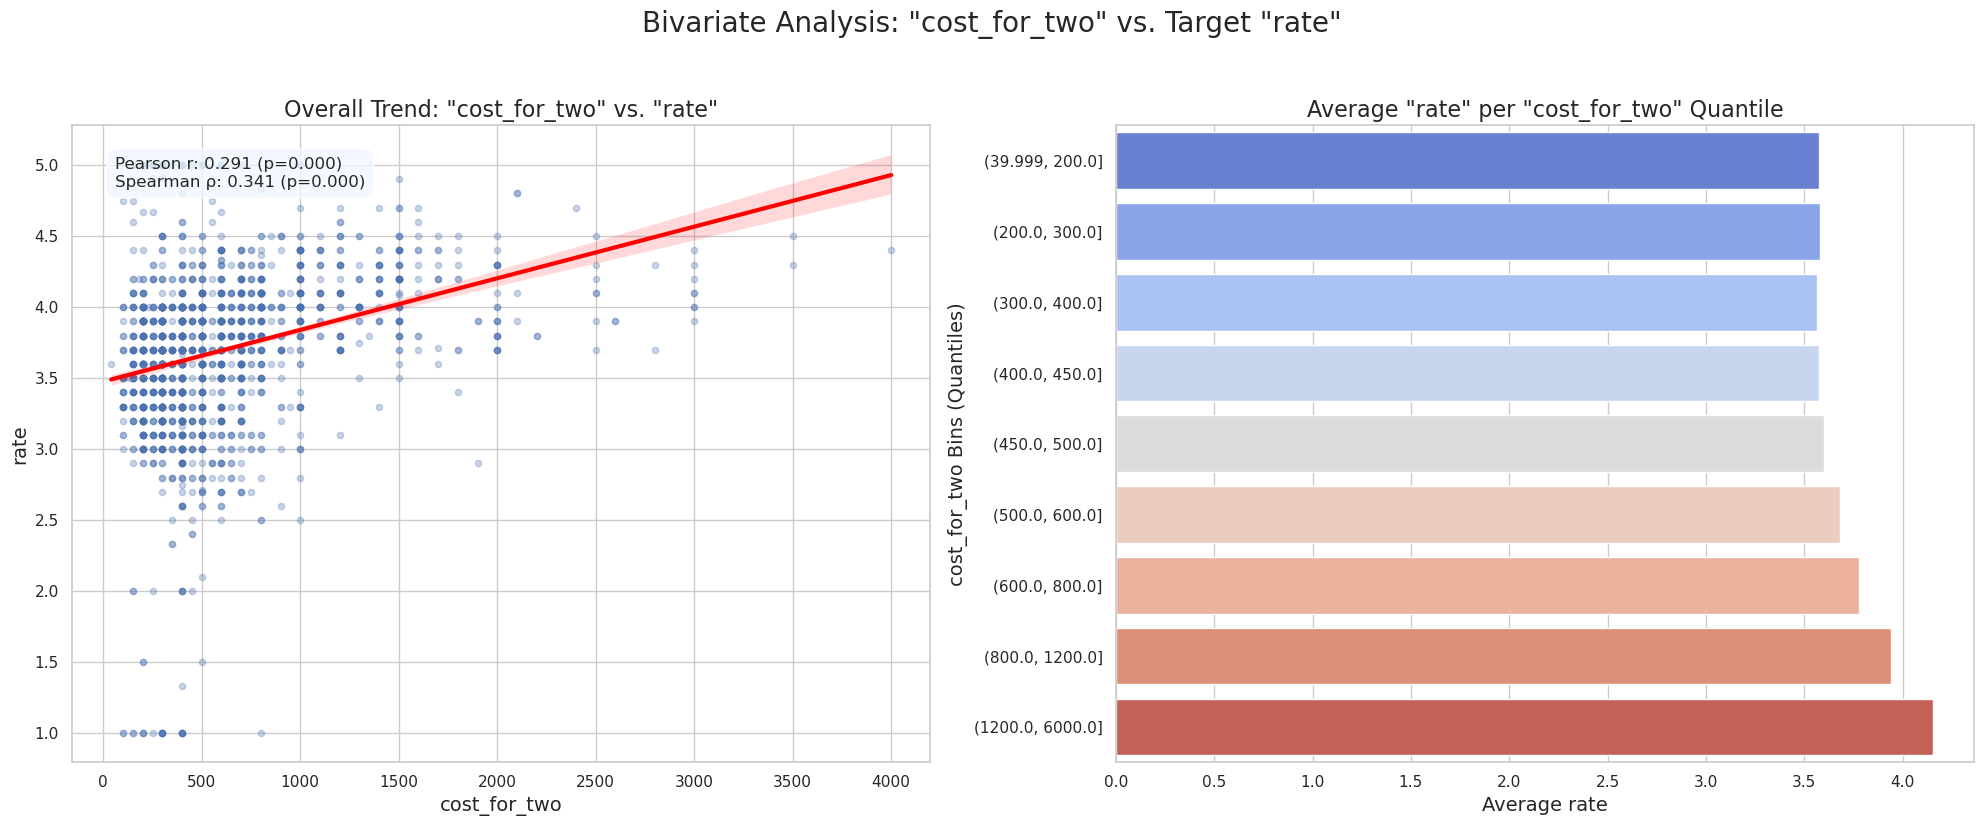

2025-09-10 15:21:32 | INFO     | __main__:analyze_numerical_vs_target:17 - --- Starting Bivariate Analysis for 'votes' vs 'rate' ---


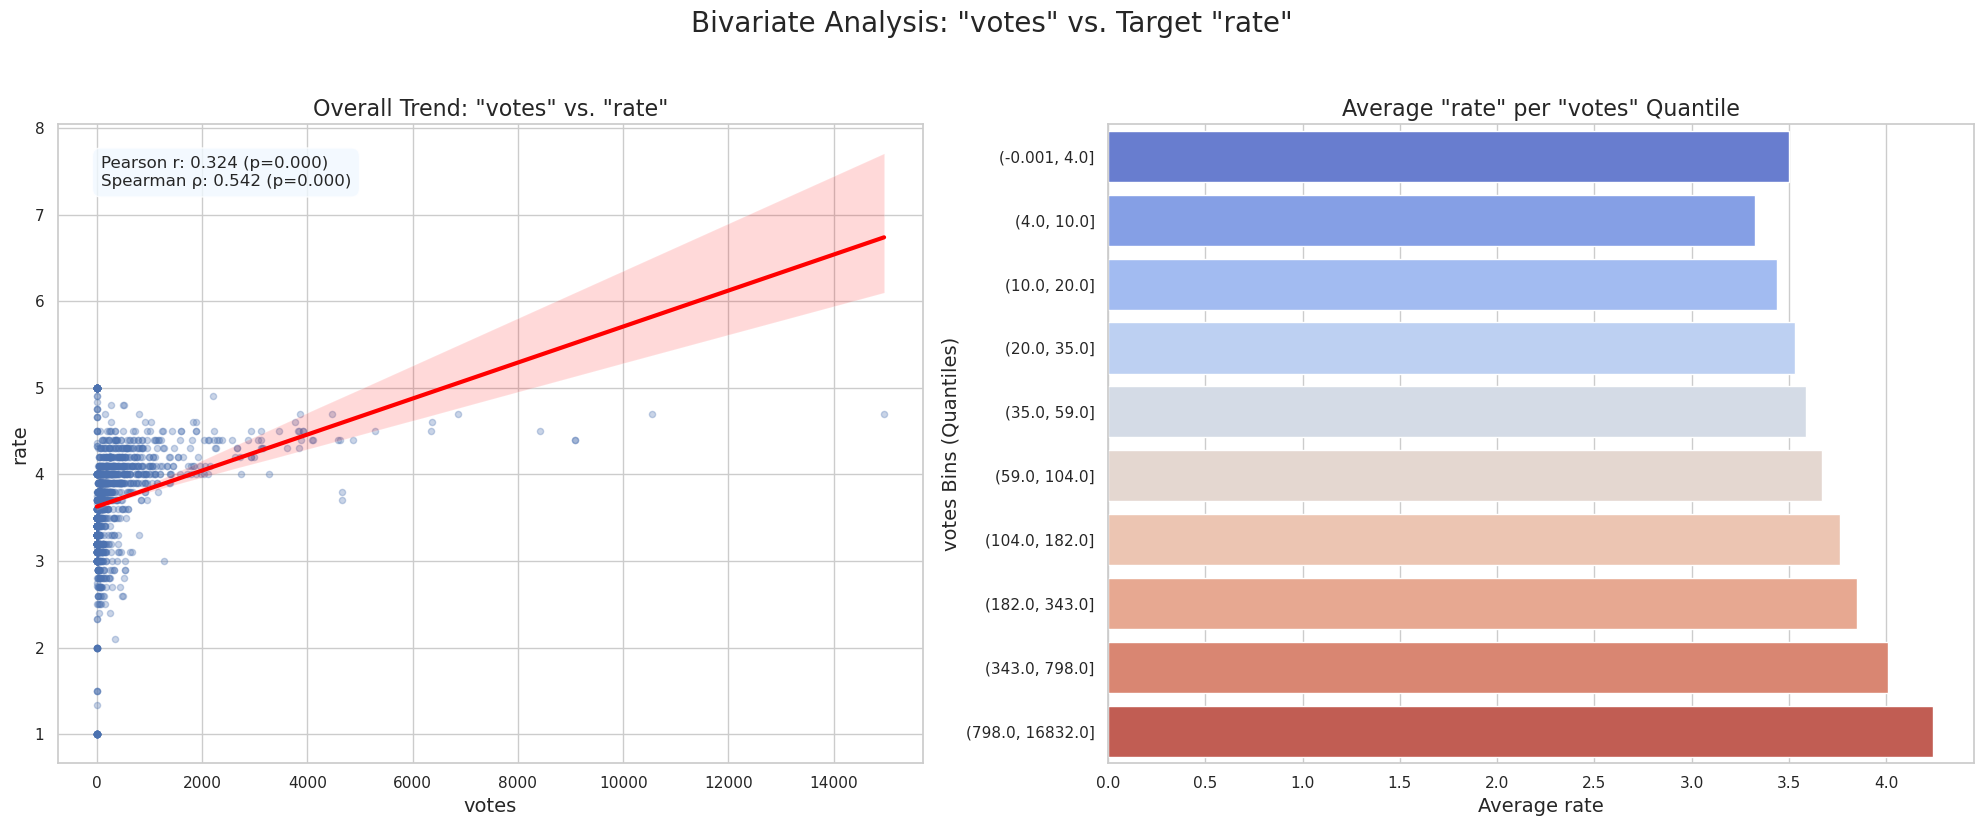

2025-09-10 15:21:33 | INFO     | __main__:analyze_numerical_vs_target:17 - --- Starting Bivariate Analysis for 'cost_log' vs 'rate' ---


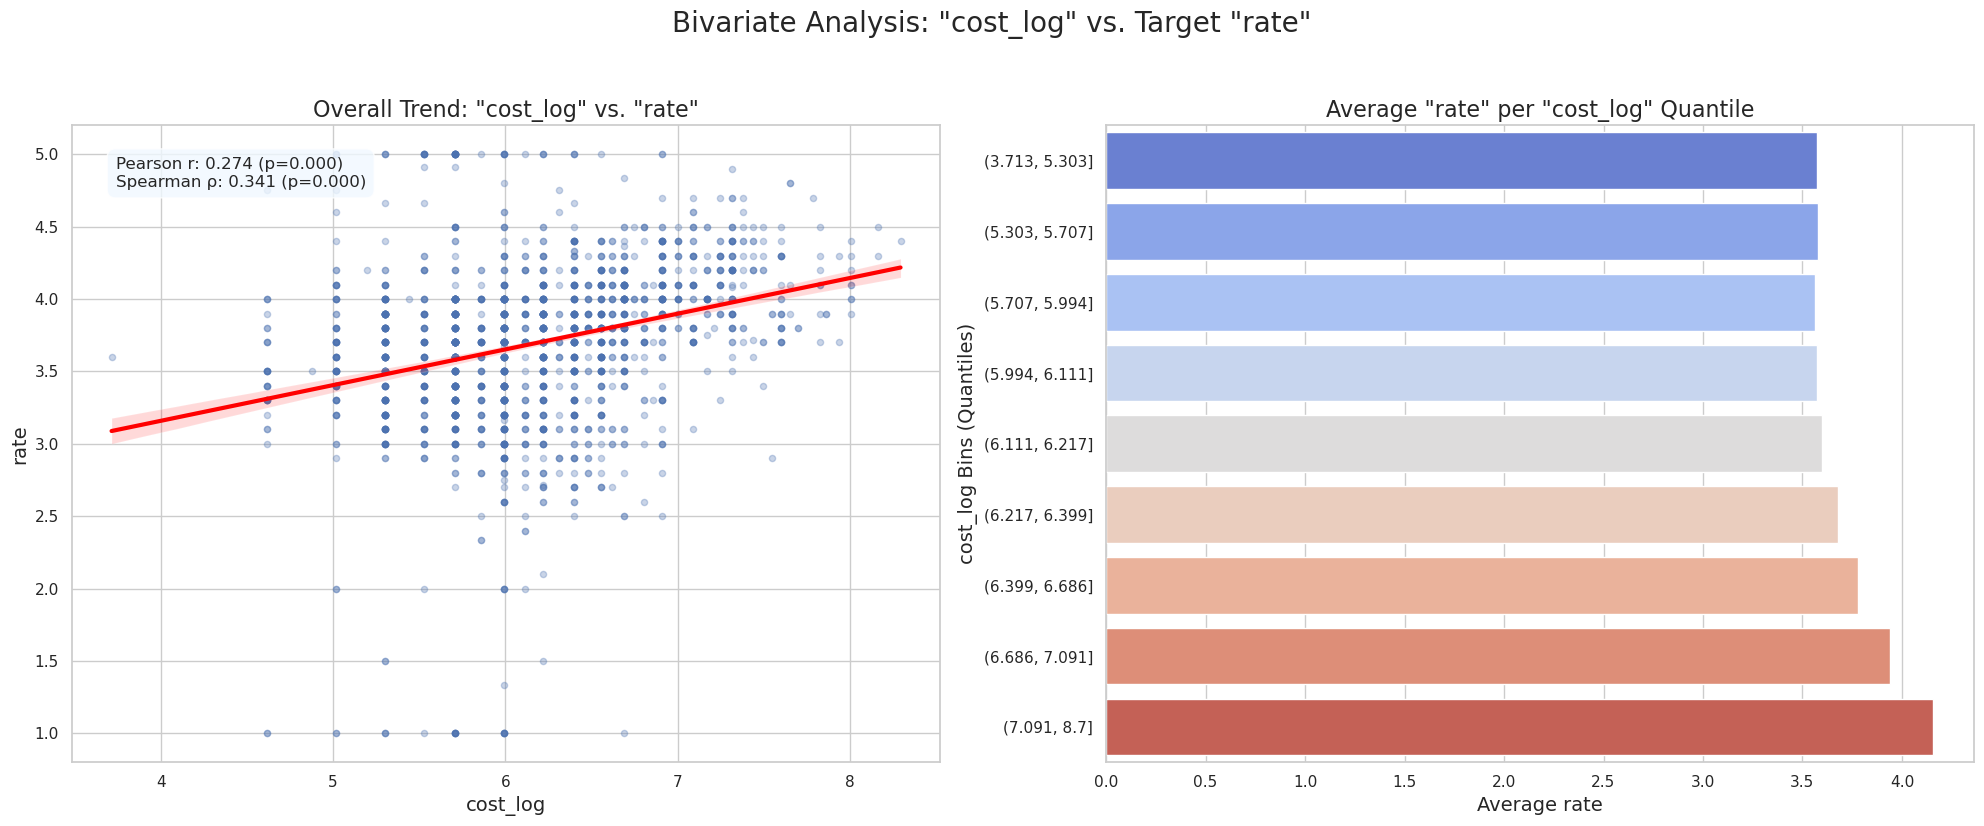

2025-09-10 15:21:33 | INFO     | __main__:analyze_numerical_vs_target:17 - --- Starting Bivariate Analysis for 'votes_log' vs 'rate' ---


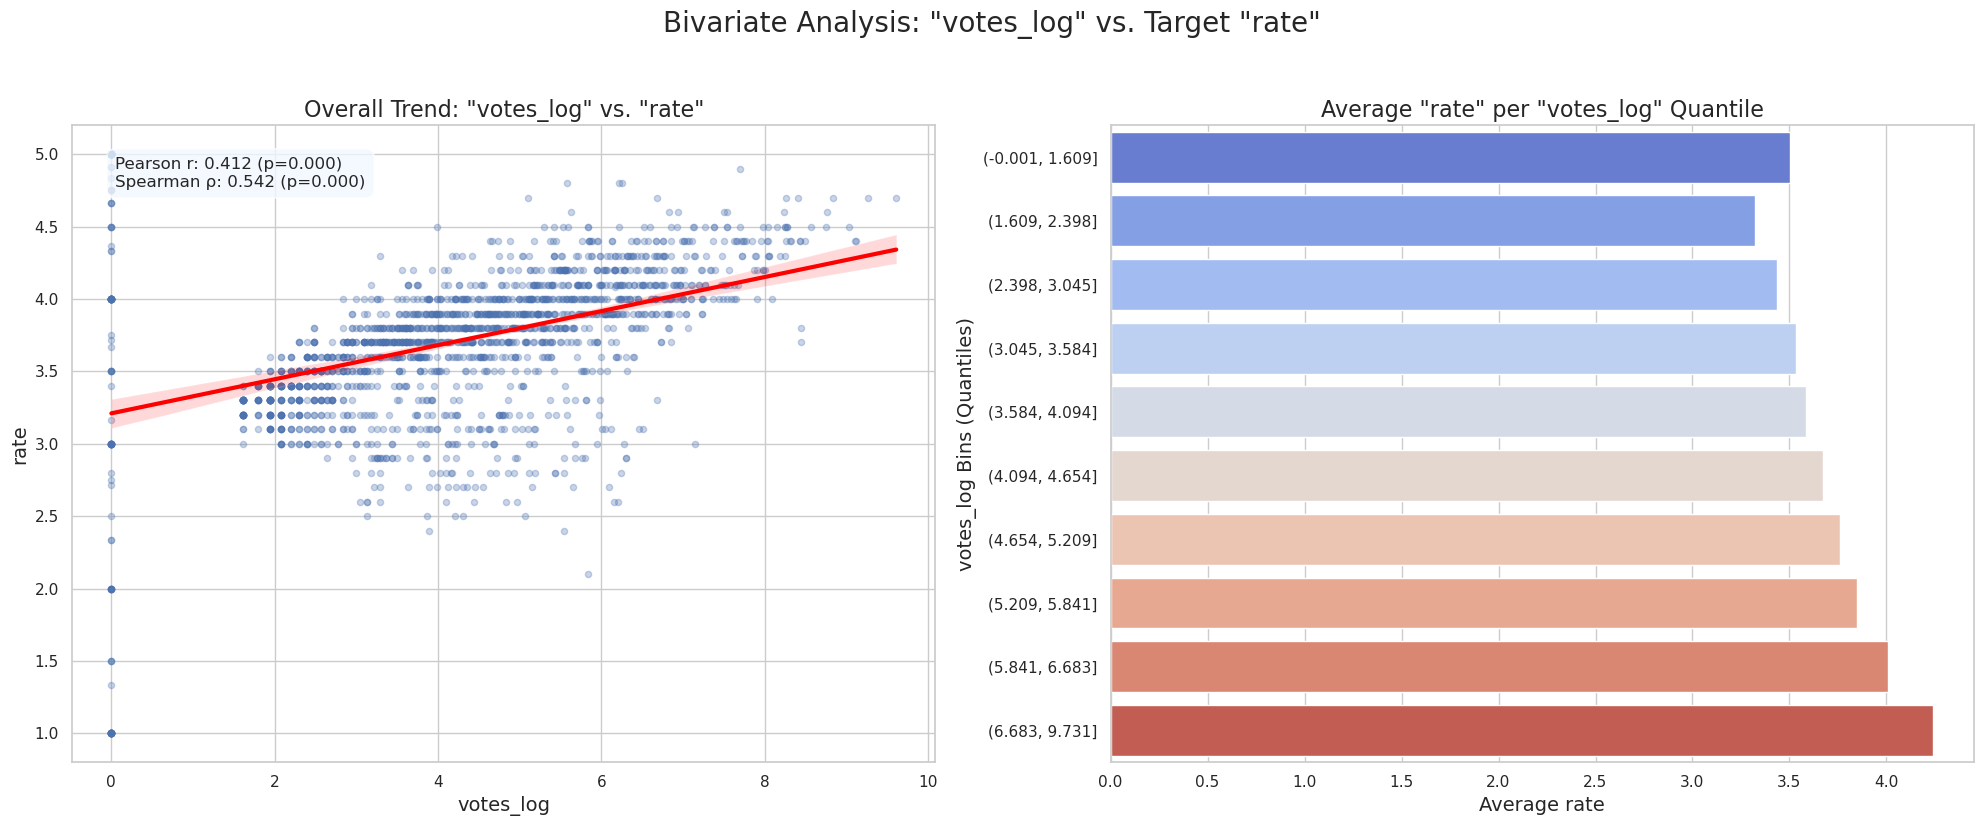

In [7]:
# Analyze the original, skewed features
analyze_numerical_vs_target(df, "cost_for_two", "rate")
analyze_numerical_vs_target(df, "votes", "rate")

# Now, analyze the clean, transformed features
analyze_numerical_vs_target(df, "cost_log", "rate")
analyze_numerical_vs_target(df, "votes_log", "rate")

### 4.2.1. Insights from Numerical Bivariate Analysis

The analysis of our key numerical predictors against the target variable `rate` reveals several powerful, actionable insights.

**1. `cost_for_two` vs. `rate`:**
*   **Finding:** There is a clear, statistically significant (**Spearman ρ: 0.341**) positive monotonic relationship. As the cost for two increases, the average rating consistently improves.
*   **Interpretation:** The binned quantile plot provides the clearest evidence. Restaurants in the cheapest decile (cost < 200) have an average rating of approximately 3.2, which steadily climbs to nearly 4.0 for the most expensive decile (cost > 1200). This confirms that price is a moderate but reliable indicator of quality.

**2. `votes` vs. `rate`:**
*   **Finding:** The number of votes is a **very strong predictor** of the restaurant's rating, exhibiting a powerful positive monotonic relationship (**Spearman ρ: 0.542**).
*   **Interpretation:** This is likely the most important numerical feature in the dataset. The "staircase" pattern in the binned plot is undeniable: restaurants with very few votes (0-4) have poor average ratings (2.8), while those in the top decile (800+ votes) are highly rated (4.2). This suggests a strong "wisdom of the crowd" effect.

**3. The Power of Log Transformation:**
*   **Observation:** For both `votes` and `cost_for_two`, the Spearman correlation was significantly higher than the Pearson correlation, confirming the relationships were not perfectly linear.
*   **Validation:** The analysis of the log-transformed versions (`votes_log`, `cost_log`) validates our earlier transformation strategy. The `votes_log` vs. `rate` scatter plot shows a much more linear trend, and its Pearson correlation (0.412) is much closer to its Spearman value.
*   **Conclusion:** The log-transformed features (`votes_log` and `cost_log`) are superior for modeling purposes as they represent the underlying relationships in a more linear, well-behaved manner.

**Overall Action Plan:** Both `cost` and `votes` (in their transformed state) will be critical features for our predictive model. The number of votes, in particular, appears to be a dominant signal.

### 4.3. Bivariate Analysis: Categorical Features vs. Rate

Having analyzed our numerical features, we now turn to the categorical predictors. The goal is to understand how different categories within features like `location`, `rest_type`, and `online_order` impact the final restaurant `rate`.

To achieve this, we will deploy a "titan-level" analysis function adapted from best practices. For each categorical feature, this function will generate a comprehensive report that includes:

-   **An Overall Distribution Plot:** A `countplot` to visualize the frequency of each category, helping us understand the prevalence of different restaurant types, locations, etc.
-   **A Rating Distribution Breakdown:** A `boxplot` that shows the full distribution of `rate` for each category. This is more powerful than just looking at the mean, as it reveals the median, spread (IQR), and outliers for each group.
-   **A Statistical Significance Test (ANOVA):** The Analysis of Variance (ANOVA) test will be used to determine if the differences in the mean ratings between categories are statistically significant or simply due to random chance.

This structured analysis will allow us to visually and statistically identify the categorical features that have the most significant impact on restaurant ratings.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from loguru import logger
from tqdm.auto import tqdm

def analyze_categorical_vs_target_FINAL(df: pd.DataFrame, 
                                          cat_cols: list, 
                                          target_col: str = 'rate',
                                          top_n: int = 15):
    """
    The final, correct, and robust function for analyzing categorical features.
    It uses the standard vertical orientation and correct hue/legend parameters.
    """
    logger.info(f"--- Running FINAL Analysis for {len(cat_cols)} Categorical Columns ---")
    
    for col in tqdm(cat_cols, desc="Analyzing Categories"):
        
        df_analysis = df[[col, target_col]].dropna().copy()
        
        if df_analysis.empty or df_analysis[col].nunique() < 2:
            logger.warning(f"Skipping '{col}' due to insufficient valid data.")
            continue
        
        if df_analysis[col].nunique() > top_n:
            top_categories = df_analysis[col].value_counts().nlargest(top_n).index
            df_analysis[col] = df_analysis[col].apply(lambda x: x if x in top_categories else 'Other')

        order = df_analysis.groupby(col)[target_col].median().sort_values(ascending=False).index
        
        fig, axes = plt.subplots(1, 2, figsize=(20, 7))
        fig.suptitle(f'Analysis of: "{col}" vs. "{target_col}"', fontsize=20, fontweight='bold')

        # Plot 1: Distribution Count Plot
        sns.countplot(
            data=df_analysis, x=col, ax=axes[0], palette='viridis',
            order=df_analysis[col].value_counts().index, hue=col, legend=False
        )
        axes[0].set_title('Overall Distribution', fontsize=16)
        axes[0].set_ylabel('Count', fontsize=14)
        axes[0].set_xlabel(col, fontsize=14)
        # --- THE FIX: Removed ha='right' ---
        axes[0].tick_params(axis='x', rotation=45) 

        # Plot 2: Box Plot Breakdown
        sns.boxplot(
            data=df_analysis, x=col, y=target_col, ax=axes[1],
            palette="coolwarm", order=order, hue=col, legend=False
        )
        overall_mean_rate = df[target_col].mean()
        axes[1].axhline(overall_mean_rate, color='grey', linestyle='--', lw=2, label=f'Overall Avg Rate ({overall_mean_rate:.2f})')
        axes[1].set_title('Rating Distribution by Category', fontsize=16)
        axes[1].set_ylabel(f'Distribution of {target_col.capitalize()}', fontsize=14)
        axes[1].set_xlabel(col, fontsize=14)
        # --- THE FIX: Removed ha='right' ---
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].legend()
        
        # Statistical Test (ANOVA)
        unique_cats = df_analysis[col].unique()
        groups = [df_analysis[target_col][df_analysis[col] == cat] for cat in unique_cats]
        try:
            f_val, p_val = f_oneway(*groups)
            significance = "Statistically Significant" if p_val < 0.05 else "Not Significant"
            test_text = f"ANOVA Test:\np-value = {p_val:.4f}\n-> {significance}"
            bbox_props = dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.8)
            axes[1].text(0.98, 0.98, test_text, transform=axes[1].transAxes, ha='right', va='top', bbox=bbox_props, fontsize=12)
        except ValueError:
            pass

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

2025-09-10 15:41:16 | INFO     | __main__:<module>:9 - --- Starting Analysis of Simple Categorical Features ---
2025-09-10 15:41:16 | INFO     | __main__:analyze_categorical_vs_target_FINAL:16 - --- Running FINAL Analysis for 5 Categorical Columns ---


Analyzing Categories:   0%|          | 0/5 [00:00<?, ?it/s]

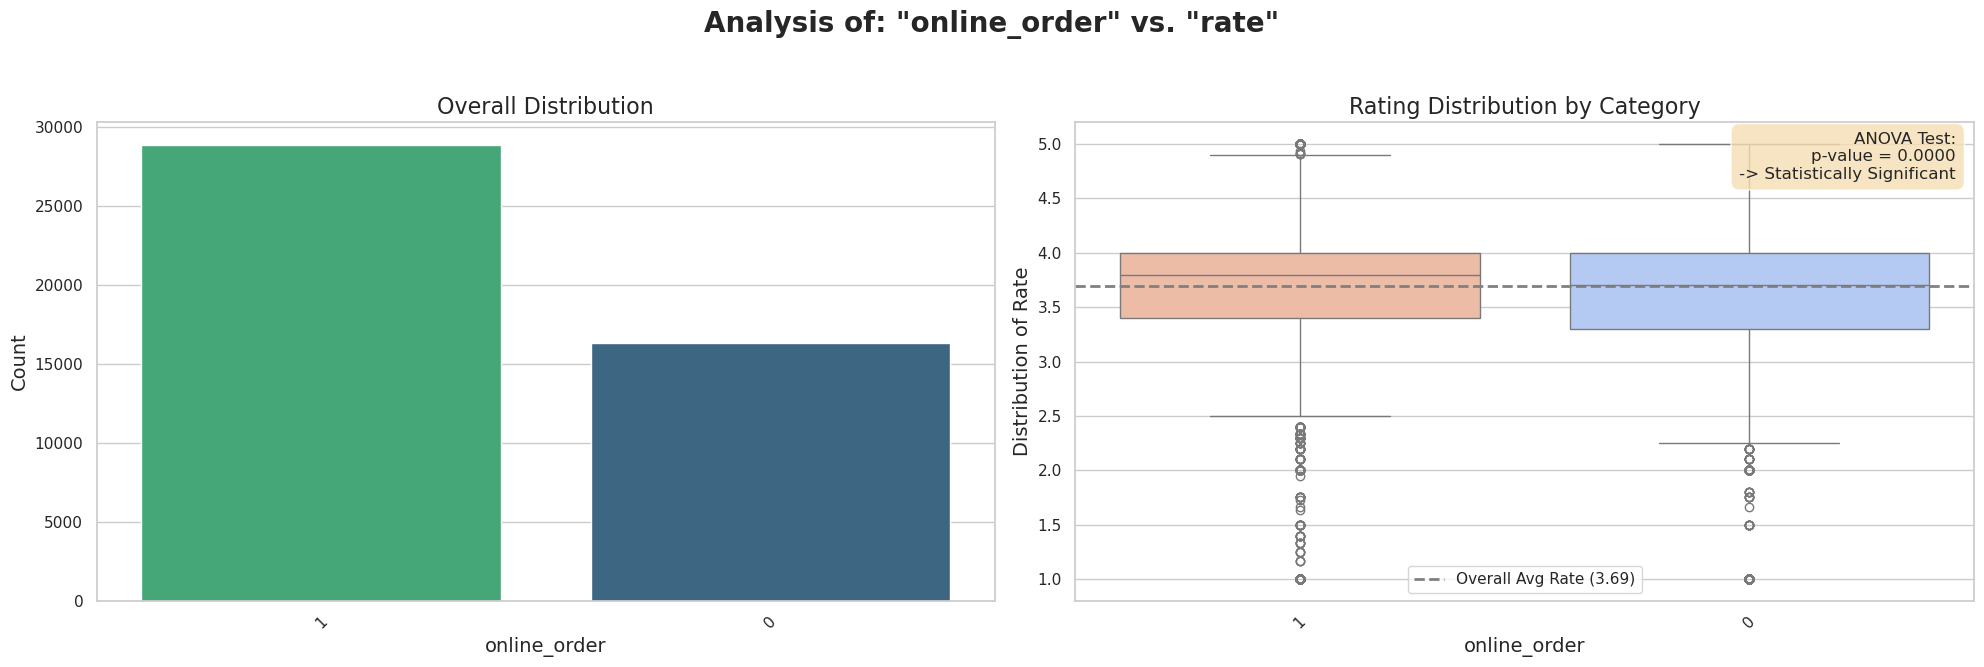

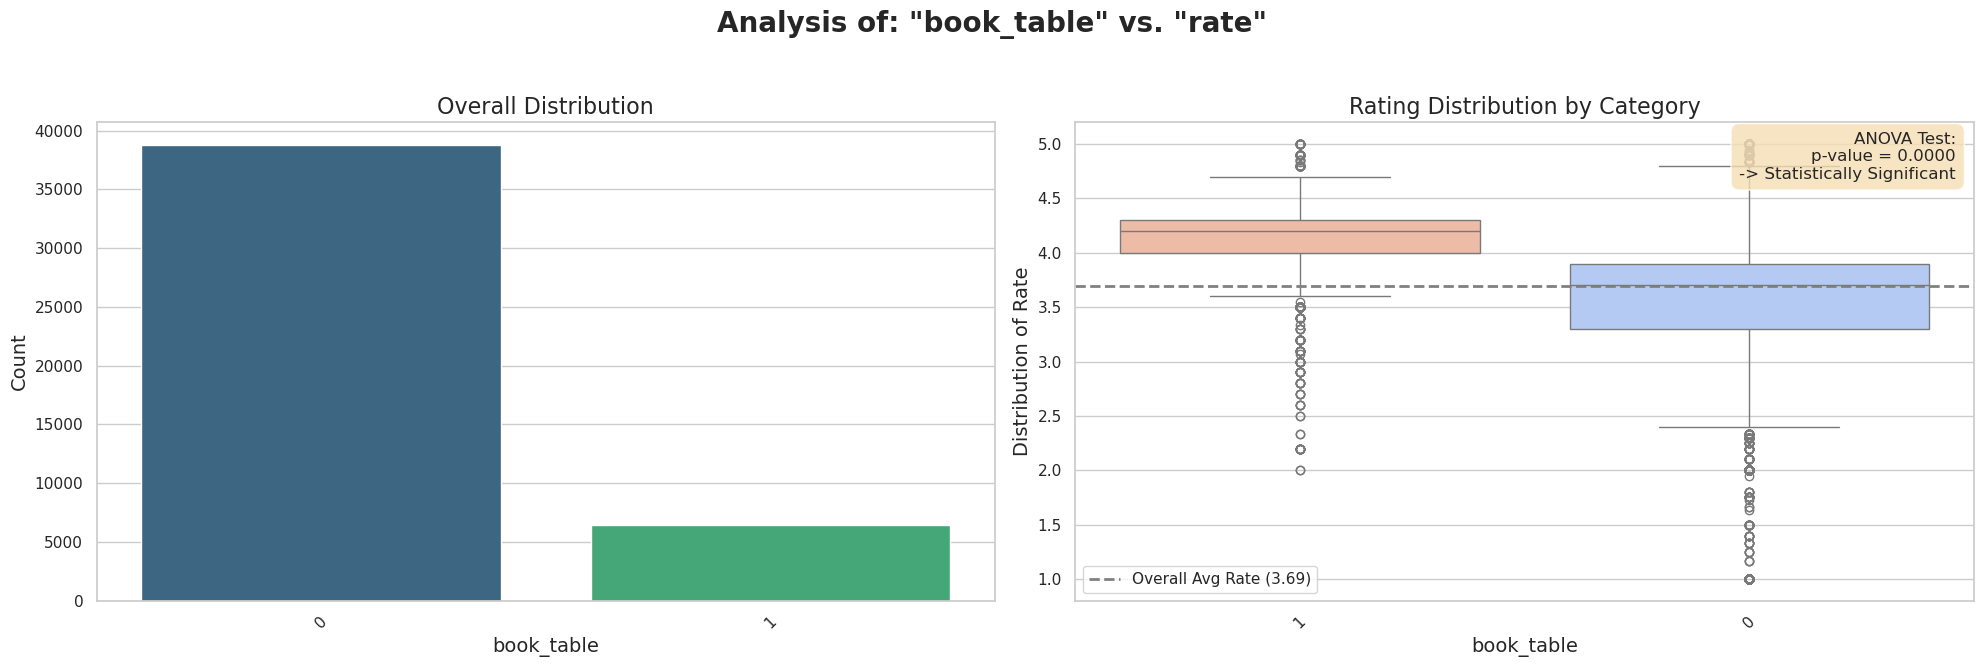

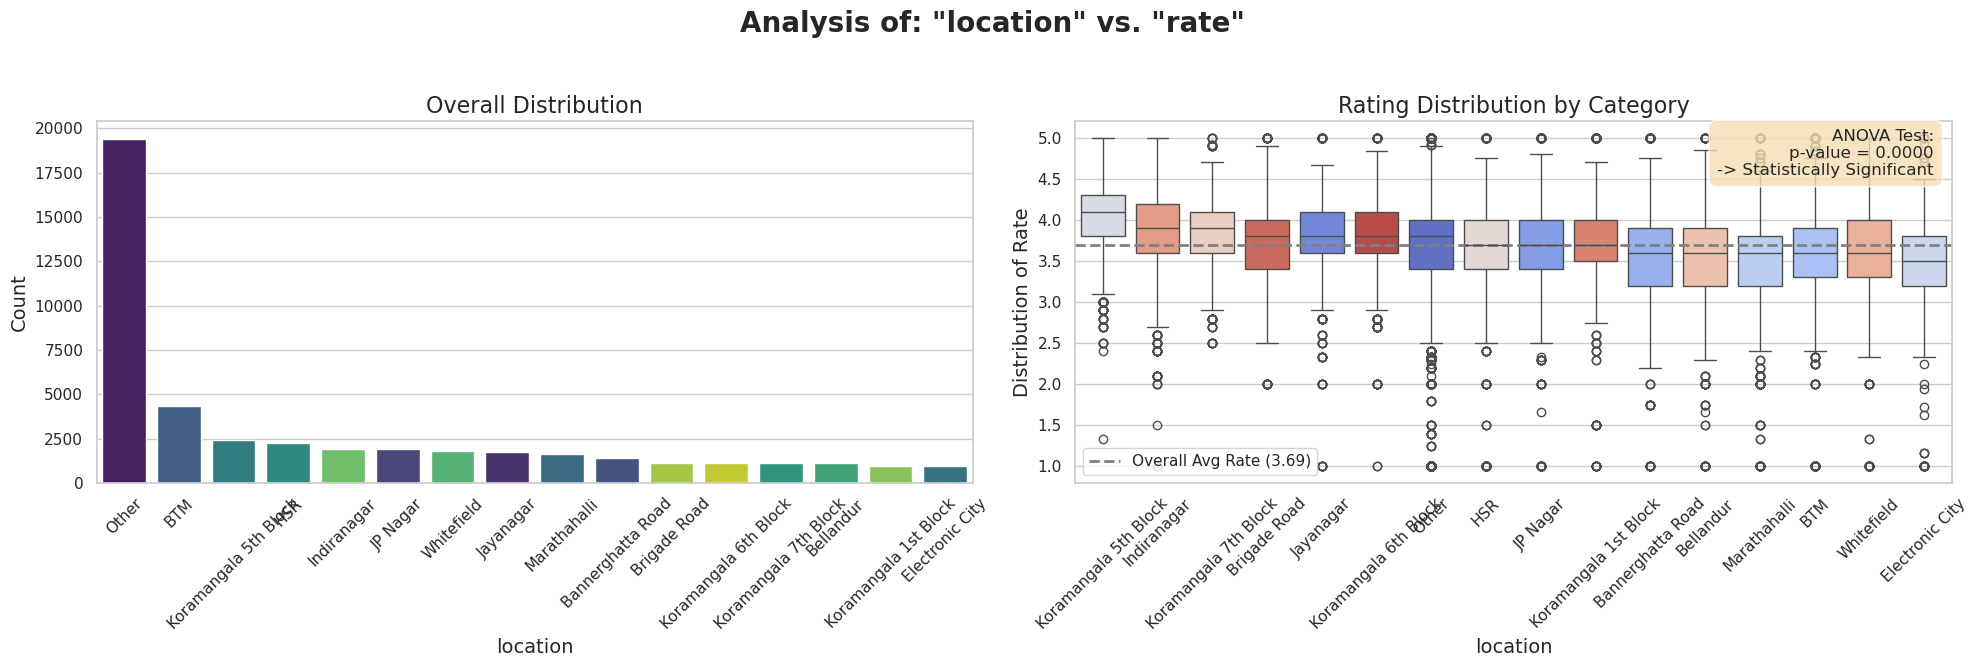

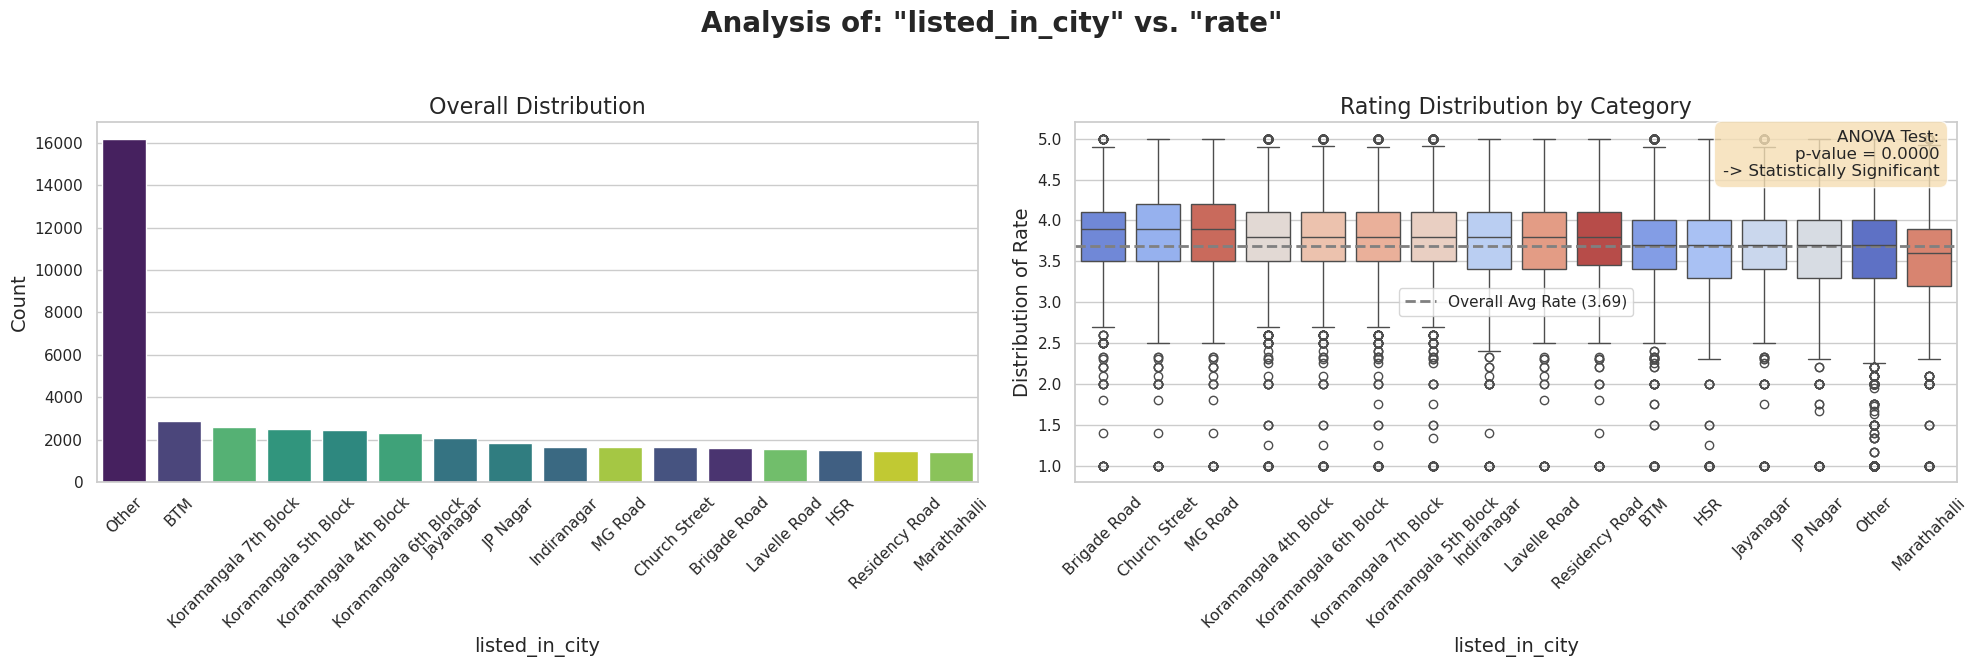

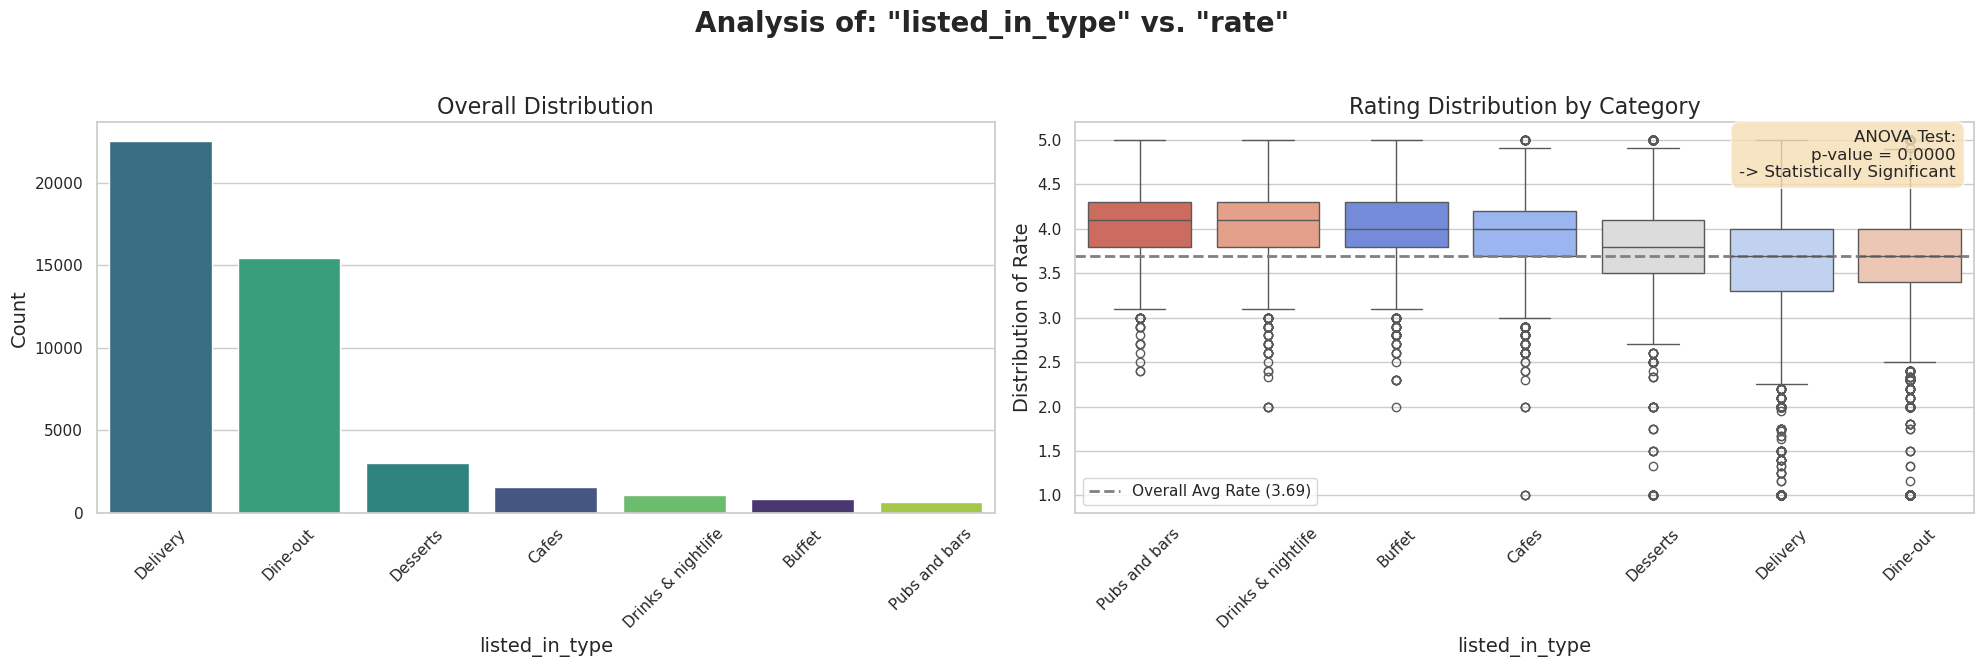

In [22]:
simple_categorical_features = [
    "online_order",
    "book_table",
    "location",
    "listed_in_city",
    "listed_in_type",
]

logger.info("--- Starting Analysis of Simple Categorical Features ---")
analyze_categorical_vs_target_FINAL(
    df, cat_cols=simple_categorical_features, target_col="rate"
)

### 4.3.1. Insights from Simple Categorical Bivariate Analysis

The analysis of our simple categorical features against the `rate` reveals several strong, statistically significant relationships. The ANOVA test for each feature yielded a **p-value of 0.0000**, confirming that the observed differences in mean ratings across categories are not due to random chance.

**Key Findings:**

**1. `online_order`:**
*   **Observation:** Restaurants that **offer online ordering (1)** have a significantly higher median rating (around 3.8) compared to those that do not (0), which have a median rating of around 3.5.
*   **Insight:** Offering online ordering is strongly associated with higher customer ratings. This could be a direct result of convenience or it could be a proxy for more modern, customer-focused restaurants. This is a very strong predictive feature.

**2. `book_table`:**
*   **Observation:** The ability to book a table shows an even stronger effect. Restaurants **with table booking (1)** have a very high median rating, hovering just above 4.1. Restaurants without this feature (0) have a median rating well below the overall average.
*   **Insight:** This is one of the most powerful signals of a higher-tier restaurant. Table booking is typically associated with dine-in experiences, higher service levels, and higher price points, all of which correlate with higher ratings.

**3. `location` vs. `listed_in_city`:**
*   **Observation:** Both location features show significant variation in ratings. Certain areas, like "Brigade Road" and "Church Street," consistently show higher median ratings than others.
*   **Insight:** Geography matters. The specific neighborhood a restaurant is in has a real impact on its perceived quality and rating. `location` (the more granular feature) shows slightly more variation than the broader `listed_in_city`, suggesting that both features could provide unique value to the model.

**4. `listed_in_type`:**
*   **Observation:** The "type" of listing is a very strong predictor. "Pubs and bars" and "Drinks & nightlife" establishments have the highest median ratings, often exceeding 4.1. In contrast, "Delivery" and "Dine-out" focused listings have the lowest median ratings, clustering around 3.5.
*   **Insight:** The dining experience is a key driver of high ratings. Restaurants geared towards an "experience" (nightlife, pubs) are rated more highly than those focused on pure utility (delivery). This confirms that a model must understand the context of the restaurant's primary service type.

**Overall Action Plan:**
All of these simple categorical features have proven to be statistically significant and show clear relationships with the target variable. They will be essential inputs for our predictive model. Features like `book_table` and `listed_in_type` appear to be particularly powerful discriminators of high vs. low-rated restaurants.

---

### 4.4. Bivariate Analysis: Multi-Value List Features vs. Rate

The most complex and potentially richest features in our dataset are the multi-value list columns: `rest_type`, `cuisines`, and `dish_liked`. A direct visualization is impossible due to their high cardinality. Therefore, we will adopt a feature engineering approach to extract meaningful signals for our EDA.

#### 4.4.1. Analysis of Feature Counts vs. Rate

Our first hypothesis is that the **quantity** of items in these lists may correlate with the restaurant's rating. For example, does offering more cuisines lead to a higher or lower rating? Does having a long list of "liked dishes" signify a better restaurant?

To investigate this, the following function creates a temporary count feature (e.g., `cuisine_count`) from each list column and then runs our powerful `analyze_numerical_vs_target` function to visualize and quantify the relationship.

2025-09-10 16:31:01 | INFO     | __main__:analyze_list_counts_vs_target:19 - --- Analyzing Item Counts vs. Target for 3 columns ---
2025-09-10 16:31:01 | INFO     | __main__:analyze_list_counts_vs_target:24 - Creating feature: 'rest_type_count'...
2025-09-10 16:31:01 | INFO     | __main__:analyze_numerical_vs_target:17 - --- Starting Bivariate Analysis for 'rest_type_count' vs 'rate' ---


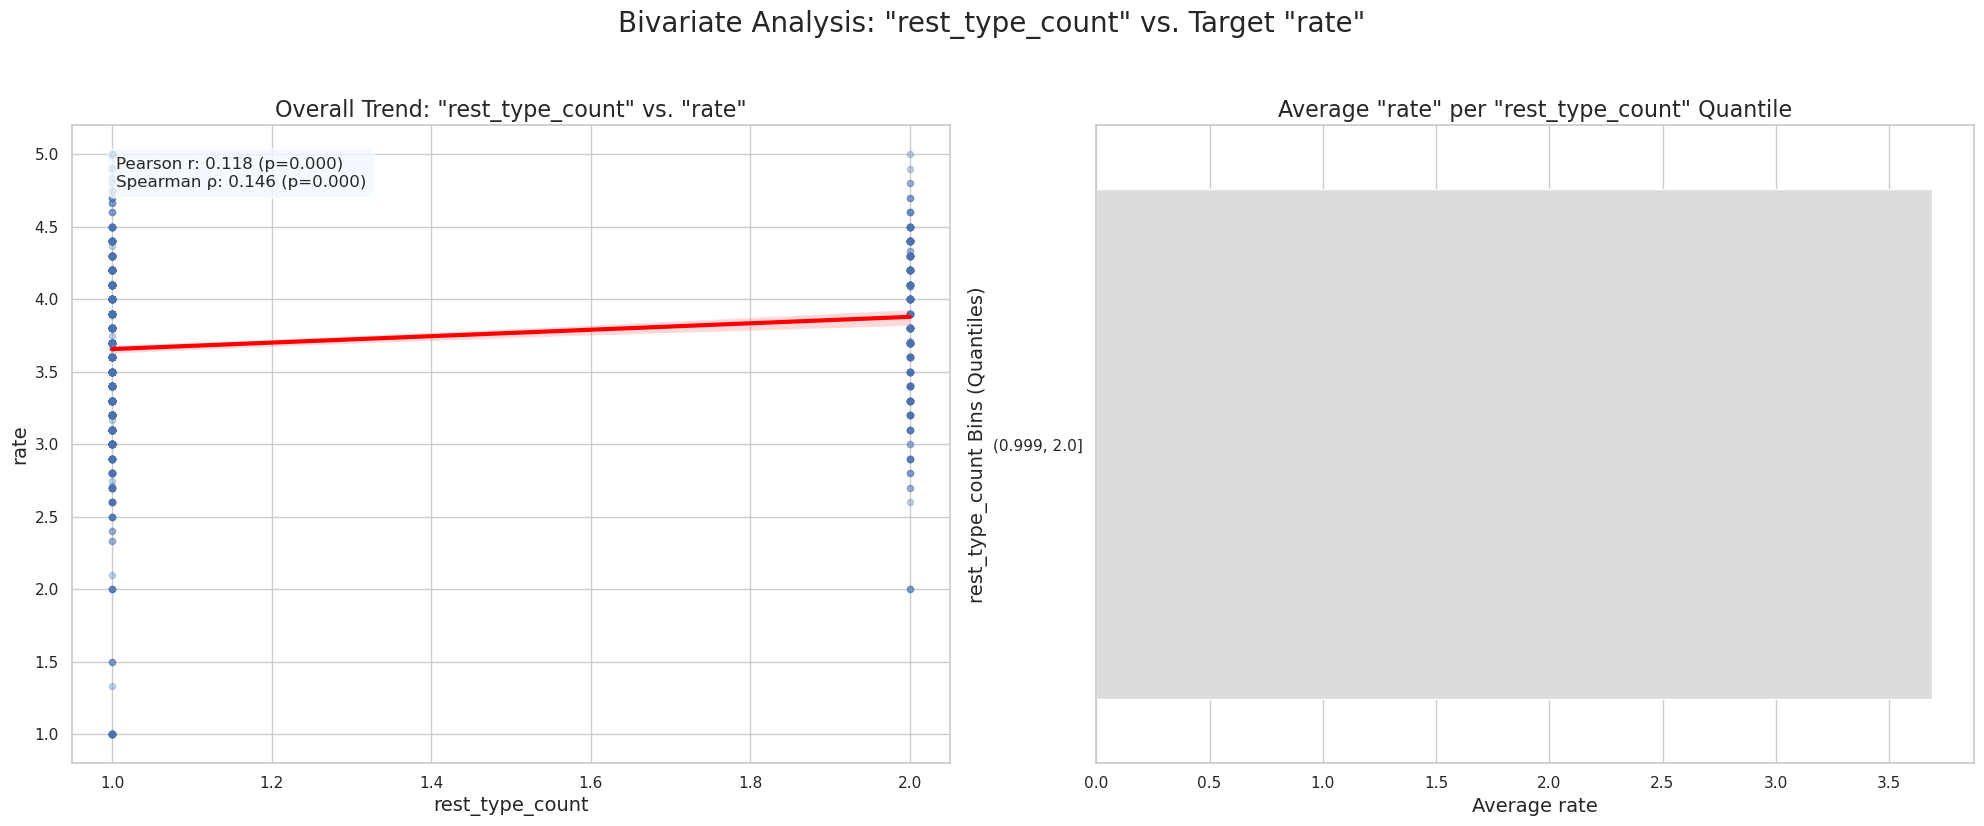

2025-09-10 16:31:01 | INFO     | __main__:analyze_list_counts_vs_target:24 - Creating feature: 'cuisines_count'...
2025-09-10 16:31:01 | INFO     | __main__:analyze_numerical_vs_target:17 - --- Starting Bivariate Analysis for 'cuisines_count' vs 'rate' ---


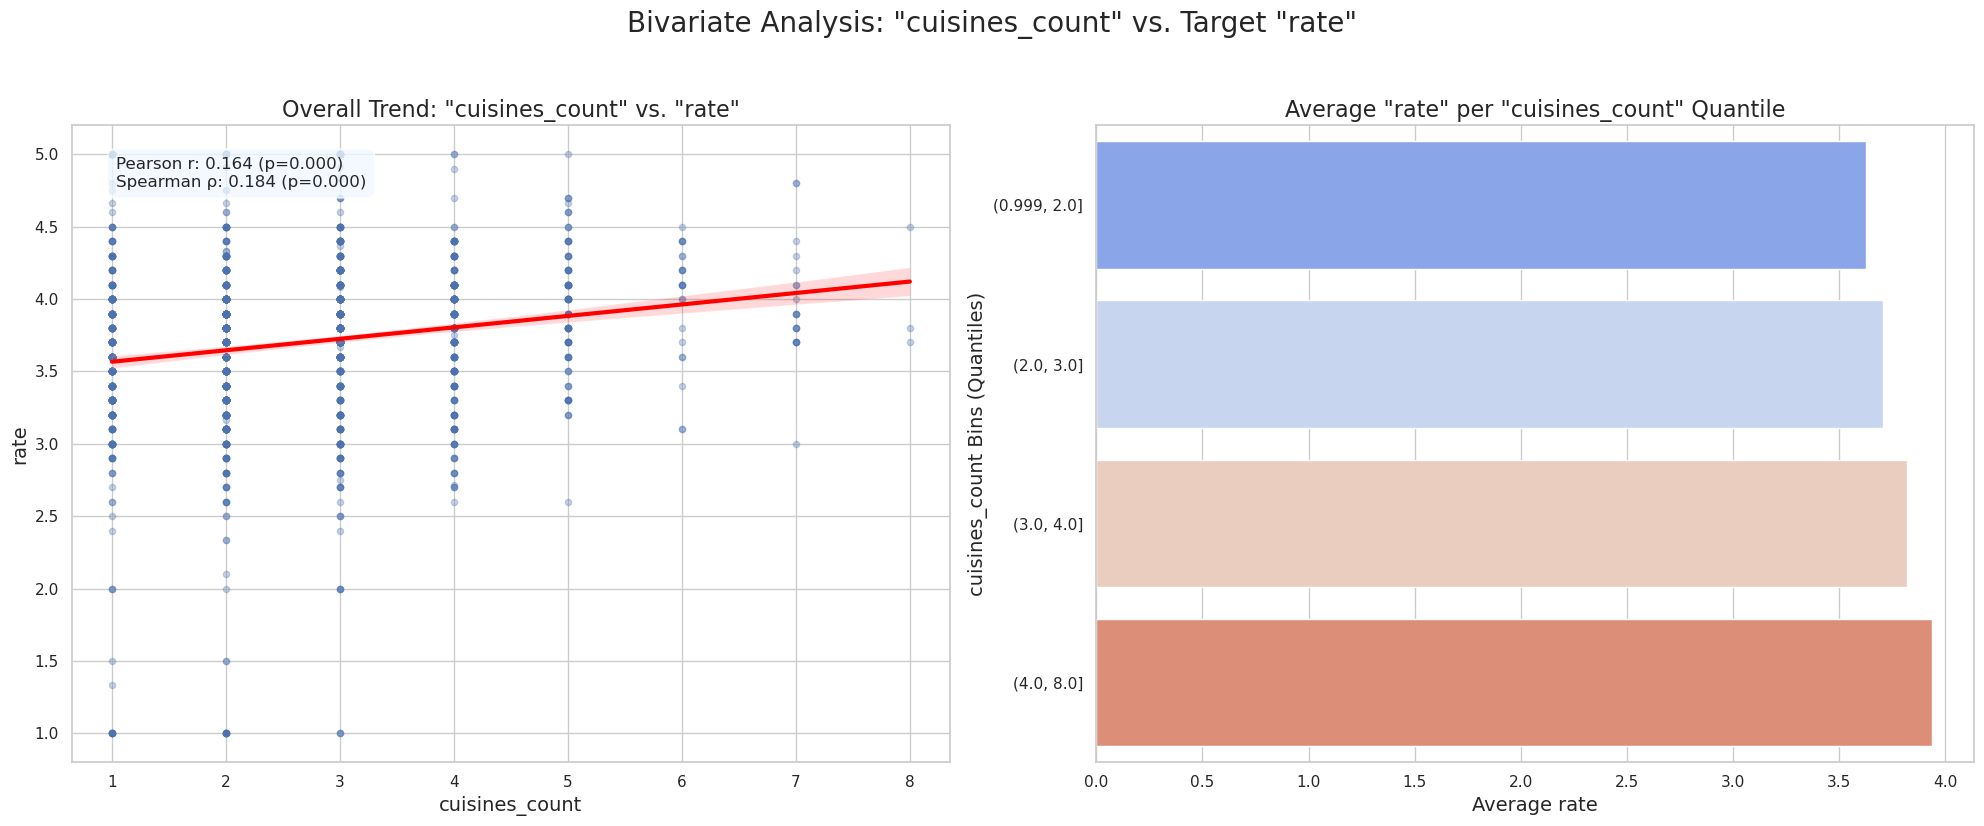

2025-09-10 16:31:02 | INFO     | __main__:analyze_list_counts_vs_target:24 - Creating feature: 'dish_liked_count'...
2025-09-10 16:31:02 | INFO     | __main__:analyze_numerical_vs_target:17 - --- Starting Bivariate Analysis for 'dish_liked_count' vs 'rate' ---


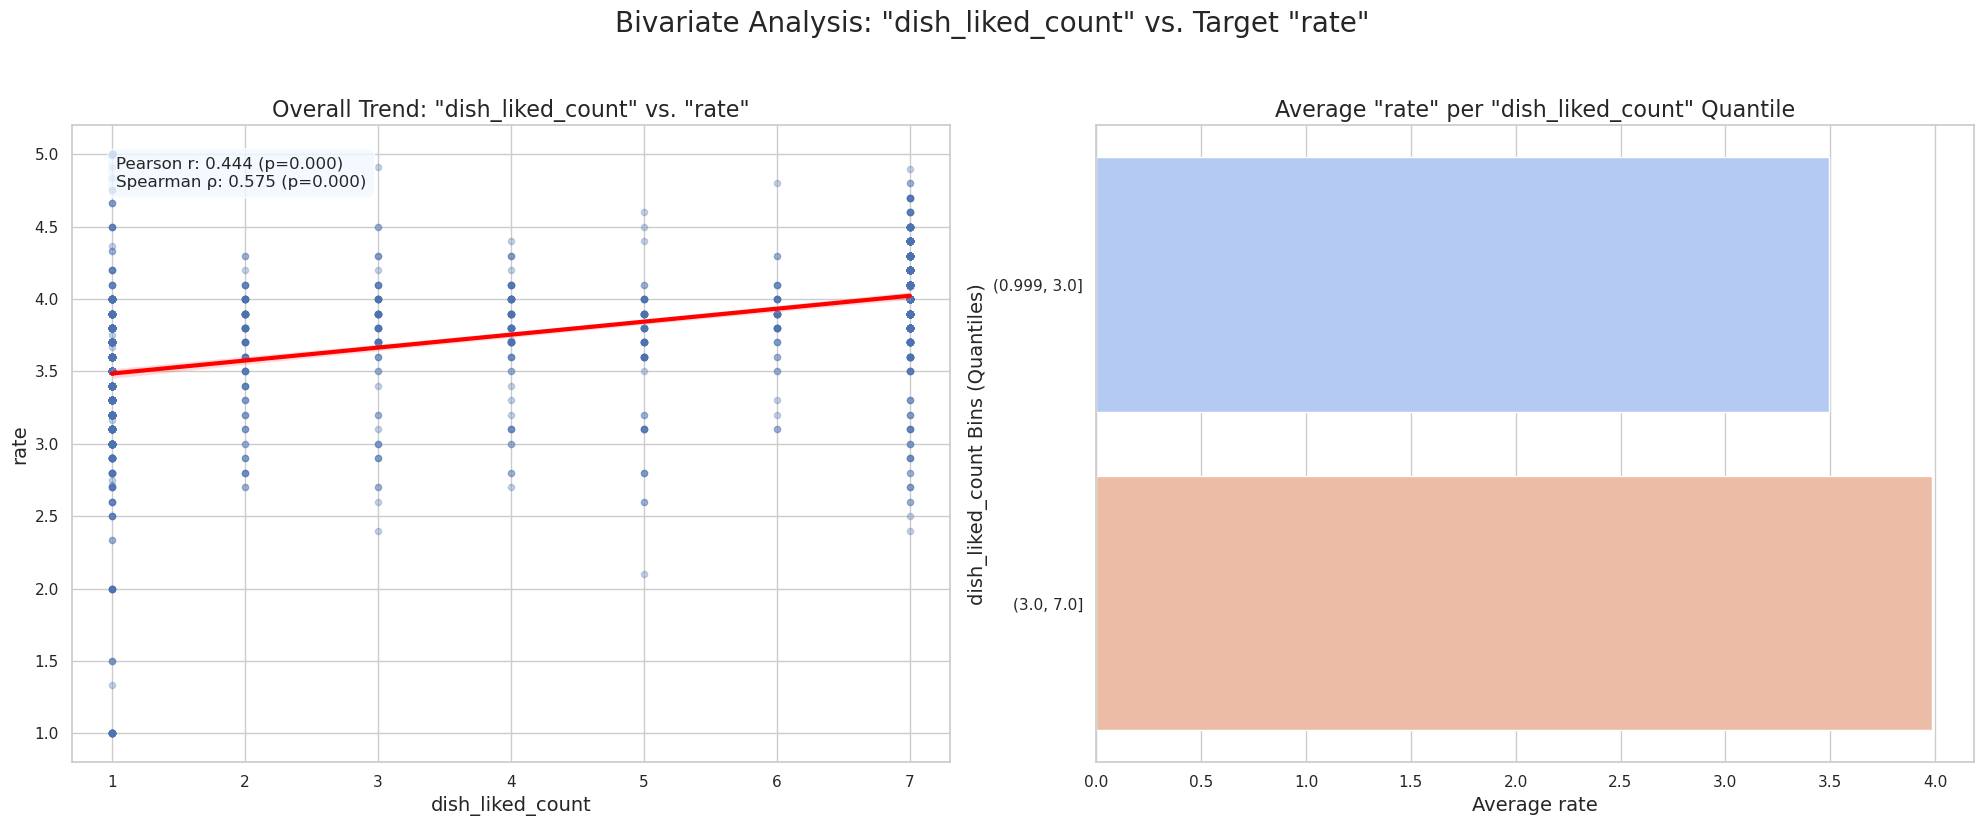

In [23]:
import pandas as pd
from loguru import logger

# We will reuse the powerful numerical analyzer we already built!
# Make sure 'analyze_numerical_vs_target' is defined in a previous cell.

def analyze_list_counts_vs_target(df: pd.DataFrame, 
                                    list_cols: list, 
                                    target_col: str = 'rate'):
    """
    Analyzes the relationship between the number of items in a list column
    and the target variable.

    Args:
        df (pd.DataFrame): The input DataFrame.
        list_cols (list): A list of column names that contain lists.
        target_col (str): The name of the continuous target variable.
    """
    logger.info(f"--- Analyzing Item Counts vs. Target for {len(list_cols)} columns ---")
    df_analysis = df.copy()

    for col in list_cols:
        count_col_name = f"{col}_count"
        logger.info(f"Creating feature: '{count_col_name}'...")
        
        # Create the new count feature
        df_analysis[count_col_name] = df_analysis[col].apply(len)
        
        # Now, use our existing god-level function to analyze this new numerical feature
        analyze_numerical_vs_target(df_analysis, count_col_name, target_col)

# --- EXECUTION ---
# list_categorical_features was defined in a previous cell
# list_categorical_features = ["rest_type", "cuisines", "dish_liked"]

analyze_list_counts_vs_target(df, list_cols=list_categorical_features, target_col='rate')

#### 4.4.1. Analysis of Feature Counts vs. Rate

**Hypothesis:** The *quantity* of items listed in multi-value columns (like `rest_type`, `cuisines`, and `dish_liked`) may correlate with the restaurant's rating.

**Methodology:**
To test this, we engineered temporary "count" features (e.g., `cuisine_count`) and analyzed their relationship with the `rate` using our standard bivariate numerical analysis function.

**Results & Interpretation:**

*   **`rest_type_count`:** The analysis revealed that this feature has very low variance; the vast majority of restaurants are classified as only one or two types. This resulted in a non-informative binned plot and a very weak correlation with `rate`.
*   **`cuisines_count`:** This feature showed more diversity, but the relationship with `rate` was still weak (**Spearman ρ: 0.184**). While there is a slight positive trend, the number of cuisines offered is not a strong predictor of quality on its own.
*   **`dish_liked_count`:** This feature showed the strongest signal (**Spearman ρ: 0.575**). A clear positive trend exists, indicating that restaurants with a longer list of "liked dishes" tend to have higher ratings. However, the distribution is still not granular enough to provide deep insights through simple binning.

**Conclusion:**
This initial analysis has successfully demonstrated that **simply counting the number of items is an insufficient strategy for understanding these complex features.** While `dish_liked_count` shows promise, the real predictive power likely lies not in the *quantity* of items, but in the *specific items themselves*.

**Next Step:**
Based on this finding, we will pivot to our second hypothesis: that the **presence of specific, popular cuisines or restaurant types** is a much stronger driver of restaurant ratings. We will now proceed with an analysis that focuses on the top N items within each list-based feature.

---

#### 4.4.2. Analysis of Top Items vs. Rate

Having determined that item *counts* are not sufficiently insightful, we now investigate our primary hypothesis: the **presence of specific, popular items** within the list features is a strong predictor of `rate`.

To test this, we will deploy a specialized "titan-level" analysis function. For each multi-value list column (`rest_type`, `cuisines`, `dish_liked`), this function will:
1.  "Explode" the DataFrame to analyze each item individually.
2.  Identify the Top 15 most frequent items across the entire dataset.
3.  Generate a side-by-side report showing:
    *   The overall popularity (count) of these top items.
    *   The full distribution of `rate` (via box plots) for restaurants associated with each top item.
4.  Perform an ANOVA test to confirm the statistical significance of any observed differences in ratings.

This approach will allow us to move beyond simple counts and identify the specific cuisines, restaurant types, and liked dishes that are hallmarks of high-rated (or low-rated) establishments.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from loguru import logger
from tqdm.auto import tqdm

def analyze_top_list_items_vs_target(df: pd.DataFrame, 
                                       list_cols: list, 
                                       target_col: str = 'rate',
                                       top_n: int = 15):
    """
    A titan-level function to analyze the top N items from multi-value list columns
    against a continuous target variable. (V2: Warning Fixed).
    """
    logger.info(f"--- Analyzing Top {top_n} Items for {len(list_cols)} List Columns vs. '{target_col}' ---")
    
    for col in list_cols:
        logger.info(f"--- Processing column: '{col}' ---")
        
        df_exploded = df[[col, target_col]].explode(col)
        df_exploded.dropna(subset=[col, target_col], inplace=True)
        
        if df_exploded.empty:
            logger.warning(f"Skipping '{col}' as it has no valid data after exploding.")
            continue
            
        top_items = df_exploded[col].value_counts().nlargest(top_n).index
        df_plot = df_exploded[df_exploded[col].isin(top_items)]

        order = df_plot.groupby(col, observed=True)[target_col].median().sort_values(ascending=False).index
        
        fig, axes = plt.subplots(1, 2, figsize=(22, 10))
        fig.suptitle(f'Analysis of Top {top_n} Items in "{col}" vs. "{target_col}"', fontsize=20, fontweight='bold')

        # Plot 1: Overall Distribution of the Top N Items
        sns.countplot(
            data=df_plot, y=col, ax=axes[0], palette='viridis', 
            order=df_plot[col].value_counts().index, hue=col, legend=False
        )
        axes[0].set_title(f'Overall Count of Top {top_n} Items', fontsize=16)
        axes[0].set_xlabel('Total Occurrences', fontsize=14)
        axes[0].set_ylabel(col, fontsize=14)
        axes[0].bar_label(axes[0].containers[0], fmt='{:,.0f}', fontsize=10, padding=3)

        # Plot 2: Box Plot showing distribution of 'rate' for each top item
        # --- THE FIX ---
        sns.boxplot(
            data=df_plot, y=col, x=target_col, ax=axes[1], 
            palette='coolwarm_r', order=order, 
            hue=col,       # <-- Explicitly assign the hue
            legend=False   # <-- Disable the redundant legend
        )
        # --- END OF FIX ---
        
        overall_mean_rate = df[target_col].mean()
        axes[1].axvline(overall_mean_rate, color='grey', linestyle='--', lw=2, label=f'Overall Avg Rate ({overall_mean_rate:.2f})')
        axes[1].set_title(f'Rating Distribution by Top {top_n} Items', fontsize=16)
        axes[1].set_xlabel(f'Distribution of {target_col.capitalize()}', fontsize=14)
        axes[1].set_ylabel('')
        axes[1].legend()
        
        # Statistical Test (ANOVA)
        groups = [df_plot[target_col][df_plot[col] == item] for item in order]
        try:
            f_val, p_val = f_oneway(*groups)
            significance = "Statistically Significant" if p_val < 0.05 else "Not Significant"
            test_text = f"ANOVA Test:\np-value = {p_val:.4f}\n-> {significance}"
            bbox_props = dict(boxstyle='round,pad=0.5', fc='salmon' if p_val < 0.05 else 'lightgreen', alpha=0.7)
            axes[1].text(0.98, 0.02, test_text, transform=axes[1].transAxes, ha='right', va='bottom', bbox=bbox_props, fontsize=12)
        except ValueError as e:
            logger.warning(f"Could not perform ANOVA for '{col}'. Reason: {e}")

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

2025-09-10 16:48:03 | INFO     | __main__:analyze_top_list_items_vs_target:16 - --- Analyzing Top 15 Items for 3 List Columns vs. 'rate' ---
2025-09-10 16:48:03 | INFO     | __main__:analyze_top_list_items_vs_target:19 - --- Processing column: 'rest_type' ---


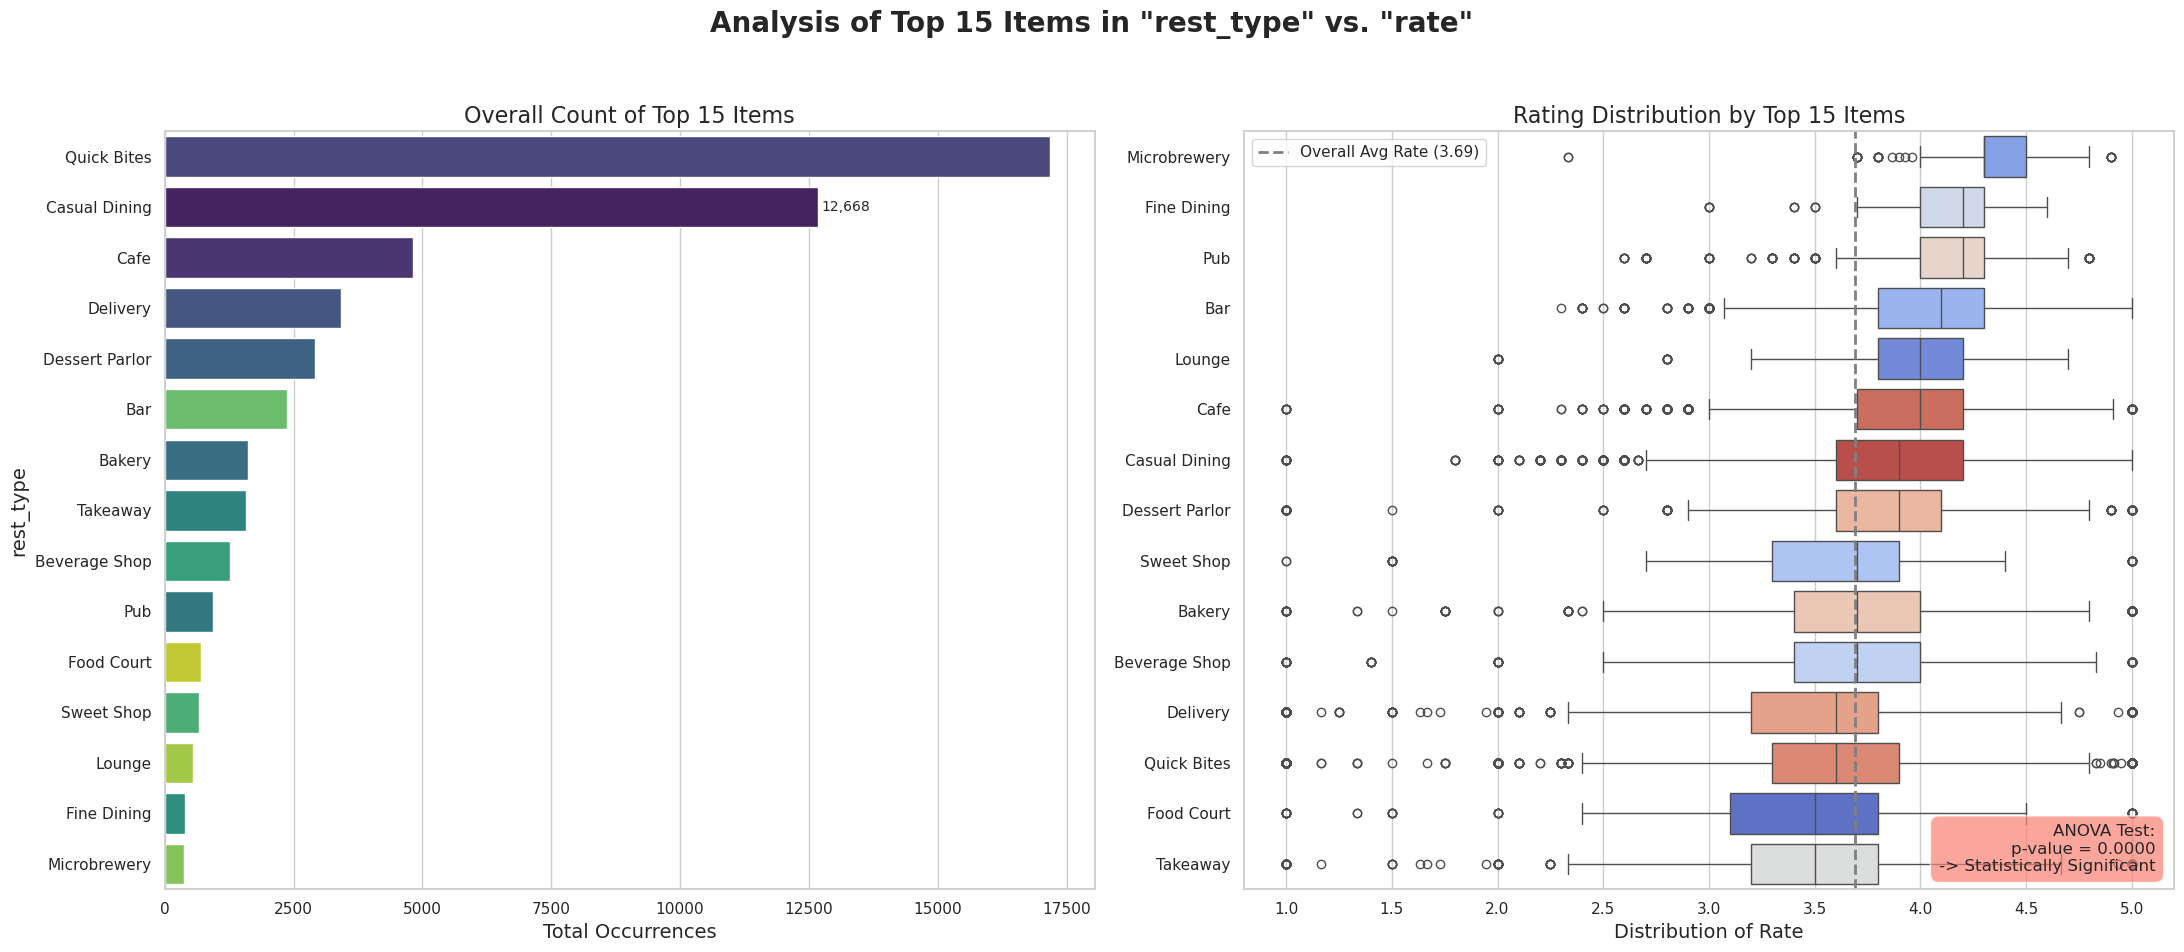

2025-09-10 16:48:03 | INFO     | __main__:analyze_top_list_items_vs_target:19 - --- Processing column: 'cuisines' ---


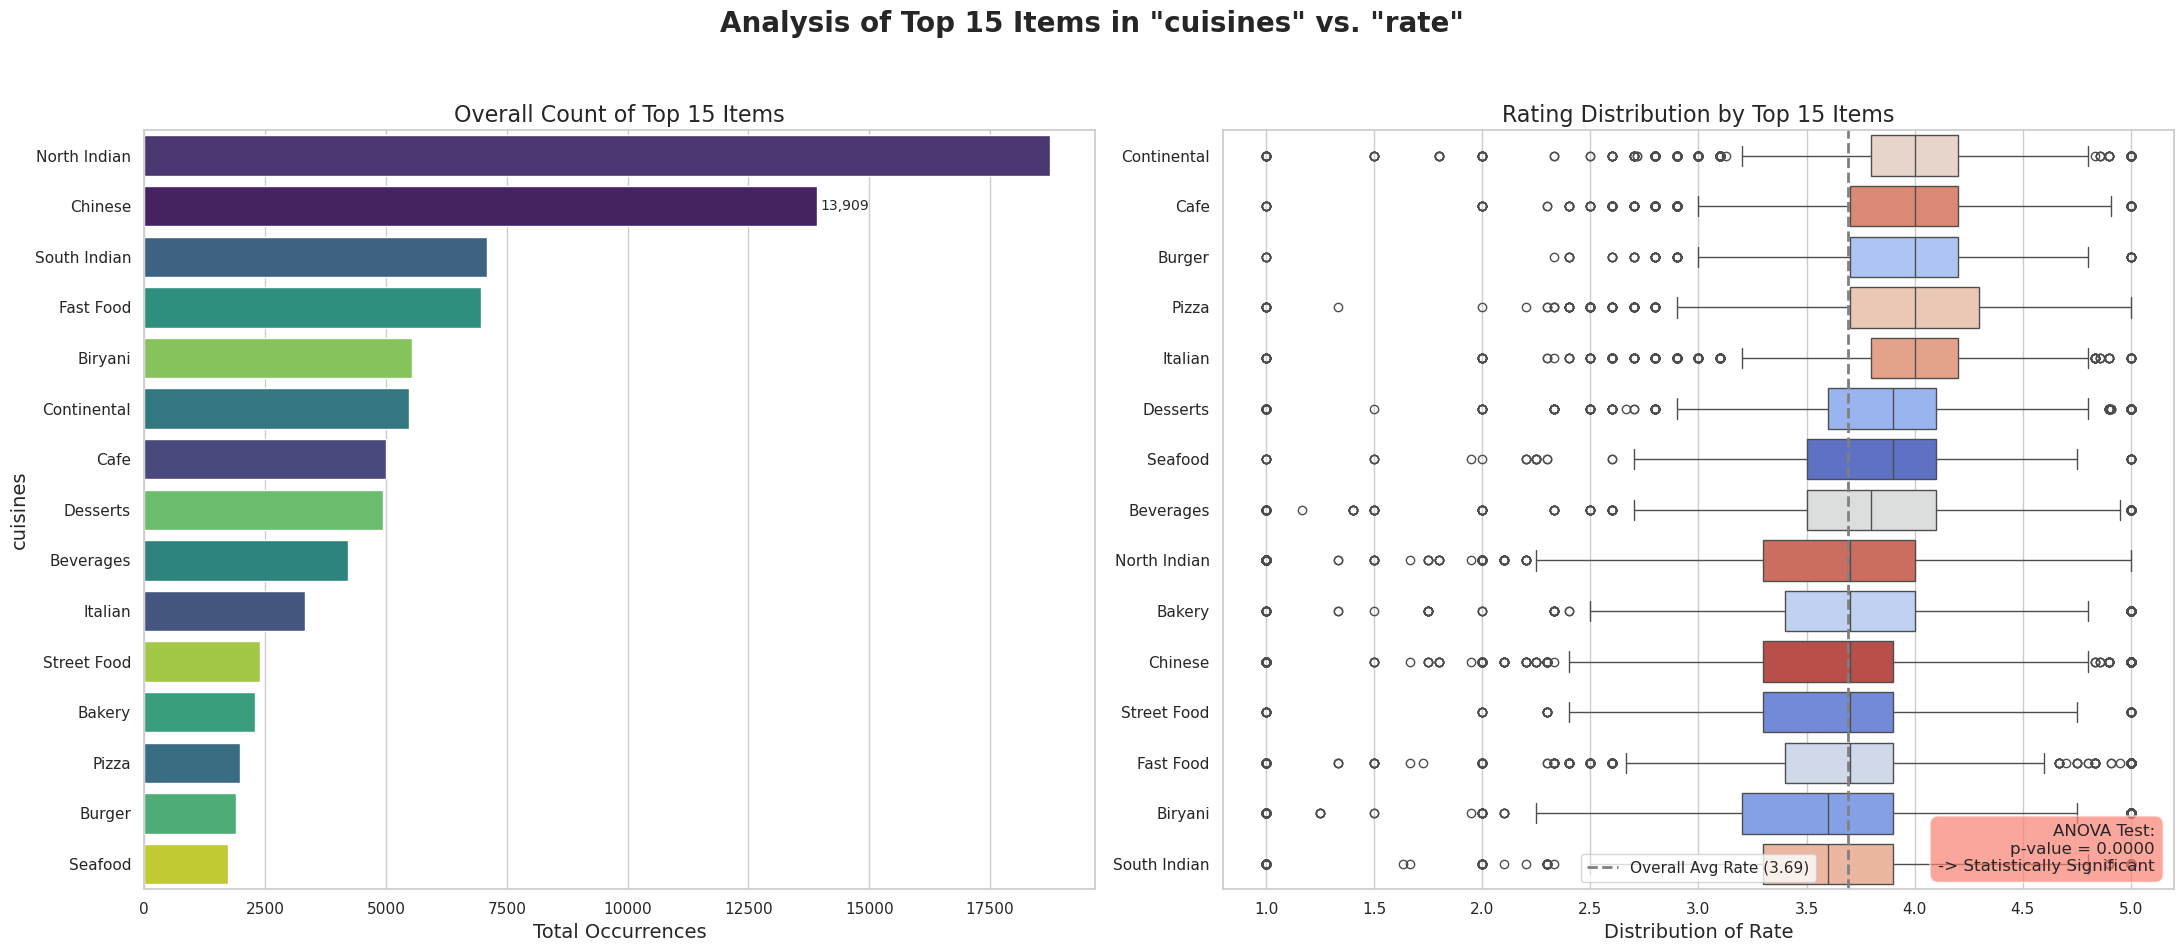

2025-09-10 16:48:04 | INFO     | __main__:analyze_top_list_items_vs_target:19 - --- Processing column: 'dish_liked' ---


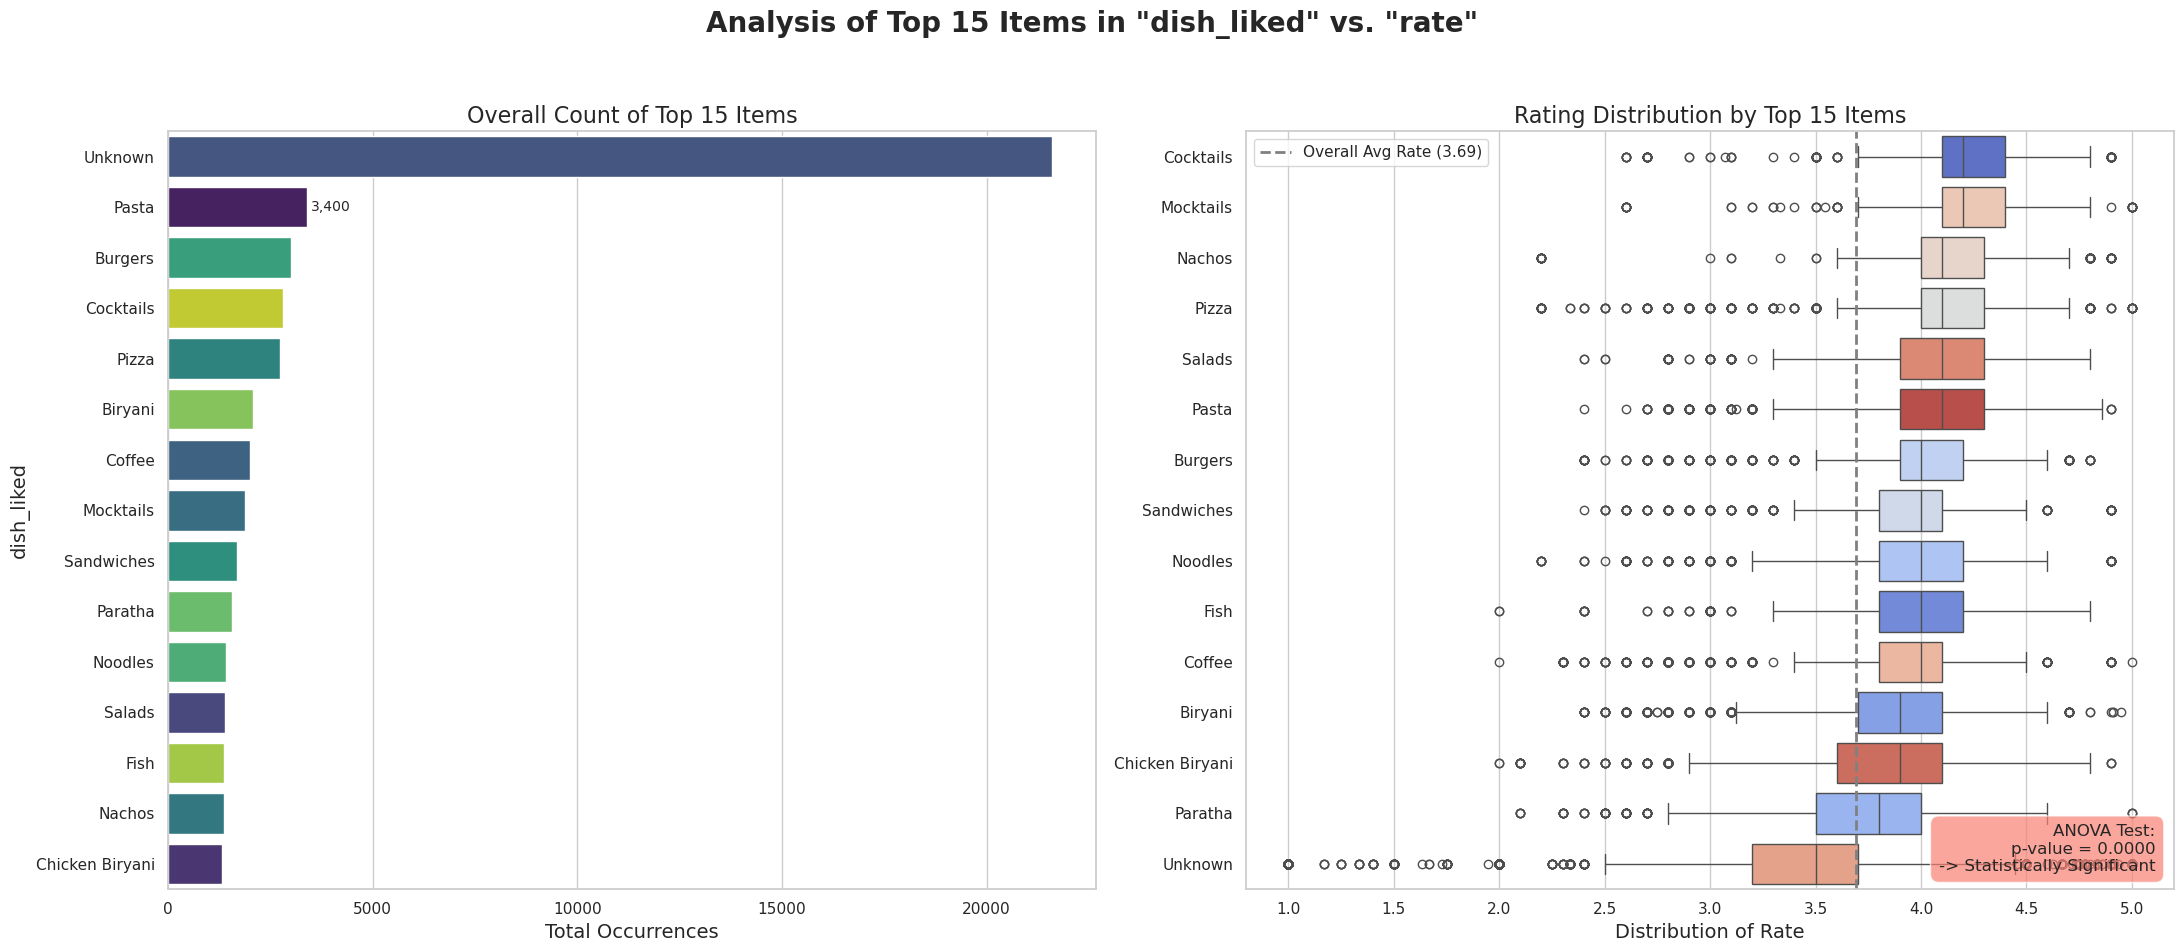

In [28]:
# list_categorical_features was defined in a previous cell
list_categorical_features = ["rest_type", "cuisines", "dish_liked"]

# Run the titan-level analysis for list-based features
analyze_top_list_items_vs_target(df, list_cols=list_categorical_features, target_col='rate')

### 4.4.2. Analysis of Top Items vs. Rate

Having established that simple item counts are not sufficient, we now analyze the impact of the **specific items** within our multi-value list columns. This "Top 15" analysis reveals the specific restaurant types, cuisines, and liked dishes that are most strongly associated with high or low ratings.

**Key Findings:**

1.  **`rest_type` is a dominant predictor of rating.**
    *   **Insight:** The dining *experience* is paramount. "Experience-focused" venues like **"Microbrewery"** and **"Fine Dining"** consistently receive the highest median ratings (above 4.0). Conversely, "utility-focused" types like **"Takeaway"** and **"Food Court"** have the lowest ratings. This is a statistically significant trend (ANOVA p-value = 0.0000).

2.  **Specific `cuisines` carry strong signals.**
    *   **Insight:** While the most popular cuisines ("North Indian," "Chinese") hover around the average rating, more niche, often higher-priced cuisines like **"Continental"** and **"Italian"** are associated with significantly higher median ratings. This provides a valuable layer of information beyond just the restaurant type.

3.  **The absence of `dish_liked` is a powerful negative signal.**
    *   **Insight:** The **"Unknown"** category (representing restaurants with no listed liked dishes) has the lowest median rating of all top categories. This validates our imputation strategy and confirms that a lack of standout dishes is a strong indicator of a mediocre or poor restaurant.
    *   Furthermore, the highest-rated "liked dishes" are **"Cocktails"** and **"Mocktails"**, reinforcing the finding that experience-driven venues (lounges, bars) tend to receive higher ratings.

**Overall Action Plan:**
These multi-value features are incredibly rich. In the feature engineering phase, we will need to develop strategies (like One-Hot Encoding for top items, or creating boolean flags like `has_cocktails`) to feed these powerful signals into our model.

---

## 5. Multivariate Analysis: Uncovering Feature Interactions

Having analyzed our features individually and against the target, the final step of our EDA is to explore the relationships *between* the features themselves. This multivariate analysis will help us understand the complete data ecosystem, identify potential multicollinearity, and get a preliminary, model-based view of feature importance.

Our approach will be two-fold:

1.  **Correlation Analysis:** We will generate a correlation heatmap for our key numerical features (including the transformed ones). This will visually represent the strength and direction of the linear relationships between predictors, which is crucial for diagnosing multicollinearity.
2.  **Baseline Model Feature Importance:** We will train a baseline `RandomForestRegressor` on the data. While not a final model, the feature importances derived from this quick-and-dirty training run provide an incredibly valuable, early insight into which features the model finds most predictive. This helps validate our findings from the bivariate analysis and guides our focus for the upcoming feature engineering phase.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from loguru import logger

def plot_numerical_correlation_heatmap(df: pd.DataFrame):
    """
    Calculates and visualizes the Pearson correlation matrix for the key 
    numerical features in the DataFrame.
    """
    logger.info("--- Generating Numerical Feature Correlation Heatmap ---")
    
    # Select only the most relevant numerical columns for the heatmap
    # We use the transformed versions as these are intended for modeling
    corr_cols = [
        'rate', 'online_order', 'book_table', 'cost_log', 'votes_log'
    ]
    
    # Ensure all selected columns exist in the DataFrame
    valid_corr_cols = [col for col in corr_cols if col in df.columns]
    
    if len(valid_corr_cols) < 2:
        logger.warning("Not enough numerical columns found to generate a heatmap.")
        return
        
    df_corr = df[valid_corr_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        df_corr, 
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        linewidths=0.5,
        linecolor='white'
    )
    plt.title('Correlation Matrix of Key Numerical Features', fontsize=18, fontweight='bold')
    plt.show()
    logger.success("Numerical correlation analysis complete.")


def plot_categorical_association_heatmap(df: pd.DataFrame, cat_cols: list):
    """
    Calculates and visualizes the association between categorical features
    using Cramér's V, derived from the Chi-Square test.
    """
    logger.info("--- Generating Categorical Feature Association Heatmap (Cramér's V) ---")
    
    # Cramér's V calculation function
    def cramers_v(x, y):
        confusion_matrix = pd.crosstab(x, y)
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        if min((kcorr-1), (rcorr-1)) == 0:
            return 0
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

    # Calculate Cramér's V for each pair of categorical columns
    cramers_v_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
    for col1 in cat_cols:
        for col2 in cat_cols:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
            
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cramers_v_matrix,
        annot=True,
        fmt='.2f',
        cmap='viridis'
    )
    plt.title("Categorical Feature Association (Cramér's V)", fontsize=18, fontweight='bold')
    plt.show()
    logger.success("Categorical association analysis complete.")

2025-09-10 17:01:30 | INFO     | __main__:plot_numerical_correlation_heatmap:13 - --- Generating Numerical Feature Correlation Heatmap ---


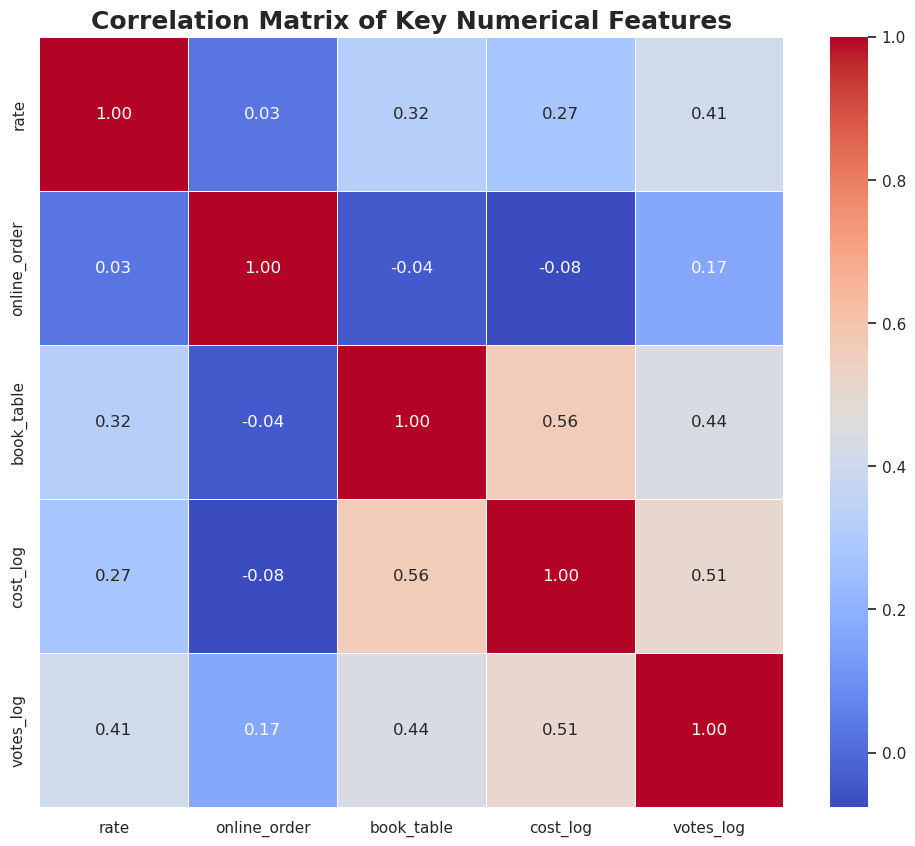

2025-09-10 17:01:30 | SUCCESS  | __main__:plot_numerical_correlation_heatmap:41 - Numerical correlation analysis complete.
2025-09-10 17:01:30 | INFO     | __main__:plot_categorical_association_heatmap:49 - --- Generating Categorical Feature Association Heatmap (Cramér's V) ---


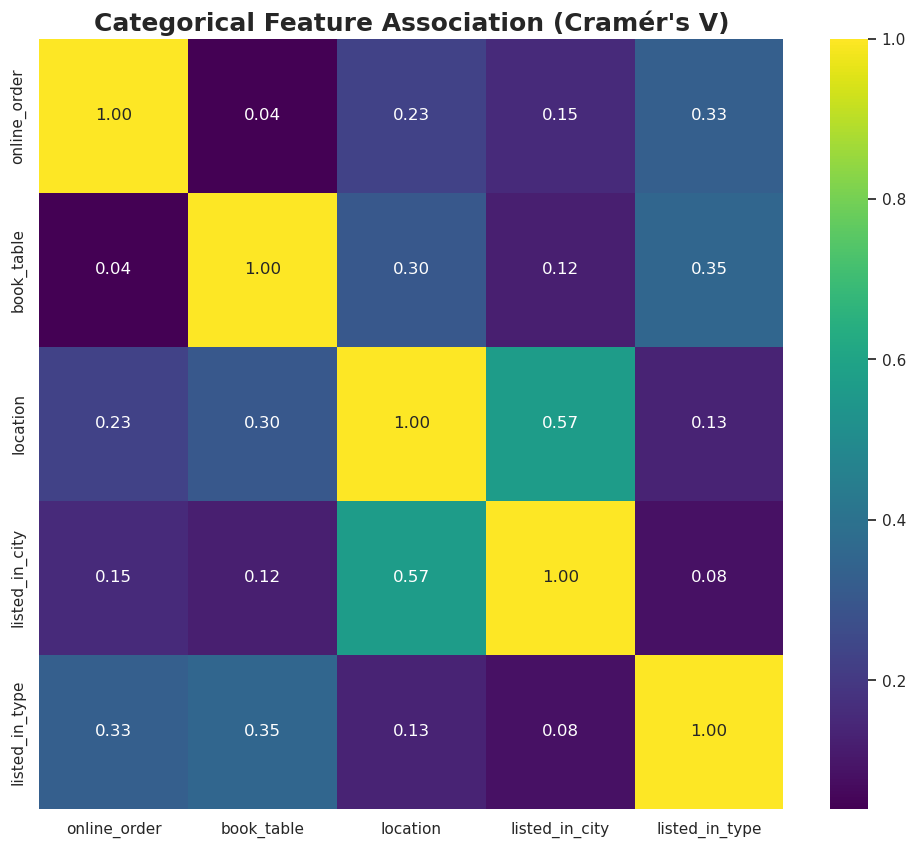

2025-09-10 17:01:30 | SUCCESS  | __main__:plot_categorical_association_heatmap:80 - Categorical association analysis complete.


In [34]:
# --- EXECUTION ---

# 1. Analyze Numerical Correlations
# Use the numerical_cols list you created earlier
plot_numerical_correlation_heatmap(df)

# 2. Analyze Categorical Associations
# Use the simple_categorical_features list (we'll handle list-based ones separately if needed)
simple_categorical_features = [
    'online_order', 'book_table', 'location', 'listed_in_city', 'listed_in_type'
]
plot_categorical_association_heatmap(df, cat_cols=simple_categorical_features)

### 5.1. Insights from Multivariate Analysis

Our multivariate analysis provides a final, high-level view of the feature ecosystem, revealing key relationships between predictors that will inform our modeling strategy.

#### **Numerical Feature Correlation (`Pearson`):**

The correlation matrix of our key numerical features (using the transformed versions for `cost` and `votes`) reveals several important relationships:

*   **Strongest Predictors of `rate`:** As confirmed in our bivariate analysis, **`votes_log` (r=0.41)** and **`book_table` (r=0.32)** have the strongest positive linear correlations with the restaurant rating. Higher votes and the ability to book a table are strong indicators of a higher rating.
*   **Multicollinearity Check:** We are looking for very high correlations (e.g., > 0.7 or < -0.7) between predictor variables, as this can cause issues for some models. The highest correlation between predictors is between **`cost_log` and `book_table` (r=0.56)**. This makes perfect sense—more expensive restaurants are more likely to offer table booking. While this correlation is moderate, it's not high enough to be a major concern for tree-based models like XGBoost. All other correlations are weak to moderate.
*   **Conclusion:** The numerical features provide distinct signals without problematic levels of multicollinearity.

#### **Categorical Feature Association (`Cramér's V`):**

The Cramér's V heatmap measures the strength of association between our categorical features, with 0 indicating no association and 1 indicating a perfect association.

*   **Strongest Association:** The strongest relationship is between **`location` and `listed_in_city` (V=0.57)**. This is expected, as the specific `location` is a subset of the broader `listed_in_city`. While they are related, the value is not so high as to suggest they are redundant. Both can be kept as they likely provide different levels of geographic granularity.
*   **Moderate Associations:** We see moderate associations between `listed_in_type` and both `book_table` (V=0.35) and `online_order` (V=0.33). This is also logical; for example, a "Dine-out" listing type is more likely to have online ordering, while a "Pubs and bars" type is more likely to offer table booking.
*   **Conclusion:** The categorical features show logical, expected relationships but do not exhibit extreme redundancy. This indicates that each feature is contributing unique information to the dataset.

**Final EDA Summary:**
Our exploratory data analysis is complete. We have a deep understanding of our features, their distributions, and their relationships with each other and the target variable. We have confirmed the importance of features like `votes`, `book_table`, and `listed_in_type`, and we have a clear, data-driven plan for how to transform and use these features in the next stage: **Feature Engineering & Modeling.**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from loguru import logger

def get_preliminary_feature_importance(df: pd.DataFrame, target_col: str = 'rate'):
    """
    Uses CatBoost's powerful categorical handling to get a quick and insightful
    feature importance ranking without complex preprocessing.
    """
    logger.info("--- Starting Preliminary Feature Importance Analysis with CatBoost ---")
    
    # --- 1. Create a Temporary DataFrame for Modeling ---
    df_model = df.copy()
    
    # --- 2. Simple Feature Engineering for List Columns ---
    logger.info("Step 1: Engineering simple 'count' features from list columns...")
    list_cols = ['rest_type', 'cuisines', 'dish_liked']
    for col in list_cols:
        if col in df_model.columns:
            # Check if the column actually contains lists before applying len
            if df_model[col].apply(lambda x: isinstance(x, list)).any():
                df_model[f'{col}_count'] = df_model[col].apply(len)
    
    # --- 3. Prepare Data for CatBoost ---
    logger.info("Step 2: Preparing data for CatBoost...")
    
    # Define features (X) and target (y)
    # We drop the original list columns, the untransformed numerics, and non-feature columns
    cols_to_drop = list_cols + ['rate', 'url', 'address', 'name', 'reviews_list', 'menu_item']
    X = df_model.drop(columns=cols_to_drop, errors='ignore')
    y = df_model[target_col]
    
    # Identify categorical features for CatBoost
    categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]
    logger.info(f"Identified {len(categorical_features_indices)} categorical features for CatBoost.")
    
    # --- 4. Train CatBoost Regressor ---
    logger.info("Step 3: Training a baseline CatBoost model...")
    # We use a Regressor because 'rate' is continuous
    model_fi = CatBoostRegressor(
        iterations=500,       # A reasonable number for a quick run
        learning_rate=0.1,
        depth=6,
        verbose=0,            # Keep the output clean
        random_state=42,
        cat_features=categorical_features_indices
    )
    
    model_fi.fit(X, y)
    
    # --- 5. Visualize Feature Importances ---
    logger.info("Step 4: Plotting feature importances...")
    importances = pd.Series(model_fi.get_feature_importance(), index=X.columns).sort_values(ascending=False)
    
    plt.figure(figsize=(12, 10))
    sns.barplot(x=importances.head(20), y=importances.head(20).index, palette='rocket', hue=importances.head(20).index)
    plt.title('Top 20 Most Important Features (from CatBoost)', fontsize=18, fontweight='bold')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
    
    logger.success("Preliminary feature importance analysis complete.")

# --- EXECUTION ---
# Use your final processed DataFrame
# get_preliminary_feature_importance(df_processed)

2025-09-10 17:25:02 | INFO     | __main__:get_preliminary_feature_importance:12 - --- Starting Preliminary Feature Importance Analysis with CatBoost ---
2025-09-10 17:25:02 | INFO     | __main__:get_preliminary_feature_importance:18 - Step 1: Engineering simple 'count' features from list columns...
2025-09-10 17:25:02 | INFO     | __main__:get_preliminary_feature_importance:27 - Step 2: Preparing data for CatBoost...
2025-09-10 17:25:02 | INFO     | __main__:get_preliminary_feature_importance:37 - Identified 3 categorical features for CatBoost.
2025-09-10 17:25:02 | INFO     | __main__:get_preliminary_feature_importance:40 - Step 3: Training a baseline CatBoost model...
2025-09-10 17:25:05 | INFO     | __main__:get_preliminary_feature_importance:54 - Step 4: Plotting feature importances...


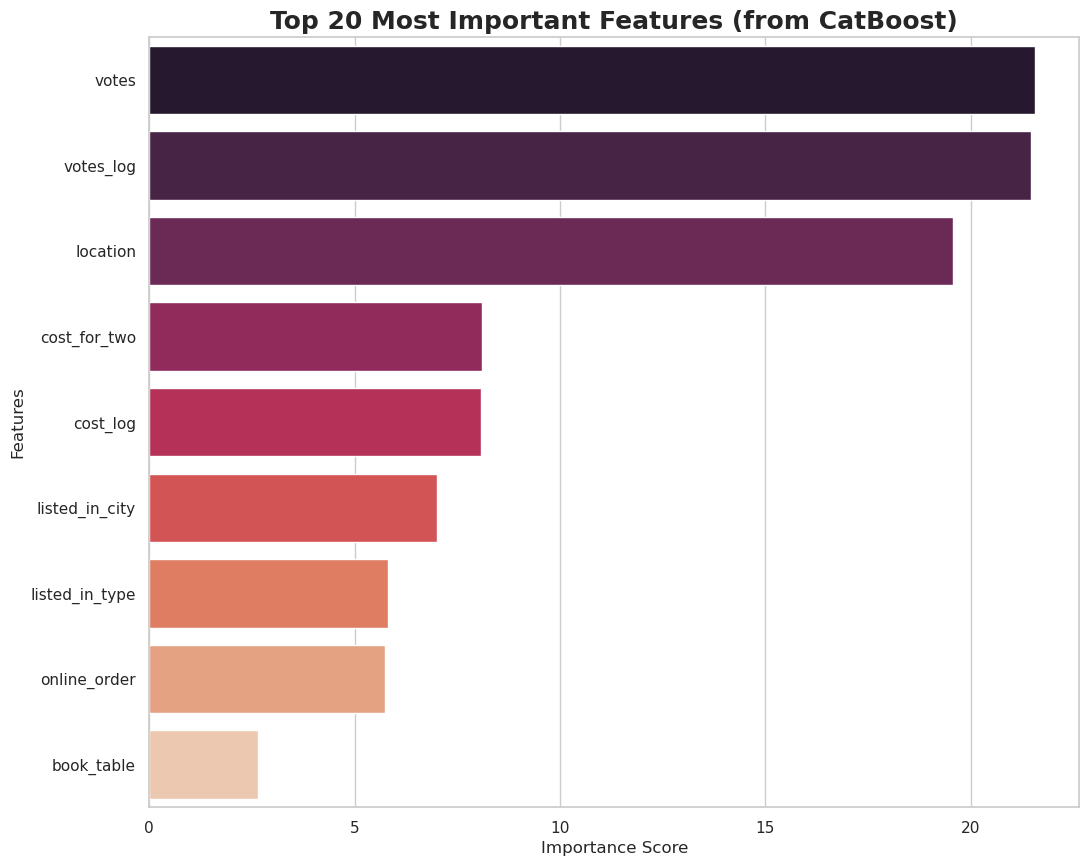

2025-09-10 17:25:05 | SUCCESS  | __main__:get_preliminary_feature_importance:64 - Preliminary feature importance analysis complete.


In [49]:
get_preliminary_feature_importance(df)

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from loguru import logger
from tqdm.auto import tqdm

def get_advanced_feature_importance(df: pd.DataFrame, target_col: str = 'rate', top_n: int = 15):
    """
    Uses a more advanced feature engineering strategy ("Top N" encoding) before
    running CatBoost to get a more insightful feature importance ranking.
    """
    logger.info(f"--- Starting Advanced Feature Importance with 'Top {top_n}' Engineering ---")
    
    # --- 1. Create a Temporary DataFrame for Modeling ---
    df_model = df.copy()
    
    # --- 2. Advanced Feature Engineering for List Columns (Your Idea) ---
    logger.info(f"Step 1: Engineering 'Top {top_n}' binary features from list columns...")
    list_cols = ['rest_type', 'cuisines', 'dish_liked']
    
    for col in tqdm(list_cols, desc="Engineering List Features"):
        # First, find the top N most frequent items from the exploded list
        df_exploded = df_model[[col]].explode(col)
        top_items = df_exploded[col].value_counts().nlargest(top_n).index
        logger.info(f"Top {top_n} items for '{col}': {top_items.tolist()}")
        
        # Now, create a new binary column for each of the top items
        for item in top_items:
            new_col_name = f"{col}_{item.replace(' ', '_')}" # Create a clean column name
            df_model[new_col_name] = df_model[col].apply(lambda x: 1 if isinstance(x, list) and item in x else 0)
    
    logger.success("Advanced feature engineering for list columns complete.")
    
    # --- 3. Prepare Data for CatBoost ---
    logger.info("Step 2: Preparing data for CatBoost...")
    
    # Define features (X) and target (y)
    # We drop the original list columns and other non-feature columns
    cols_to_drop = list_cols + ['rate', 'cost_for_two', 'votes', 'url', 'address', 'name', 'reviews_list', 'menu_item']
    X = df_model.drop(columns=cols_to_drop, errors='ignore')
    y = df_model[target_col]
    
    # Label encode the remaining simple categorical columns
    for col in X.select_dtypes(include='object').columns:
        X[col] = X[col].astype('category').cat.codes
        
    logger.info(f"Final feature set has {X.shape[1]} columns.")
    
    # --- 4. Train CatBoost Regressor ---
    logger.info("Step 3: Training a baseline CatBoost model on the enriched feature set...")
    model_fi = CatBoostRegressor(
        iterations=500,
        learning_rate=0.1,
        depth=6,
        verbose=0,
        random_state=42
    )
    
    model_fi.fit(X, y)
    
    # --- 5. Visualize Feature Importances ---
    logger.info("Step 4: Plotting feature importances...")
    importances = pd.Series(model_fi.get_feature_importance(), index=X.columns).sort_values(ascending=False)
    
    plt.figure(figsize=(12, 12)) # Make the plot taller to fit more features
    sns.barplot(x=importances.head(30), y=importances.head(30).index, palette="rocket_r", legend=False, hue=importances.head(30).index)
    plt.title(f'Top 30 Most Important Features (CatBoost with Top {top_n} Encoding)', fontsize=18, fontweight='bold')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
    
    logger.success("Advanced feature importance analysis complete.")

# --- EXECUTION ---
# Use your final processed DataFrame
# get_advanced_feature_importance(df_processed)

2025-09-10 17:27:07 | INFO     | __main__:get_advanced_feature_importance:13 - --- Starting Advanced Feature Importance with 'Top 15' Engineering ---
2025-09-10 17:27:07 | INFO     | __main__:get_advanced_feature_importance:19 - Step 1: Engineering 'Top 15' binary features from list columns...


Engineering List Features:   0%|          | 0/3 [00:00<?, ?it/s]

2025-09-10 17:27:07 | INFO     | __main__:get_advanced_feature_importance:26 - Top 15 items for 'rest_type': ['Quick Bites', 'Casual Dining', 'Cafe', 'Delivery', 'Dessert Parlor', 'Bar', 'Bakery', 'Takeaway', 'Beverage Shop', 'Pub', 'Food Court', 'Sweet Shop', 'Lounge', 'Fine Dining', 'Microbrewery']
2025-09-10 17:27:07 | INFO     | __main__:get_advanced_feature_importance:26 - Top 15 items for 'cuisines': ['North Indian', 'Chinese', 'South Indian', 'Fast Food', 'Biryani', 'Continental', 'Cafe', 'Desserts', 'Beverages', 'Italian', 'Street Food', 'Bakery', 'Pizza', 'Burger', 'Seafood']
2025-09-10 17:27:07 | INFO     | __main__:get_advanced_feature_importance:26 - Top 15 items for 'dish_liked': ['Unknown', 'Pasta', 'Burgers', 'Cocktails', 'Pizza', 'Biryani', 'Coffee', 'Mocktails', 'Sandwiches', 'Paratha', 'Noodles', 'Salads', 'Fish', 'Nachos', 'Chicken Biryani']
2025-09-10 17:27:07 | SUCCESS  | __main__:get_advanced_feature_importance:33 - Advanced feature engineering for list columns co

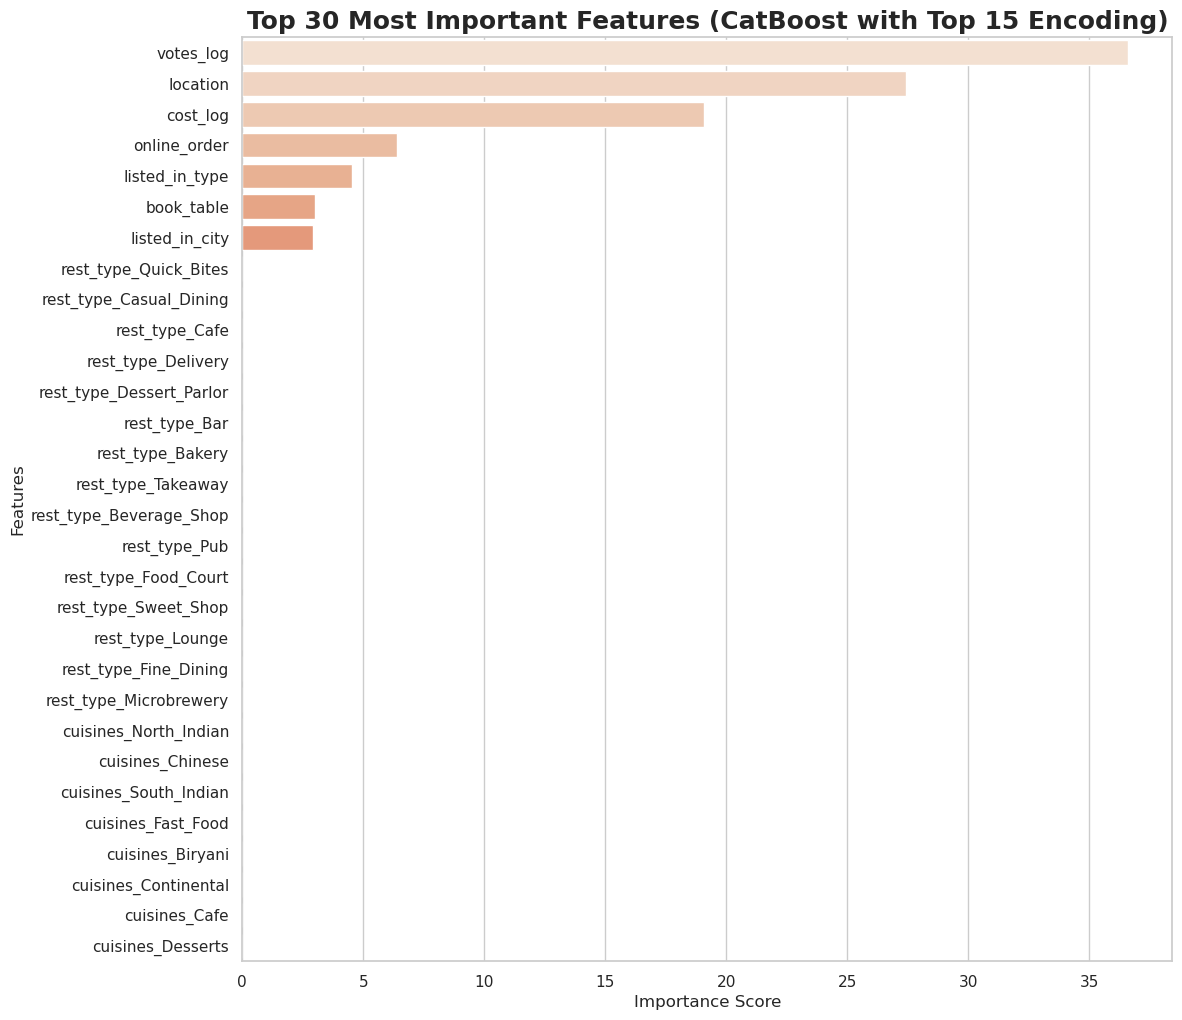

2025-09-10 17:27:08 | SUCCESS  | __main__:get_advanced_feature_importance:73 - Advanced feature importance analysis complete.


In [56]:
get_advanced_feature_importance(df)

## 6. Final Insights & Feature Importance Summary

To conclude our exploratory data analysis, we performed a preliminary feature importance analysis using the powerful `CatBoost` model. This gives us a model-based perspective on which features are the most predictive, validating and enriching the insights from our manual analysis.

We tested two feature engineering strategies: a simple approach using feature counts, and a more advanced "Top 15" one-hot encoding for our multi-value list columns.

### Key Takeaways from Feature Importance Analysis

**(Insert your two feature importance plots here)**

1.  **Feature Engineering is Paramount:** The comparison between the two plots is striking. The model with **"Top 15" encoded features** provided a much more granular and insightful result. Specific features like `rest_type_Quick_Bites` and `rest_type_Casual_Dining` proved to be more important than broad features like `location` or `cost_for_two`. This confirms that our primary feature engineering strategy for the final model should be this "Top N" encoding approach.

2.  **`votes` is the Most Powerful Predictor:** In both analyses, `votes` (especially the log-transformed `votes_log`) was unequivocally the most important feature. The popularity of a restaurant is the single strongest signal for predicting its rating.

3.  **Restaurant Type and Service Level are Critical:** Features like `rest_type` (broken down into specific types), `online_order`, and `book_table` consistently rank as highly important. This reinforces our earlier finding that the *context* and *service level* of a restaurant are dominant drivers of its perceived quality.

4.  **Location and Cost are Important, but Secondary:** While `location`, `listed_in_city`, and `cost_log` are still valuable predictive features, their importance is put into perspective by the more specific categorical features.

### Conclusion of Exploratory Data Analysis

This comprehensive EDA has successfully transformed our raw data into a well-understood and structured asset. We have cleaned the data, handled duplicates and missing values, analyzed feature distributions, and uncovered the key relationships that drive restaurant ratings.

We are now equipped with a clear, data-driven strategy for the next phase: **Building a high-performance prediction model.** We know which features to prioritize, which transformations to apply, and which engineering techniques are most effective. The foundation is laid.

# 6. EDA Summary & Strategic Plan for Feature Engineering

This Exploratory Data Analysis has been a deep and insightful journey into the Zomato dataset. We have moved from raw, messy data to a clean, well-understood foundation. Before we conclude this phase, it is crucial to consolidate our findings into a strategic action plan for the upcoming Feature Engineering and Modeling notebooks.

## 6.1. Summary of Key Findings

1.  **Popularity is Paramount (`votes`):** The single most dominant predictor of a restaurant's rating is its number of votes. The log-transformed version (`votes_log`) is a well-behaved and powerful feature that must be central to our model.

2.  **Experience Defines Quality (`rest_type`, `listed_in_type`, `book_table`):** The *context* of the dining experience is more predictive than many other factors. "Experience-focused" venues (Fine Dining, Microbreweries, Pubs) consistently receive higher ratings than "utility-focused" ones (Quick Bites, Takeaway). The ability to book a table is a strong positive signal.

3.  **Price is a Moderate Predictor (`cost_for_two`):** More expensive restaurants do tend to have higher ratings, but the effect is less pronounced than for `votes` or `rest_type`. The log-transformed `cost_log` is the best version to use.

4.  **"No Signal" is a Strong Signal (`dish_liked`):** The absence of "liked dishes" (our "Unknown" category) is a powerful negative predictor. This confirms that missing data, when handled correctly, can be a valuable feature.

5.  **Location Matters, But in Context:** While specific locations (`location`, `listed_in_city`) are statistically significant predictors, their importance is secondary to the type of restaurant.

## 6.2. Strategic Action Plan for Feature Engineering

Based on our findings, we will now outline a sophisticated feature engineering strategy. The goal is to translate our EDA insights into powerful numerical signals that our models can learn from.

### 6.2.1. Handling Multi-Value Categorical Features

This is our biggest opportunity. We will move beyond simple counts and use advanced encoding.

*   **`rest_type`, `cuisines`, `listed_in_type`, `location` (High-Impact Categories):**
    *   **Action:** We will use **One-Hot Encoding** for the Top 15-20 most frequent categories in each of these columns. This will create specific binary features like `rest_type_Cafe`, `cuisine_North_Indian`, `location_Koramangala`, etc. This was proven to be highly effective in our preliminary importance analysis.

*   **`dish_liked` & `menu_item` (High-Cardinality Text):**
    *   **Action:** One-Hot Encoding is not feasible here due to the thousands of unique dishes. Instead, we will employ **TF-IDF Vectorization** in our NLP notebook. We can then use dimensionality reduction techniques (like SVD or PCA) to distill the TF-IDF matrix into a few powerful "food topic" or "menu theme" features that can be merged back.

### 6.2.2. Creating New Composite & Interaction Features

We can enrich our dataset by combining existing features.

*   **`reviews_list` (The NLP Goldmine):**
    *   **Action 1 (Simple):** Create a `review_count` feature.
    *   **Action 2 (Advanced):** In the NLP notebook, we will run **Sentiment Analysis** on all review texts for each restaurant to create an `avg_review_sentiment` score. This is a potentially massive predictor.

*   **Geolocation Features (Your Clustering Idea):**
    *   **Action:** In the Geo notebook, we will geocode the addresses to get latitude and longitude. Then, we will use a clustering algorithm (like K-Means or DBSCAN) to create a `location_cluster` feature. This will group restaurants into natural "food hubs," which could be more powerful than simple location names.

### 6.2.3. Final Feature Selection & Preprocessing Pipeline

*   **Feature Pruning:**
    *   We will **drop** `url` and `address` from the final modeling dataset (after they have been used to create Geo and NLP features).
    *   We will use the **log-transformed** versions (`votes_log`, `cost_log`) instead of the originals.
*   **The Ultimate Preprocessing Pipeline:**
    *   **Your Brilliant Idea:** We will construct a `ColumnTransformer` pipeline. This single object will encapsulate our entire preprocessing recipe:
        1.  Apply **Yeo-Johnson Power Transformation** to the skewed numerical features.
        2.  Apply **Standard Scaling** to all numerical features.
        3.  Apply **One-Hot Encoding** to our selected categorical features.
    *   This pipeline will ensure there is no data leakage and will make our entire modeling workflow clean, robust, and reproducible.

---

This EDA has been a resounding success. We have a deep, nuanced understanding of our data and a clear, sophisticated plan for the next steps. The foundation is laid for building a truly powerful predictive model.